<font size="5"> <div class="alert alert-block alert-info"> Data Mining Project - Group 27 </div> </font> 
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ0dFut9RjhIwwK1LBIlU3h045PTD_tdwc6SA&s" style="float: right;" width="200">

  <font size="5"> Master in Data Science and Advanced Analytics </font>
 
  
  <font size="4"> **Gonçalo Rilhas, 20250490**</font><br>
  <font size="4"> **Guilherme Santos, 20250510**</font><br>
  <font size="4"> **Luana Pinto, 20250481**</font><br>
  <font size="4"> **Marta Pedro, 20250500**</font>

    
  <font size="3"> Instructors: Fernando Bação, Farina Pontejos, Gaspar Pereira, Ana Caleiro </font> 

  
  <font size="5"> <div class="alert alert-success" role="alert"> Amazing International Airlines Inc. </div></font> 

### **Business Understanding & Data Context** 

This Data Mining project serves as a consultation for Amazing International Airlines Inc. (AIAI), aiming to develop a robust and actionable **Customer Segmentation strategy**. </p>
In today’s highly competitive airline industry, leveraging data-driven insights is essential to improve customer retention, maximize Customer Lifetime Value and enhance overall satisfaction. </p>
The primary business goal of this project is to identify and understand distinct customer segments within AIAI’s loyalty program membership base. A defined segmentation will enable AIAI to make informed, customer-centric decisions, leading to:
- **Service Personalization**: Tailoring services and experiences (premium vs. basic) to match each group’s needs and spending capacity.
- **Rewards Optimization**: Designing loyalty rewards that are relevant and motivating for each segment (e.g., flight miles for frequent travelers, companion discounts for family travelers).
- **Targeted Marketing**: Developing campaigns for both low-activity and high-value members, increasing engagement.

Based on the two datasets provided (`CustomerDB` and `FlightsDB`) which combine demographic, value, and behavioral data, the exploratory phase aims to confirm the existence of meaningful customer segments that differ across three main dimensions:
- **Value-Based Segmentation**: Groups of high, medium, and low Customer Lifetime Value (CLV), aligned with the loyalty tier (Aurora, Nova, Star).
- **Behavioral Segmentation**: Variations in flight activity, travel distance, and loyalty program usage (accumulating vs. redeeming points).
- **Demographic Segmentation**: Lifestyle and socio-economic factors such as income level, education, marital status, and travel style (solo vs. companion travelers).

Deliverable 1 focuses on *Data Understanding and Preparation*: ensuring the data is clean, consistent, and analytically meaningful before modeling.

---

 <font size="4"><span style="color:green">
 **Data integration**
 </span></font>

First, the necessary libraries were imported for the execution of the project, which include predefined functions for test automation, models, or formatting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from math import ceil
from datetime import datetime
from itertools import combinations
# !pip install folium
import folium
from folium import plugins
from folium.plugins import MarkerCluster, Fullscreen, MeasureControl
from branca.colormap import LinearColormap
import warnings
warnings.filterwarnings('ignore')

Out of the 3 .csv files provided, we will only open 2, which correspond to the databases we are going to use. The third file only contains metadata and will not be loaded.

In [2]:
df_customer = pd.read_csv("data/DM_AIAI_CustomerDB.csv", delimiter = ",", index_col = 0)
df_flights = pd.read_csv("data/DM_AIAI_FlightsDB.csv", delimiter = ",")

In [3]:
print("Customers dataframe shape:", df_customer.shape)
print("Flights dataframe shape:", df_flights.shape)

Customers dataframe shape: (16921, 20)
Flights dataframe shape: (608436, 10)


---


 <font size="4"><span style="color:green">
 **Descriptive statistics**
 </span></font>

**Data base related to the Customers**

In [4]:
df_customer.index.name = "ID"
df_customer.head()

Loyalty# First Name    Last Name        Customer Name Country  \
ID                                                                  
0     480934    Cecilia  Householder  Cecilia Householder  Canada   
1     549612      Dayle        Menez          Dayle Menez  Canada   
2     429460     Necole       Hannon        Necole Hannon  Canada   
3     608370      Queen        Hagee          Queen Hagee  Canada   
4     530508     Claire      Latting       Claire Latting  Canada   

   Province or State       City   Latitude   Longitude Postal code  Gender  \
ID                                                                           
0            Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  female   
1            Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6    male   
2   British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9    male   
3            Ontario    Toronto  43.653225  -79.383186     P1W 1K4    male   
4             Quebec       Hull  45.428730  -75.713364     J8Y 3Z5    male   

   Education Location Code   Income Marital Status LoyaltyStatus  \
ID                                                                 
0   Bachelor         Urban  70146.0        Married          Star   
1    College         Rural      0.0       Divorced          Star   
2    College         Urban      0.0         Single          Star   
3    College      Suburban      0.0         Single          Star   
4   Bachelor      Suburban  97832.0        Married          Star   

   EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
ID                                                                   
0              2/15/2019              NaN                  3839.14   
1               3/9/2019              NaN                  3839.61   
2              7/14/2017         1/8/2021                  3839.75   
3              2/17/2016              NaN                  3839.75   
4             10/25/2017              NaN                  3842.79   

    EnrollmentType  
ID                  
0         Standard  
1         Standard  
2         Standard  
3         Standard  
4   2021 Promotion

In [5]:
df_customer.shape

(16921, 20)

In [6]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 0 to 19
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loyalty#                 16921 non-null  int64  
 1   First Name               16921 non-null  object 
 2   Last Name                16921 non-null  object 
 3   Customer Name            16921 non-null  object 
 4   Country                  16921 non-null  object 
 5   Province or State        16921 non-null  object 
 6   City                     16921 non-null  object 
 7   Latitude                 16921 non-null  float64
 8   Longitude                16921 non-null  float64
 9   Postal code              16921 non-null  object 
 10  Gender                   16921 non-null  object 
 11  Education                16921 non-null  object 
 12  Location Code            16921 non-null  object 
 13  Income                   16901 non-null  float64
 14  Marital Status           16921

In [7]:
print(f"Customers dtypes:\n{df_customer.dtypes}")

Customers dtypes:
Loyalty#                     int64
First Name                  object
Last Name                   object
Customer Name               object
Country                     object
Province or State           object
City                        object
Latitude                   float64
Longitude                  float64
Postal code                 object
Gender                      object
Education                   object
Location Code               object
Income                     float64
Marital Status              object
LoyaltyStatus               object
EnrollmentDateOpening       object
CancellationDate            object
Customer Lifetime Value    float64
EnrollmentType              object
dtype: object


In [8]:
df_customer.describe().T

count           mean            std            min  \
Loyalty#                 16921.0  550197.393771  259251.503597  100011.000000   
Latitude                 16921.0      47.174500       3.307971      42.984924   
Longitude                16921.0     -91.814768      22.242429    -135.056840   
Income                   16901.0   37758.038400   30368.992499       0.000000   
Customer Lifetime Value  16901.0    7990.460188    6863.173093    1898.010000   

                                   25%            50%            75%  \
Loyalty#                 326823.000000  550896.000000  772438.000000   
Latitude                     44.231171      46.087818      49.282730   
Longitude                  -120.237660     -79.383186     -74.596184   
Income                        0.000000   34161.000000   62396.000000   
Customer Lifetime Value    3979.720000    5780.180000    8945.690000   

                                   max  
Loyalty#                 999999.000000  
Latitude                     60.721188  
Longitude                   -52.712578  
Income                    99981.000000  
Customer Lifetime Value   83325.380000

In [9]:
df_customer.describe(include='object').T

count unique                  top   freq
First Name             16921   4941                 Deon     13
Last Name              16921  15404              Salberg      4
Customer Name          16921  16921  Cecilia Householder      1
Country                16921      1               Canada  16921
Province or State      16921     11              Ontario   5468
City                   16921     29              Toronto   3390
Postal code            16921     75              V6E 3D9    917
Gender                 16921      2               female   8497
Education              16921      5             Bachelor  10586
Location Code          16921      3             Suburban   5716
Marital Status         16921      3              Married   9842
LoyaltyStatus          16921      3                 Star   7761
EnrollmentDateOpening  16921   2449             4/3/2015     34
CancellationDate        2310   1260             7/7/2020      8
EnrollmentType         16921      2             Standard  15773

In [10]:
# Exploring the unique values of our categorical variables 
object_columns = df_customer.select_dtypes(include='object').columns

for column in object_columns:
    unique_values = df_customer[column].value_counts(dropna=False).index
    print(f"--- {column} ---")
    print(f"Number of unique values: {len(unique_values)}")
    print(f"Unique sample: {list(unique_values[:20])}\n") # show only the first 20 unique values of each column

# They all seem valid 

--- First Name ---
Number of unique values: 4941
Unique sample: ['Deon', 'Stacey', 'Merrill', 'Rudy', 'Loren', 'Cary', 'Leon', 'Jamey', 'Mario', 'Georgiann', 'Dion', 'Jae', 'Ray', 'Kim', 'Adam', 'Adrian', 'Andrew', 'Casey', 'Joel', 'Chong']

--- Last Name ---
Number of unique values: 15404
Unique sample: ['Salberg', 'Ypina', 'Amodei', 'Mesteth', 'Sather', 'Kot', 'Bubb', 'Musquiz', 'Tousignant', 'Tash', 'Umana', 'Sitz', 'Estela', 'Lafleche', 'Sakai', 'Grobes', 'Leicher', 'Cramblet', 'Tlumacki', 'Segelhorst']

--- Customer Name ---
Number of unique values: 16921
Unique sample: ['Cecilia Householder', 'Agnes Beary', 'Larry Floss', 'Rosaline Goud', 'Lola Mamon', 'Juliet Darst', 'Alexandra Rafidi', 'Kathrine Shult', 'Robert Mistretta', 'Armandina Wegleitner', 'Charlesetta Rodenberger', 'Quintin Sibeto', 'Shane Schinke', 'Kevin Stinnette', 'Cathleen Cueto', 'Renna Ayars', 'Hester Ferdon', 'Ivonne Shovlin', 'Cameron Gilton', 'Tameika Sandvill']

--- Country ---
Number of unique values: 1
Uniq

**Data base related to the Flights**

In [11]:
df_flights.head()

Loyalty#  Year  Month YearMonthDate  NumFlights  NumFlightsWithCompanions  \
0    413052  2021     12     12/1/2021         2.0                       2.0   
1    464105  2021     12     12/1/2021         0.0                       0.0   
2    681785  2021     12     12/1/2021        10.0                       3.0   
3    185013  2021     12     12/1/2021        16.0                       4.0   
4    216596  2021     12     12/1/2021         9.0                       0.0   

   DistanceKM  PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
0      9384.0              938.0             0.0                       0.0  
1         0.0                0.0             0.0                       0.0  
2     14745.0             1474.0             0.0                       0.0  
3     26311.0             2631.0          3213.0                      32.0  
4     19275.0             1927.0             0.0                       0.0

In [12]:
df_flights.shape

(608436, 10)

In [13]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


In [14]:
df_flights.describe().T

count           mean            std       min  \
Loyalty#                  608436.0  550037.873084  258935.180575  100018.0   
Year                      608436.0    2020.000000       0.816497    2019.0   
Month                     608436.0       6.500000       3.452055       1.0   
NumFlights                608436.0       3.908107       5.057889       0.0   
NumFlightsWithCompanions  608436.0       0.983944       2.003785       0.0   
DistanceKM                608436.0    7939.341419   10260.421873       0.0   
PointsAccumulated         608436.0     793.777781    1025.918521       0.0   
PointsRedeemed            608436.0     235.251678     983.233374       0.0   
DollarCostPointsRedeemed  608436.0       2.324835       9.725168       0.0   

                                25%         50%          75%       max  
Loyalty#                  326961.00  550834.000  772194.0000  999986.0  
Year                        2019.00    2020.000    2021.0000    2021.0  
Month                          3.75       6.500       9.2500      12.0  
NumFlights                     0.00       0.000       7.2000      21.0  
NumFlightsWithCompanions       0.00       0.000       0.9000      11.0  
DistanceKM                     0.00     856.400   15338.1750   42040.0  
PointsAccumulated              0.00      85.275    1533.7125    4204.0  
PointsRedeemed                 0.00       0.000       0.0000    7496.0  
DollarCostPointsRedeemed       0.00       0.000       0.0000      74.0

In [15]:
df_flights.describe(include='object').T

count unique        top   freq
YearMonthDate  608436     36  12/1/2021  16901

In [16]:
# Exploring the unique values of our categorical variables 
object_columns = df_flights.select_dtypes(include='object').columns

for column in object_columns:
    unique_values = df_flights[column].value_counts(dropna=False).index
    print(f"--- {column} ---")
    print(f"Number of unique values: {len(unique_values)}")
    print(f"Unique sample: {list(unique_values[:10])}\n") # show only the first 10 unique values of each column

# It seems valid

--- YearMonthDate ---
Number of unique values: 36
Unique sample: ['12/1/2021', '6/1/2020', '10/1/2020', '9/1/2020', '8/1/2020', '7/1/2020', '1/1/2019', '2/1/2019', '3/1/2019', '4/1/2019']



In [17]:
print(f"Flights dtypes:\n{df_flights.dtypes}")

Flights dtypes:
Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                  float64
NumFlightsWithCompanions    float64
DistanceKM                  float64
PointsAccumulated           float64
PointsRedeemed              float64
DollarCostPointsRedeemed    float64
dtype: object


---

 <font size="4"><span style="color:green">
 **Data quality & consistency checks**
 </span></font>

**Data base related to the Customers**

In [18]:
# Evaluate NaN values 
df_customer.isna().sum()

Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

In [19]:
# Percentage of NaN in the database
df_customer.isna().sum() / len(df_customer) * 100

Loyalty#                    0.000000
First Name                  0.000000
Last Name                   0.000000
Customer Name               0.000000
Country                     0.000000
Province or State           0.000000
City                        0.000000
Latitude                    0.000000
Longitude                   0.000000
Postal code                 0.000000
Gender                      0.000000
Education                   0.000000
Location Code               0.000000
Income                      0.118196
Marital Status              0.000000
LoyaltyStatus               0.000000
EnrollmentDateOpening       0.000000
CancellationDate           86.348325
Customer Lifetime Value     0.118196
EnrollmentType              0.000000
dtype: float64

In [20]:
# Change data type to 'datetime'
df_customer['EnrollmentDateOpening'] = pd.to_datetime(df_customer['EnrollmentDateOpening'])
df_customer["CancellationDate"] = pd.to_datetime(df_customer["CancellationDate"], errors="coerce")
df_flights['YearMonthDate'] = pd.to_datetime(df_flights['YearMonthDate'], format='%m/%d/%Y')

print(df_customer['CancellationDate'].dtype)
print(df_flights['YearMonthDate'].dtype)
print(df_customer['EnrollmentDateOpening'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [21]:
# Convert NumFlights and NumFlightsWithCompanions to integer type
df_flights["NumFlights"] = df_flights["NumFlights"].astype(int)
df_flights["NumFlightsWithCompanions"] = df_flights["NumFlightsWithCompanions"].astype(int)
print(df_flights['YearMonthDate'].dtype)
print(df_customer['EnrollmentDateOpening'].dtype)

datetime64[ns]
datetime64[ns]


In [22]:
# Check duplicates
df_customer.duplicated().sum()

# The Customer database does not have any duplicated value, making it clean in this matter

0

In [23]:
# Check how many Loyalty# are duplicated
df_customer['Loyalty#'].duplicated().sum()

164

In [24]:
# Checking to see, with a random duplicate # Loyalty#, what happens 
df_customer[df_customer['Loyalty#']==354438]

Loyalty# First Name Last Name   Customer Name Country Province or State  \
ID                                                                             
161    354438   Maricela     Veals  Maricela Veals  Canada            Quebec   
370    354438      Marla  Heinicke  Marla Heinicke  Canada           Ontario   

         City   Latitude  Longitude Postal code Gender Education  \
ID                                                                 
161  Montreal  45.501690 -73.567253     H2T 2J6   male   College   
370   Toronto  43.653225 -79.383186     M8Y 4K8   male  Bachelor   

    Location Code   Income Marital Status LoyaltyStatus EnrollmentDateOpening  \
ID                                                                              
161         Rural      0.0        Married          Star            2021-09-01   
370         Rural  34640.0        Married          Star            2015-07-11   

    CancellationDate  Customer Lifetime Value EnrollmentType  
ID                                                            
161              NaT                  4167.09       Standard  
370              NaT                  4530.53       Standard

The `Loyalty#` variable is defined as a unique customer identifier in the Customer database. However, the presence of duplicate values indicates potential data quality issues or business rule exceptions, maybe because of:

- Data entry errors - two different customers were accidentally assigned the same loyalty ID.
- ID reuse - a loyalty number from an inactive or cancelled account might have been reassigned to a new customer.
- Merging data from multiple sources may have introduced conflicting records.

In [25]:
# Check the percentage (%) of entries with duplicated Loyalty# in df_customer
df_customer['Loyalty#'].value_counts()[df_customer['Loyalty#'].value_counts() > 1].sum() /len(df_customer)*100

1.932509898942143

Removing rows with duplicated values could be a reasonable approach for the second part of the project; however, for the time being, we will retain them as they are.

#### Checking missing values in the `Customer Lifetime Value`, `Income` and `CancellationDate` columns

In [26]:
# Income missing rows 
missing_income = df_customer[df_customer["Income"].isna()]
print("Rows with missing Income:", missing_income.shape[0])

Rows with missing Income: 20


In [27]:
display(missing_income.head(5))

Loyalty# First Name Last Name  Customer Name Country Province or State  \
ID                                                                           
0     999987      Layla    Murphy   Layla Murphy  Canada     New Brunswick   
1     999988       Jana    Parker    Jana Parker  Canada            Quebec   
2     999989      Ethan    Parker   Ethan Parker  Canada           Ontario   
3     999990       Ryan  Anderson  Ryan Anderson  Canada     New Brunswick   
4     999991     Olivia      Cote    Olivia Cote  Canada     New Brunswick   

           City   Latitude  Longitude Postal code  Gender Education  \
ID                                                                    
0   Fredericton  46.029263 -66.565150     R4H 2Y2  female  Bachelor   
1      Montreal  45.573672 -73.523012     N6B 1N3    male   College   
2       Trenton  44.075379 -77.550375     P8F 5C8    male   College   
3       Moncton  46.106617 -64.714267     B6P 6D0  female   College   
4   Fredericton  45.950000 -66.652437     X3W 5N2  female   College   

   Location Code  Income Marital Status LoyaltyStatus EnrollmentDateOpening  \
ID                                                                            
0          Urban     NaN         Single          Star            2017-03-07   
1          Rural     NaN         Single          Star            2017-08-22   
2          Rural     NaN        Married          Star            2015-09-12   
3          Rural     NaN        Married          Star            2019-06-10   
4       Suburban     NaN        Married          Star            2019-07-20   

   CancellationDate  Customer Lifetime Value EnrollmentType  
ID                                                           
0        2017-03-07                      NaN       Standard  
1        2017-08-22                      NaN       Standard  
2        2015-09-12                      NaN       Standard  
3        2019-06-10                      NaN       Standard  
4        2019-07-20                      NaN       Standard

In [28]:
zero_income = df_customer[df_customer["Income"] == 0]
print("Number of customers with Income = 0:", zero_income.shape[0])

Number of customers with Income = 0: 4273


In [29]:
# Percentage of customers with 0 income
percentage_zero_NA_income = df_customer[(df_customer['Income'] == 0) | (df_customer['Income'].isna())].shape[0] / len(df_customer) * 100
print(f"Percentage of customers with 0 income: {percentage_zero_NA_income:.2f}%")

Percentage of customers with 0 income: 25.37%


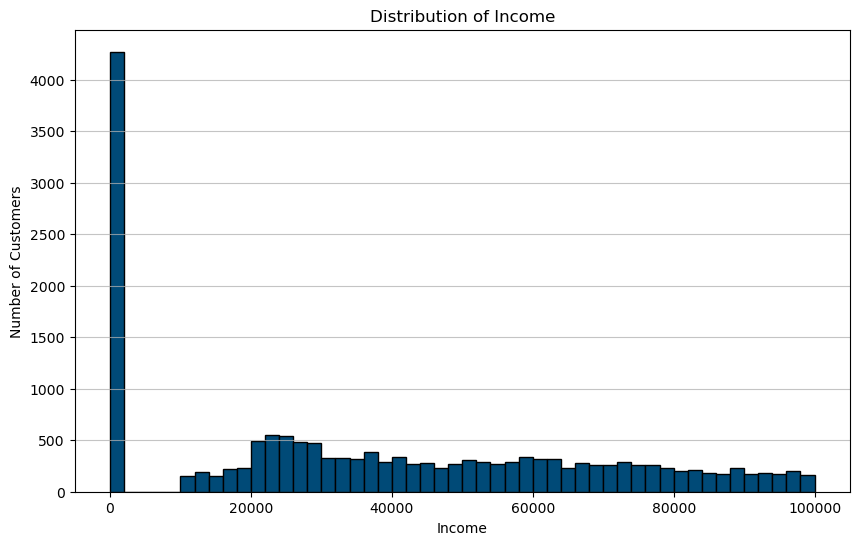

In [30]:
# Plot histogram of Income
plt.figure(figsize=(10, 6))
plt.hist(df_customer['Income'], bins=50, color='#004A77', edgecolor='black')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

This chart shows us how our loyalty members' **income** is spread across the customer base. The key findings point to major differences in the financial makeup of our travelers:

- The most striking feature is the huge spike representing over 4,000 customers who report $0 income. They are likely students, non-reporting members, or individuals who are highly price-sensitive. Marketing premium services to them is useless. Their focus will be on basic travel needs and maximizing points for free flights.
  
- The core customer base is broadly distributed. Beyond the initial low-income spike, the customers are spread out across middle and higher income levels (from roughly 20,000 to $100,000).

The idea is to replace missing or zero `Income` values with realistic estimates based on education level (`Education`), using median incomes of lower and higher education groups to guide the values for intermediate levels. This will be better discussed in the second deliverable. 

In [31]:
### DISCUSS THIS IN THE 2ND DELIVERABLE 

# Fill Income NaN with Income median
# income_median = df_customer['Income'].median()
# df_customer['Income'].fillna(income_median, inplace=True)

In [32]:
# Fill Income 0s with median income from above and bellow education levels
# high_school_median_income = df_customer[df_customer['Education'] == 'High School or Below']['Income'].median()
# bachelor_median_income = df_customer[df_customer['Education'] == 'Bachelor']['Income'].median()
# college_median_income = (high_school_median_income + bachelor_median_income) / 2
# college_median_income

In [33]:
# college_median_income = df_customer.loc[df_customer['Income'] == 0, 'Income'] = college_median_income

In [34]:
# Customer Lifetime Value missing rows
missing_clv = df_customer[df_customer["Customer Lifetime Value"].isna()]
print("Rows with missing Customer Lifetime Value:", missing_clv.shape[0])

Rows with missing Customer Lifetime Value: 20


In [35]:
display(missing_clv.head(5))

Loyalty# First Name Last Name  Customer Name Country Province or State  \
ID                                                                           
0     999987      Layla    Murphy   Layla Murphy  Canada     New Brunswick   
1     999988       Jana    Parker    Jana Parker  Canada            Quebec   
2     999989      Ethan    Parker   Ethan Parker  Canada           Ontario   
3     999990       Ryan  Anderson  Ryan Anderson  Canada     New Brunswick   
4     999991     Olivia      Cote    Olivia Cote  Canada     New Brunswick   

           City   Latitude  Longitude Postal code  Gender Education  \
ID                                                                    
0   Fredericton  46.029263 -66.565150     R4H 2Y2  female  Bachelor   
1      Montreal  45.573672 -73.523012     N6B 1N3    male   College   
2       Trenton  44.075379 -77.550375     P8F 5C8    male   College   
3       Moncton  46.106617 -64.714267     B6P 6D0  female   College   
4   Fredericton  45.950000 -66.652437     X3W 5N2  female   College   

   Location Code  Income Marital Status LoyaltyStatus EnrollmentDateOpening  \
ID                                                                            
0          Urban     NaN         Single          Star            2017-03-07   
1          Rural     NaN         Single          Star            2017-08-22   
2          Rural     NaN        Married          Star            2015-09-12   
3          Rural     NaN        Married          Star            2019-06-10   
4       Suburban     NaN        Married          Star            2019-07-20   

   CancellationDate  Customer Lifetime Value EnrollmentType  
ID                                                           
0        2017-03-07                      NaN       Standard  
1        2017-08-22                      NaN       Standard  
2        2015-09-12                      NaN       Standard  
3        2019-06-10                      NaN       Standard  
4        2019-07-20                      NaN       Standard

In [36]:
### DISCUSS THIS IN THE 2ND DELIVERABLE 

# Fill Customer Life Value NAs with the median
# Na_CLV = df_customer['Customer Lifetime Value'].isna()
# median_CLV = df_customer.loc[~Na_CLV, 'Customer Lifetime Value'].median()
# df_customer.loc[Na_CLV, 'Customer Lifetime Value'] = median_CLV

In [37]:
# Check first rows where CancellationDate is NaN
no_cancellation = df_customer[df_customer["CancellationDate"].isna()].head()
no_cancellation

Loyalty# First Name    Last Name        Customer Name Country  \
ID                                                                  
0     480934    Cecilia  Householder  Cecilia Householder  Canada   
1     549612      Dayle        Menez          Dayle Menez  Canada   
3     608370      Queen        Hagee          Queen Hagee  Canada   
4     530508     Claire      Latting       Claire Latting  Canada   
5     193662   Leatrice       Hanlin      Leatrice Hanlin  Canada   

   Province or State        City   Latitude   Longitude Postal code  Gender  \
ID                                                                            
0            Ontario     Toronto  43.653225  -79.383186     M2Z 4K1  female   
1            Alberta    Edmonton  53.544388 -113.490930     T3G 6Y6    male   
3            Ontario     Toronto  43.653225  -79.383186     P1W 1K4    male   
4             Quebec        Hull  45.428730  -75.713364     J8Y 3Z5    male   
5              Yukon  Whitehorse  60.721188 -135.056840     Y2K 6R0    male   

   Education Location Code   Income Marital Status LoyaltyStatus  \
ID                                                                 
0   Bachelor         Urban  70146.0        Married          Star   
1    College         Rural      0.0       Divorced          Star   
3    College      Suburban      0.0         Single          Star   
4   Bachelor      Suburban  97832.0        Married          Star   
5   Bachelor         Rural  26262.0        Married          Star   

   EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
ID                                                                   
0             2019-02-15              NaT                  3839.14   
1             2019-03-09              NaT                  3839.61   
3             2016-02-17              NaT                  3839.75   
4             2017-10-25              NaT                  3842.79   
5             2015-05-07              NaT                  3844.57   

    EnrollmentType  
ID                  
0         Standard  
1         Standard  
3         Standard  
4   2021 Promotion  
5         Standard

The `CancellationDate` column contains missing values for customers who have not cancelled their membership in the loyalty program. Therefore, NaN values indicate active customers who remain enrolled.

In [38]:
# NaN - The flights dataset is clean
df_flights.isna().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

In [39]:
# Check duplicates
df_flights.duplicated().sum()

2903

In [40]:
df_flights[df_flights.duplicated(keep=False)].head()

Loyalty#  Year  Month YearMonthDate  NumFlights  \
450    727091  2021     12    2021-12-01           0   
535    369638  2021     12    2021-12-01           0   
762    750578  2020      6    2020-06-01           0   
941    547522  2020      6    2020-06-01           0   
952    819842  2020      6    2020-06-01           0   

     NumFlightsWithCompanions  DistanceKM  PointsAccumulated  PointsRedeemed  \
450                         0         0.0                0.0             0.0   
535                         0         0.0                0.0             0.0   
762                         0         0.0                0.0             0.0   
941                         0         0.0                0.0             0.0   
952                         0         0.0                0.0             0.0   

     DollarCostPointsRedeemed  
450                       0.0  
535                       0.0  
762                       0.0  
941                       0.0  
952                       0.0

In [41]:
# Identify duplicated Loyalty# in the customers dataset
loyalty_duplicates = df_customer[df_customer['Loyalty#'].duplicated(keep=False)]['Loyalty#'].unique()
print(f"Number of duplicated Loyalty# in customers: {len(loyalty_duplicates)}")

# Check how many flights correspond to these duplicated Loyalty#
flights_inconsistent = df_flights[df_flights['Loyalty#'].isin(loyalty_duplicates)]
num_inconsistent_flights = flights_inconsistent.shape[0]  # <-- define the variable
print(f"Number of flight entries with duplicated Loyalty#: {num_inconsistent_flights}")

Number of duplicated Loyalty# in customers: 163
Number of flight entries with duplicated Loyalty#: 11772


In [42]:
# Calculate percentage of affected flights
total_flights = df_flights.shape[0]
affected_percentage = (num_inconsistent_flights / total_flights) * 100
print(affected_percentage)

1.9347967575883085


The percentage of affected customers is 1.93%, which is relatively low compared to the total number of customers, so the impact on the analysis should be minimal. Removing rows with duplicated values is a reasonable approach (In the future, instead of deleting them we could try to use the kNN algorithm to fill in the missing values.) .

In [43]:
# Remove duplicated customers and all their associated flights
df_customer = df_customer[~df_customer['Loyalty#'].isin(loyalty_duplicates)]
df_flights = df_flights[~df_flights['Loyalty#'].isin(loyalty_duplicates)]

print("Duplicates remaining in customers:", df_customer['Loyalty#'].duplicated().sum())

Duplicates remaining in customers: 0


In [44]:
print("Cleaned customers shape:", df_customer.shape)
print("Cleaned flights shape:", df_flights.shape)

Cleaned customers shape: (16594, 20)
Cleaned flights shape: (596664, 10)


#### Checking if `NumFlights` and `NumFlightsWithCompanions` are consistent

We want to verify a consistency rule in our flight data: If a customer has flight companions (`FlightCompanions > 0`), there should be at least one flight (`NumFlightsWithCompanions >= 1`). Violations of this rule indicate inconsistent data entries that may need to be corrected or imputed in the next steps of the project.

In [45]:
companions_no_flights = df_flights[(df_flights['NumFlightsWithCompanions'] > 0) & (df_flights['NumFlights'] == 0)]

# Display number of violations
print(f"Number of entries with companions but 0 flights: {companions_no_flights.shape[0]}")
companions_no_flights.head()

Number of entries with companions but 0 flights: 0


Empty DataFrame
Columns: [Loyalty#, Year, Month, YearMonthDate, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []

#### **Outliers in `Customer Lifetime Value` and `Income` columns**

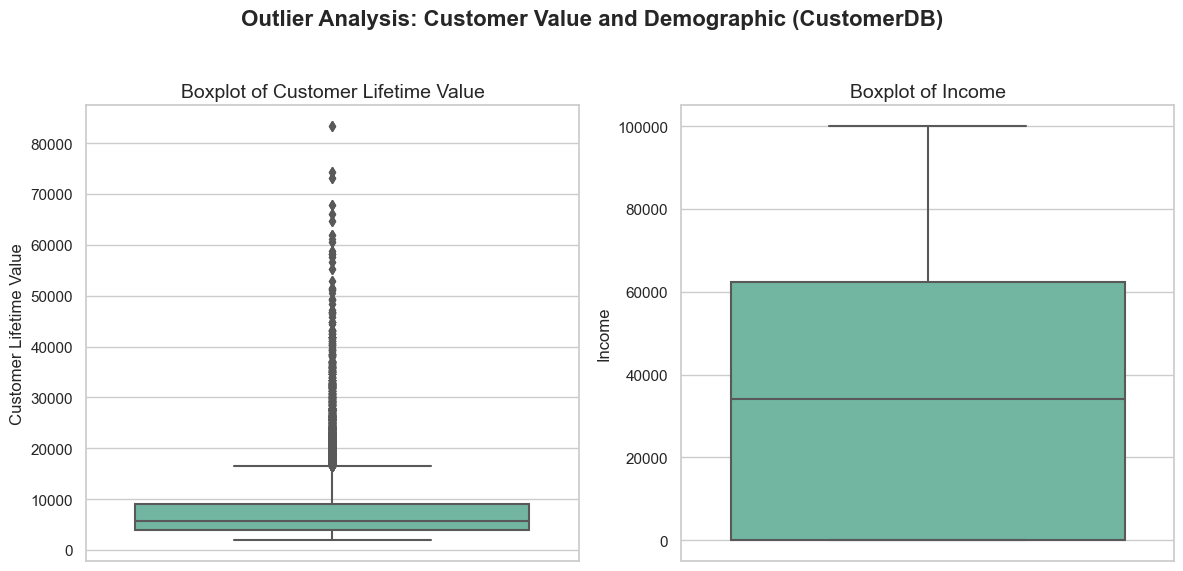

In [46]:
sns.set(style="whitegrid", font_scale=1.0)

# OUTLIERS IN THE CUSTOMER DATAFRAME (df_customer)
customer_outlier_cols = ['Customer Lifetime Value', 'Income']
n_cols = len(customer_outlier_cols)

plt.figure(figsize=(n_cols * 6, 6))
plt.suptitle("Outlier Analysis: Customer Value and Demographic (CustomerDB)", fontsize=16, weight='bold')

for i, col in enumerate(customer_outlier_cols):
    plt.subplot(1, n_cols, i + 1)
    sns.boxplot(y=df_customer[col], palette="Set2")
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.ylabel(col)
    plt.xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('outliers_customer_db.png')
plt.show() 

1. **Customer Lifetime Value (CLV)**
   
    - The boxplot for CLV exhibits severe positive skewness, with the majority of customers concentrated at the lower end of the value spectrum (this may be worked on the second part of the project).
    - This skewness confirms that AIAI has a small percentage of clients that generate the majority of lifetime revenue.
    - The segmentation strategy should be highly effective at isolating and defining this top-tier group. Their retention and service customization protocols (for example, exclusive rewards) should be superior to those offered to the mass market to maximize the return on investment.
      
</p></p>

2. **Income**:

   - While the majority of customers fall within a defined middle range, outliers at the high end, combined with the anomaly of the large number of non-reporting (or zero-income) customers identified in earlier analysis, highlight the extreme demographic diversity of the customer base.
   - Income should be used to tailor the type of offering (for example, premium, aspirational, or budget-focused communication).

#### **Outliers in `NumFlights`, `DistanceKM`, `PointsAccumulated`, `PointsRedeemed` and `DollarCostPointsRedeemed` columns**

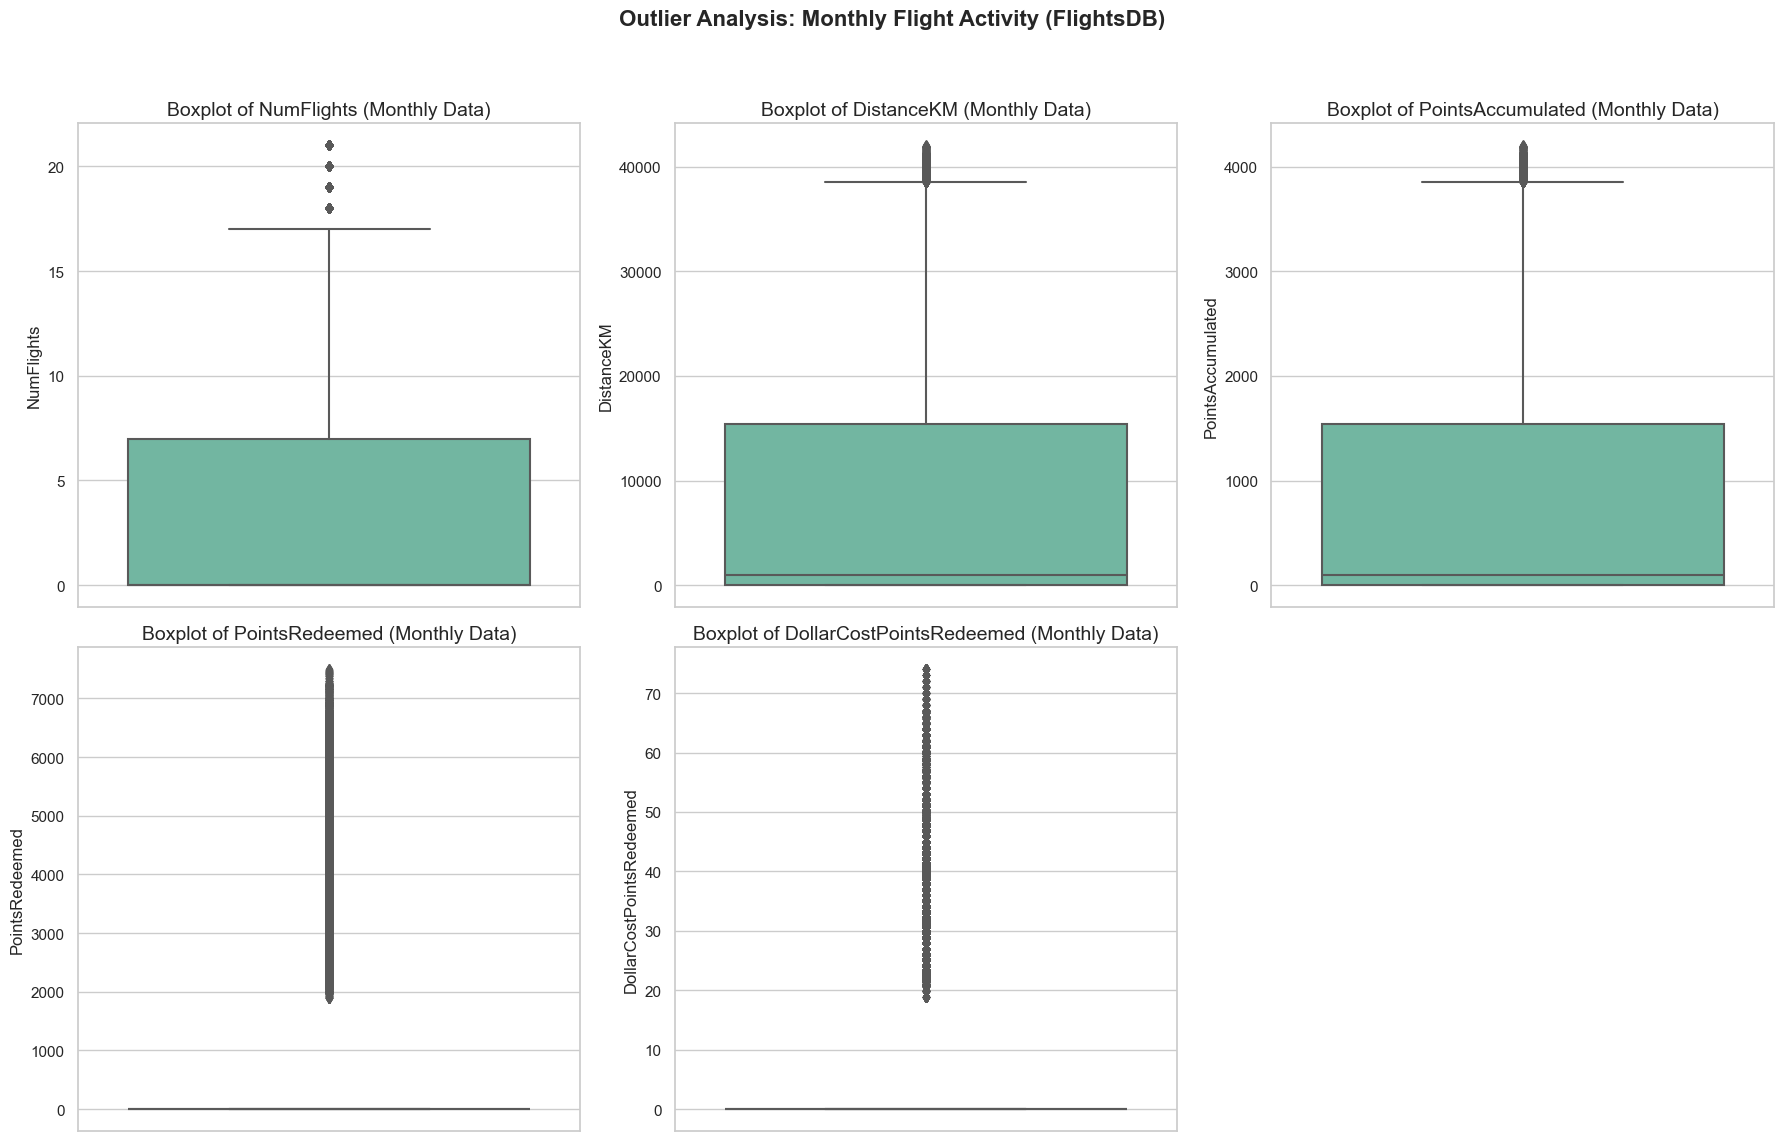

In [47]:
# OUTLIERS IN THE FLIGHT ACTIVITY DATAFRAME (Monthly Data)
flights_outlier_cols = [
    'NumFlights', 
    'DistanceKM', 
    'PointsAccumulated', 
    'PointsRedeemed',
    'DollarCostPointsRedeemed'
]
n_cols = 3  

plt.figure(figsize=(18, 12))
plt.suptitle("Outlier Analysis: Monthly Flight Activity (FlightsDB)", fontsize=16, weight='bold')

for i, col in enumerate(flights_outlier_cols):
    plt.subplot(2, n_cols, i + 1)
    #We are using monthly data, which will result in many outliers
    # for months with high activity for some customers.
    sns.boxplot(y=df_flights[col], palette="Set2") 
    plt.title(f'Boxplot of {col} (Monthly Data)', fontsize=14)
    plt.ylabel(col)
    plt.xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('outliers_flights_db.png')
plt.show()

1. **Boxplots for monthly flight activity metrics (`NumFlights`, `DistanceKM` and `PointsAccumulated`)**

- All activity metrics are *highly skewed*, with most data clustered at low values and a long tail of extreme outliers.
- The bulk of monthly activity is low, but a small fraction of customers consistently drives disproportionately high activity, appearing as outliers. These extreme points represent super **frequent flyers** or **business travelers** who fly high volumes and long distances in single months. We can isolate these "Power Users" to ensure their high-demand needs (for example, dedicated service, priority boarding) are met, which is essential for revenue stability.

2. **Boxplots related to loyalty program use (`PointsRedeemed` and `DollarCostPointsRedeemed`)**

- The distributions are highly concentrated near zero, indicating that the vast majority of monthly records show no point redemption. However, the outliers represent the few months/customers who engage in high-volume point redemption.
- The customer base is divided into a large, passive majority and a small, highly active group of people who actively redeem its points.
- The marketing strategies that could be done are: one focused on incentivizing and educating the passive members to activate their points and another one focused on rewarding and retaining the highly engaged redeemers to maintain their loyalty.

---

 <font size="4"><span style="color:green">
 **Data Visualization**
 </span></font>

We will perform both univariate and multivariate analyses to explore the characteristics of the Customer and Flights datasets.

**Numerical univariate visualizations**

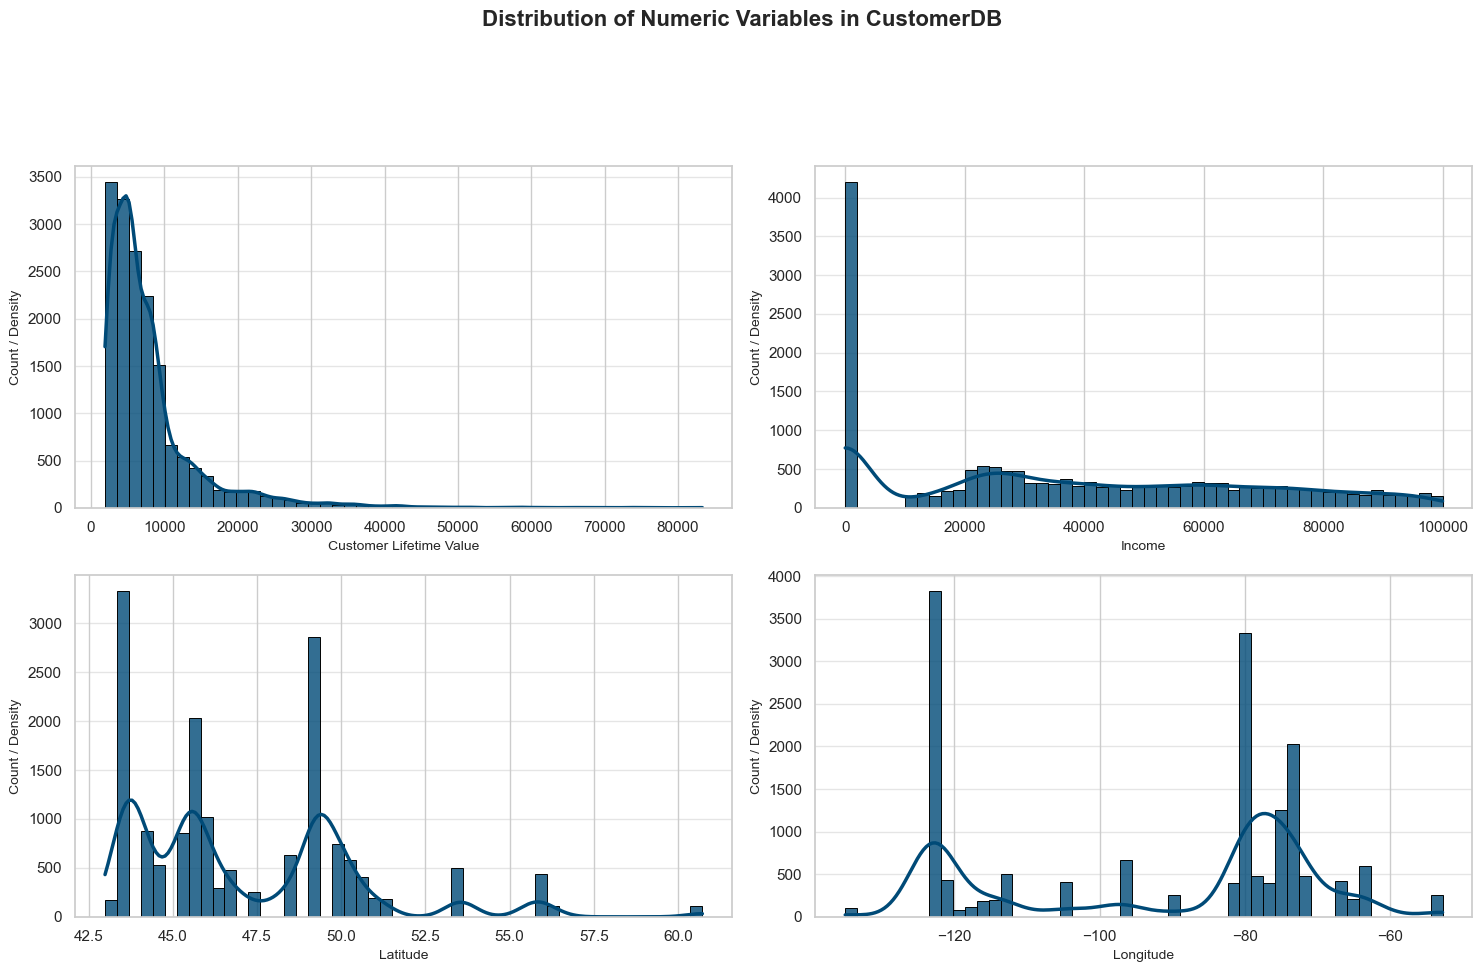

In [48]:
# Plotting All Numeric Variables in the Customers' database 
numeric_features = [
    'Customer Lifetime Value', 
    'Income',
    'Latitude', 
    'Longitude'
]

n_features = len(numeric_features)
sp_cols = 2  
sp_rows = math.ceil(n_features / sp_cols)

sns.set_theme(style="whitegrid") 

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(15, 5 * sp_rows))

axes_flat = axes.flatten()

# Plot Histograms and Distribution' Lines (KDE)
for i, feat in enumerate(numeric_features):
    ax = axes_flat[i]
    
    sns.histplot(
        df_customer[feat].dropna(), # Drop any NA to a better visualization
        bins=50, 
        color='#004A77', 
        edgecolor='black', 
        alpha=0.8,
        ax=ax,
        kde=True, 
        line_kws={'color': 'white', 'linewidth': 2.5} 
    )
    
    ax.set_xlabel(feat, fontsize=10)
    ax.set_ylabel('Count / Density', fontsize=10)
    ax.grid(axis='y', alpha=0.5)

# Hide unused subplots
for j in range(n_features, sp_rows * sp_cols):
    fig.delaxes(axes_flat[j])
    
# Layout
title = "Distribution of Numeric Variables in CustomerDB"
plt.suptitle(title, fontsize=16, weight='bold', y=1.0)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
# plt.savefig('customer_numeric_variables_histograms_with_kde.png', dpi=200)
plt.show()

The histograms, overlaid with the Kernel Density Estimate (KDE) line, provide a precise visual assessment of the numeric features, confirming extreme positive skewness and critical anomalies, especially in the `Income` and `CustomerLifetimeValue` variables. These 2 variables need to be treated in the second half of this project. 

2. The **coordinates** confirm the geographic focus and structure of the customer base in Canada:
- `Latitude`: The distribution is highly concentrated around a specific range (peaking near 43-45 degrees N). This confirms the customer base is primarily located in the densely populated southern regions of Canada (for example, Southern Ontario and Quebec).
</p></p>
- `Longitude`: The distribution is multi-modal. The multiple peaks correspond to the major population centres across the country (e.g., Western Canada, Central Canada). 

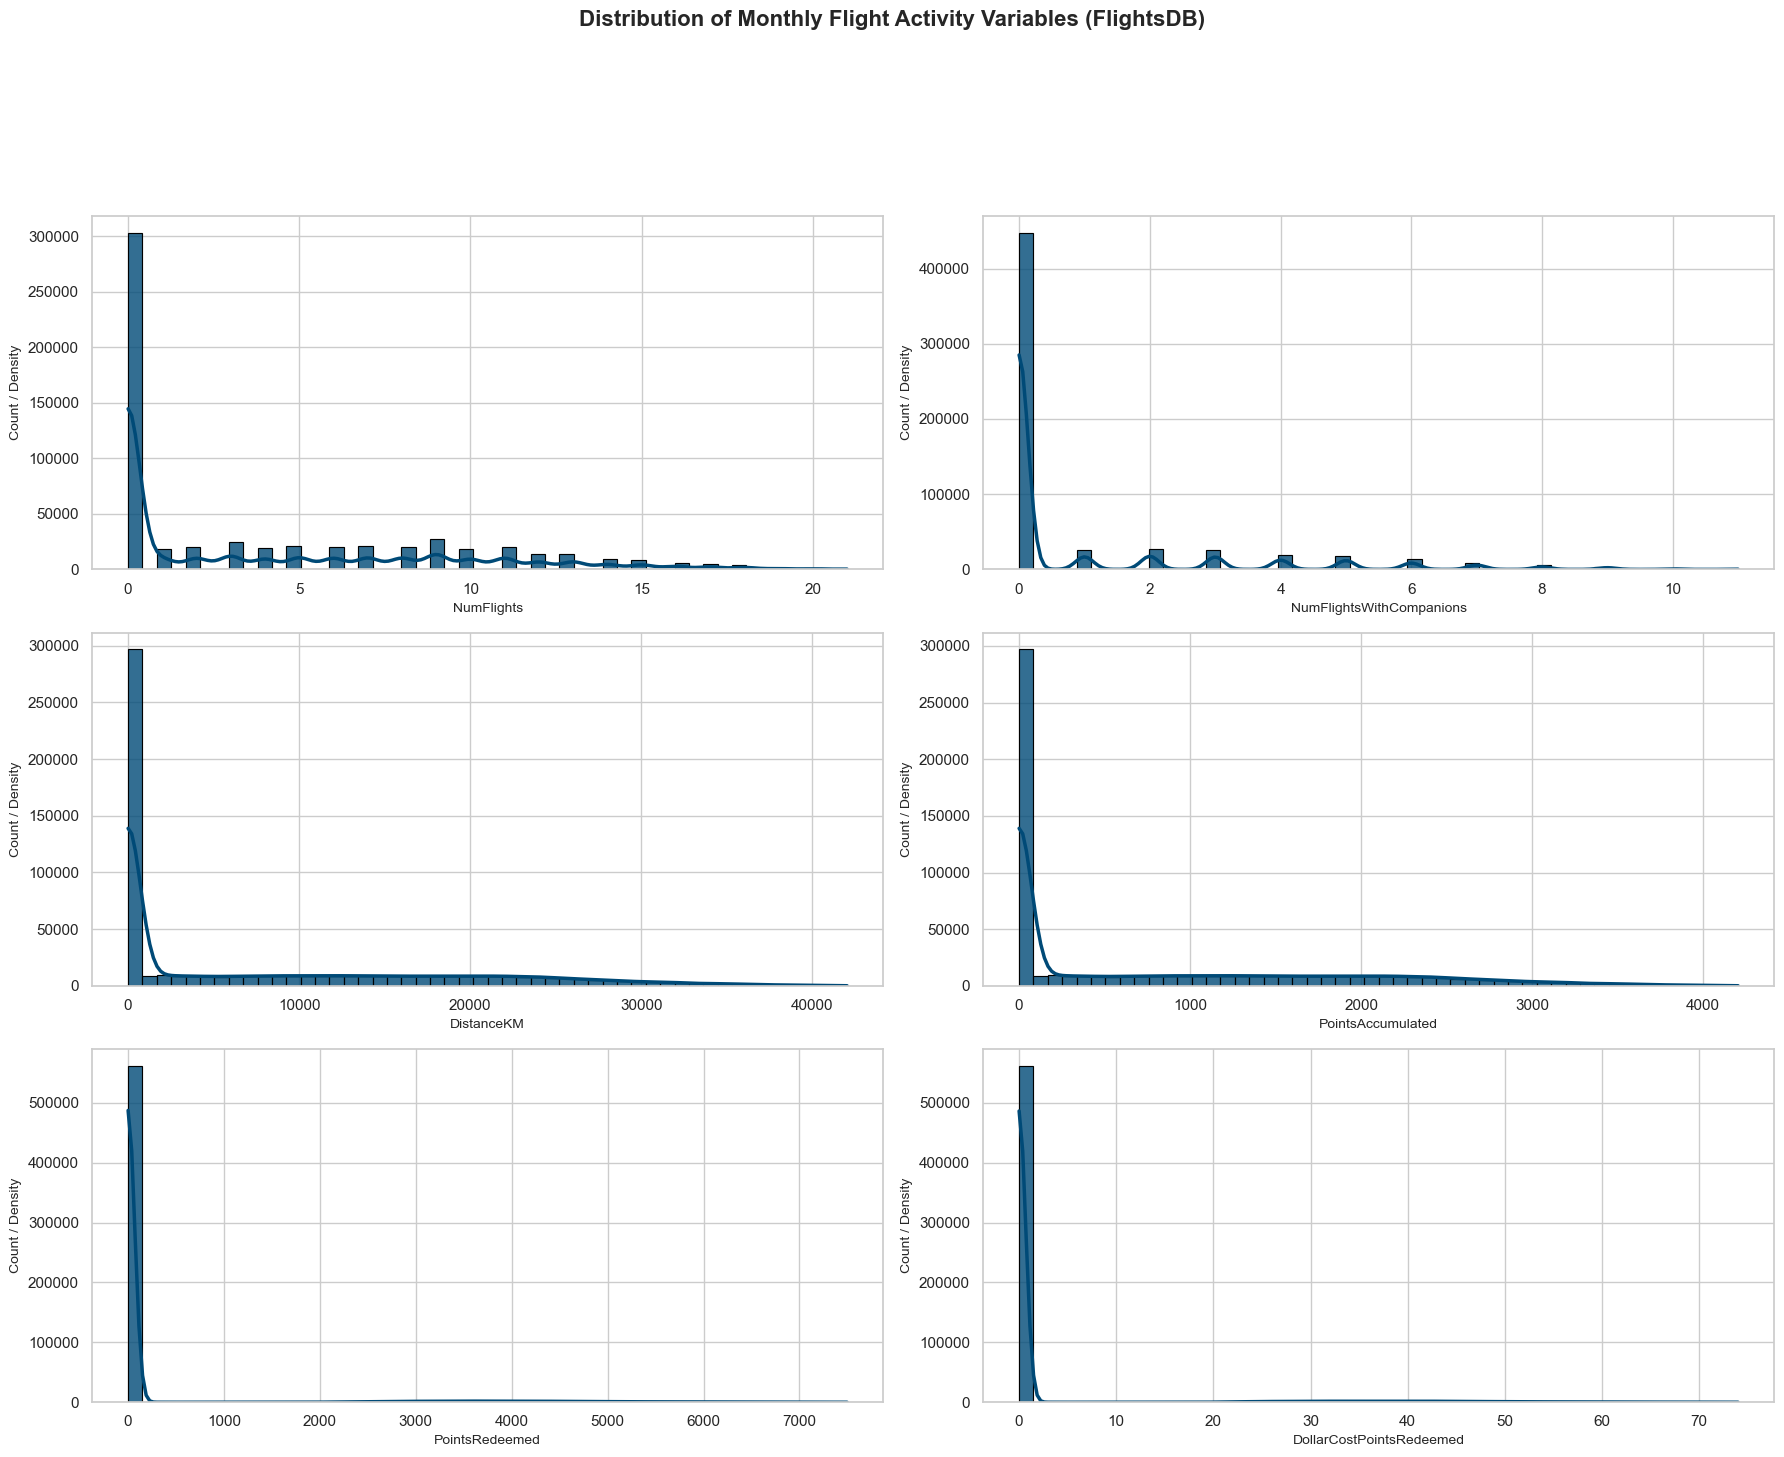

In [49]:
# Plotting All Numeric Variables in the Flights' database 
numeric_flights_features = [
    'NumFlights', 
    'NumFlightsWithCompanions',
    'DistanceKM', 
    'PointsAccumulated', 
    'PointsRedeemed', 
    'DollarCostPointsRedeemed'
]

n_features = len(numeric_flights_features)
sp_cols = 2 
sp_rows = math.ceil(n_features / sp_cols)

sns.set_theme(style="whitegrid") 

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(18, 5 * sp_rows))

axes_flat = axes.flatten()

# Plot Histograms with KDE
for i, feat in enumerate(numeric_flights_features):
    ax = axes_flat[i]
    
    sns.histplot(
        df_flights[feat].dropna(), 
        bins=50, 
        color='#004A77', 
        edgecolor='black', 
        alpha=0.8,
        ax=ax,
        kde=True,
        line_kws={'color': 'white', 'linewidth': 2.5} 
    )
    
    ax.set_xlabel(feat, fontsize=10)
    ax.set_ylabel('Count / Density', fontsize=10)

# Hide unused subplots
for j in range(n_features, sp_rows * sp_cols):
    fig.delaxes(axes_flat[j])
    
# Layout
title = "Distribution of Monthly Flight Activity Variables (FlightsDB)"
plt.suptitle(title, fontsize=16, weight='bold', y=1.0)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
# plt.savefig('flights_numeric_variables_histograms_with_kde.png', dpi=200)

The histograms for the monthly activity variables confirm the highly volatile and skewed nature of customer behavior, which necessitates a strict data preparation strategy. 

1. **`NumFlights`, `DistanceKM` and `PointsAccumulated`:**
- The majority of metrics are concentrated at zero or very low values, with numerous outliers. The density is overwhelmingly concentrated in the first bin (zero or near-zero activity), while a long tail of outliers extends far to the right. These outliers represent individual customers' exceptionally high-activity months (for example, peak business travel and high-mileage rewards flights).


2. **`PointsRedeemed` and `DollarCostPointsRedeemed`** 
- The concentration at zero is dominant for both redemption metrics, far exceeding the subsequent frequency counts. This confirms that in any given month, the vast majority of customers do not redeem points.

**Numerical Bivariate Analysis**

**Customers' database**

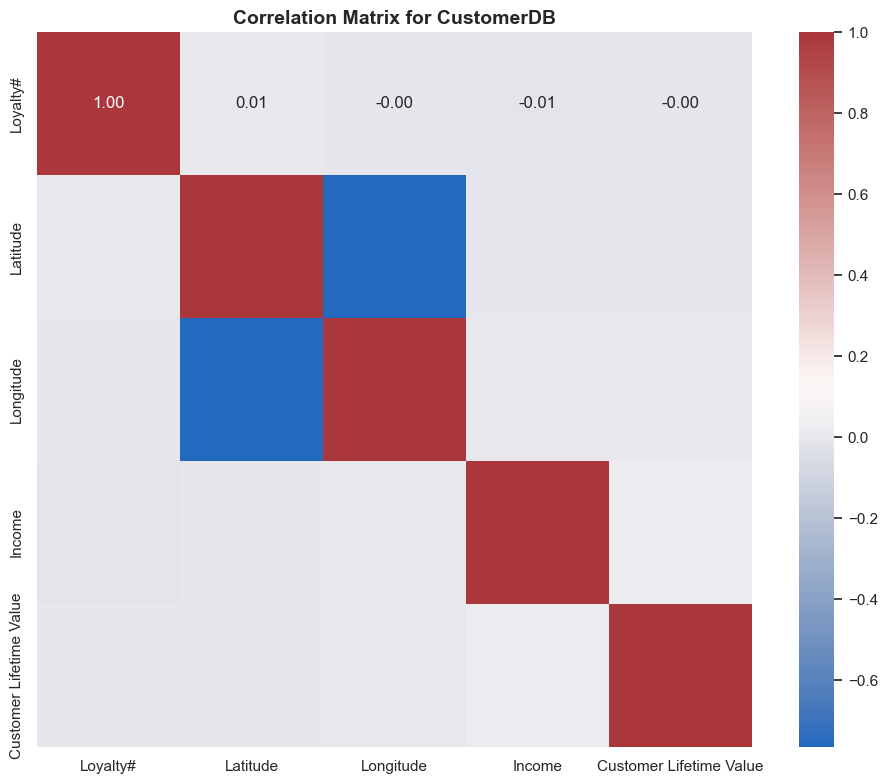

In [50]:
# Correlation Matrix
# Ensure numerical columns only for correlation
numerical_customer = df_customer.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_customer.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True,        
    fmt=".2f",         
    cmap="vlag", 
    cbar=True,         
    square=True
)

plt.title("Correlation Matrix for CustomerDB", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

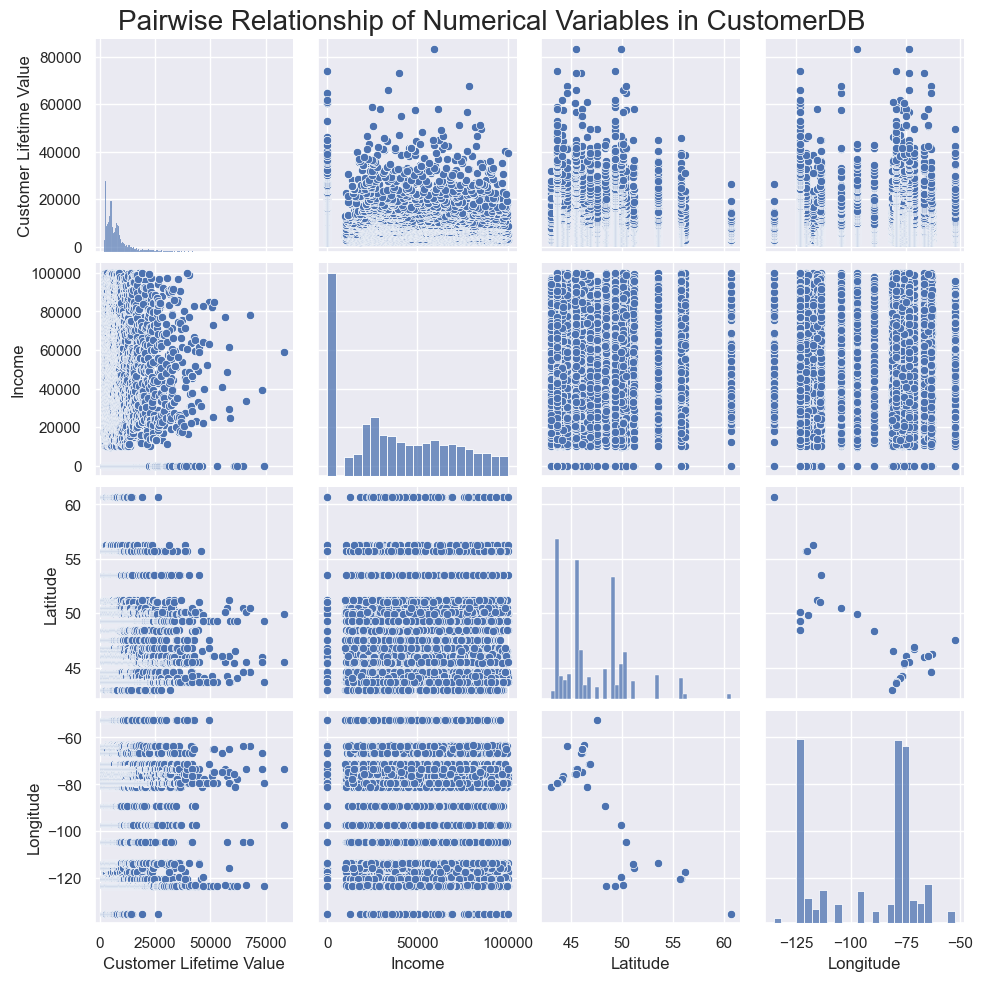

In [51]:
sns.set()

sns.pairplot(df_customer[numeric_features], diag_kind="hist")

plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables in CustomerDB", fontsize=20)
# plt.savefig('pairwise_visualization_customers.png', dpi=200)
plt.show()

- The scatter plot between `CustomerLifetimeValue` and `Income` shows no clear linear trend or strong concentration of data (low correlation). This confirms that wealth does not guarantee high value in the AIAI loyalty program. A customer with a very high income is not necessarily a high-CLV customer, and vice-versa.

- The plots involving geographic coordinates (`Latitude` and `Longitude`) provide visual confirmation of the customer base concentration: the customer base is heavily concentrated in the major urban and commercial corridors of Canada. 

**Flights' database**

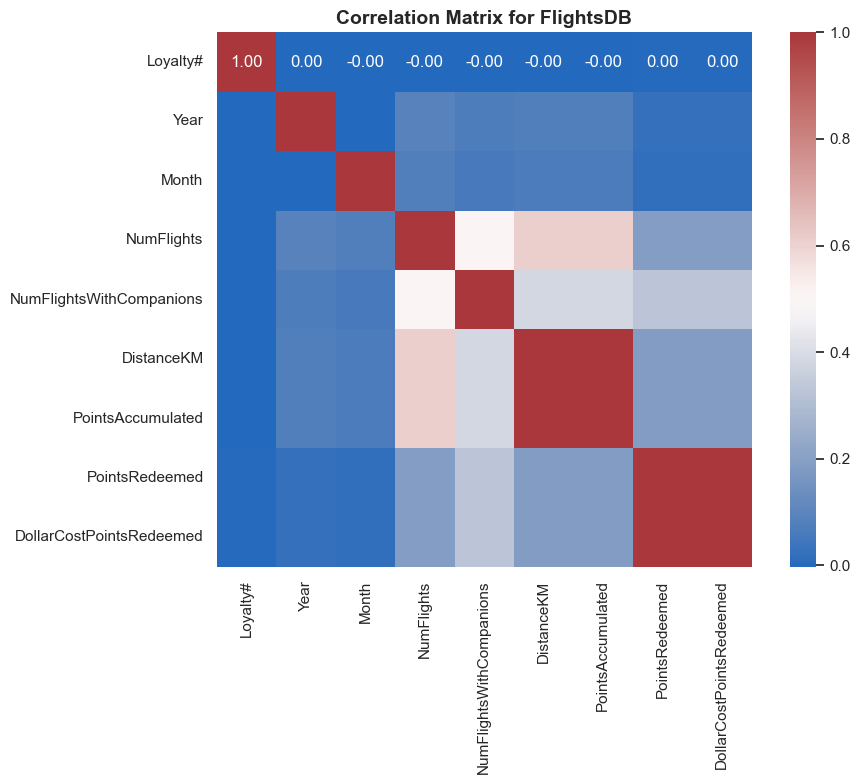

In [52]:
# Correlation Matrix
# Ensure numerical columns only for correlation
numerical_flights = df_flights.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_flights.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True,        
    fmt=".2f",         
    cmap="vlag", 
    cbar=True,         
    square=True
)

plt.title("Correlation Matrix for FlightsDB", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

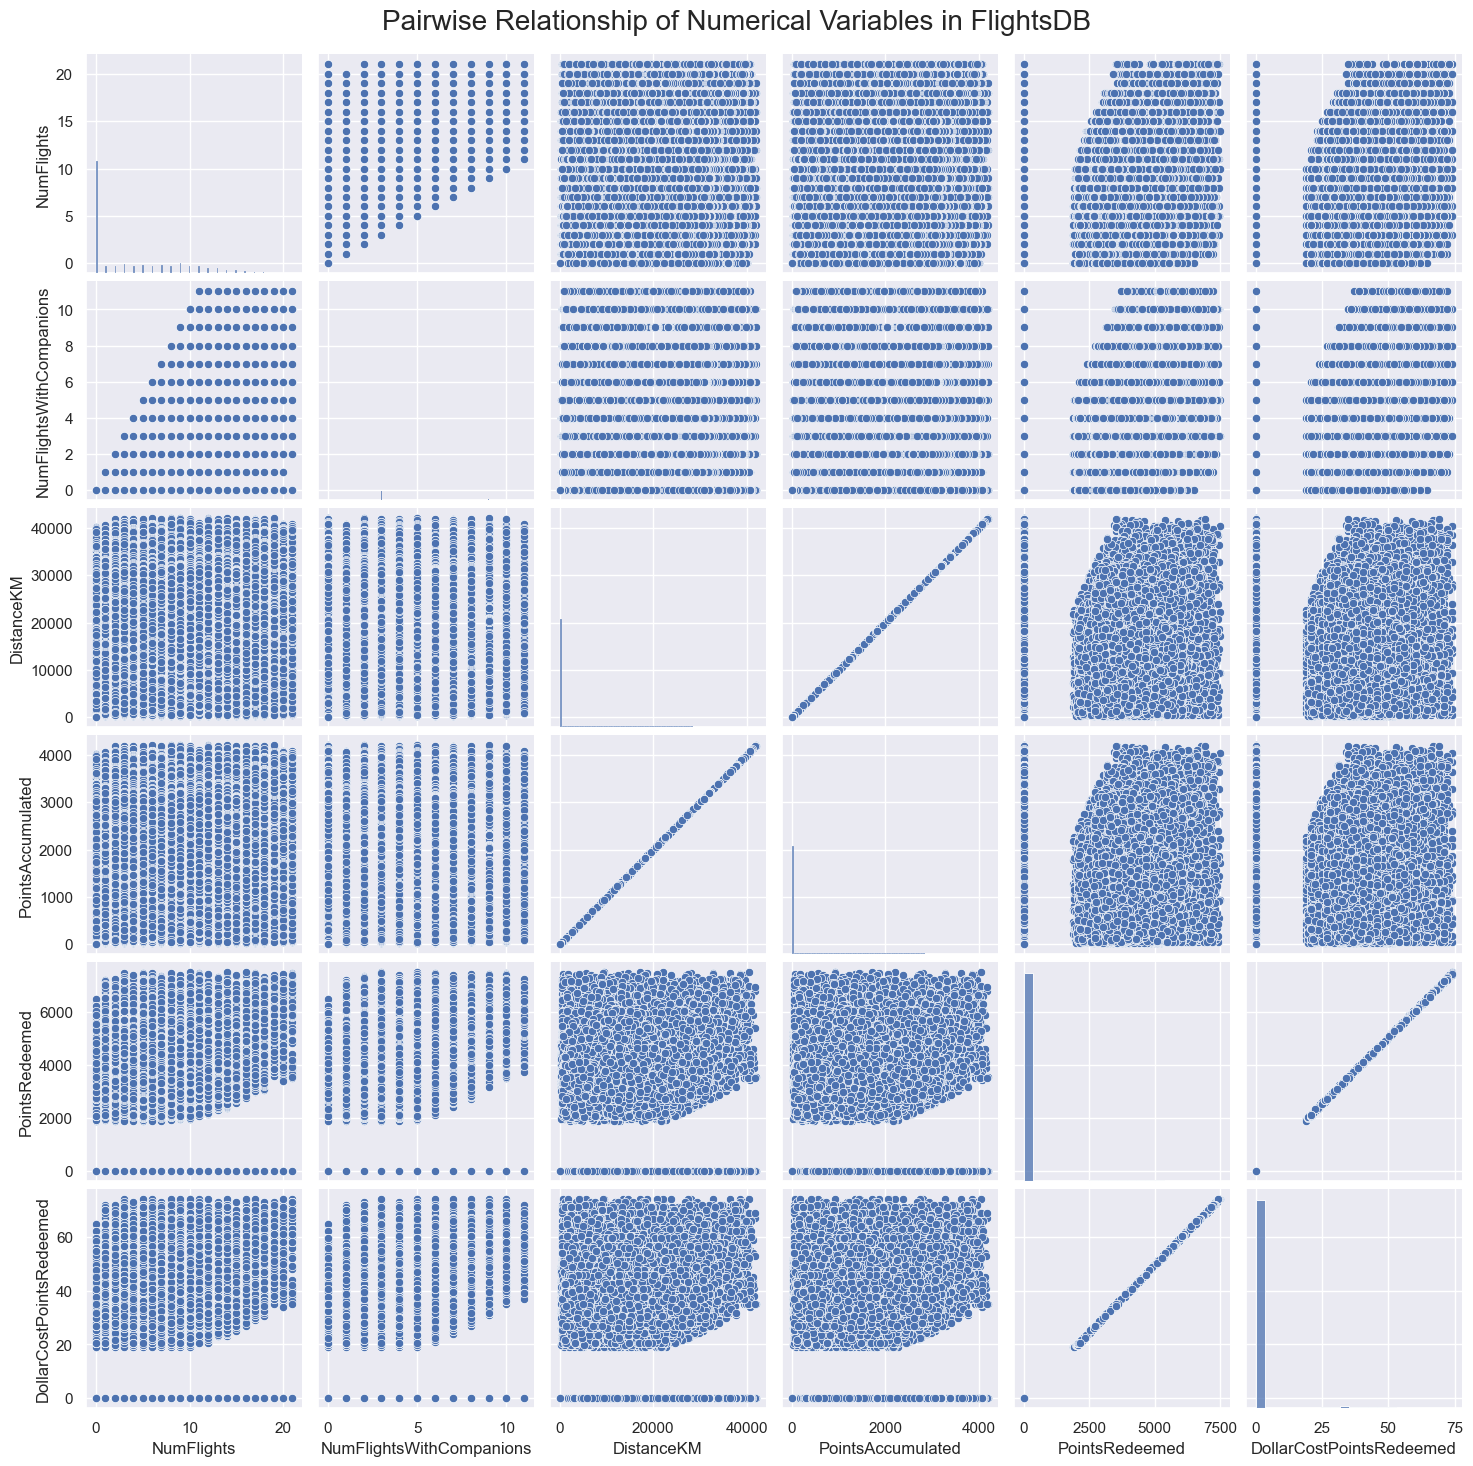

In [53]:
sns.set()

sns.pairplot(df_flights[numeric_flights_features], diag_kind="hist")

plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables in FlightsDB", fontsize=20)
# plt.savefig('pairwise_visualization_flights.png', dpi=200)
plt.show()

- A strong redundancy was identified between `Total_flights`, `DistanceKM` and `PointsAccumulated`, with correlations around 0.95, indicating that only one should be retained to prevent overweighting this dimension. This confirms that these features measure the same single dimension of monthly activity scale - a customer who flies more frequently in a given month also flies a greater distance and accumulates more points.
  
- The `NumFlightsWithCompanions` variable shows minimal correlation with other metrics, suggesting it captures a distinct behavioral aspect.

**Categorical univariate visualizations**

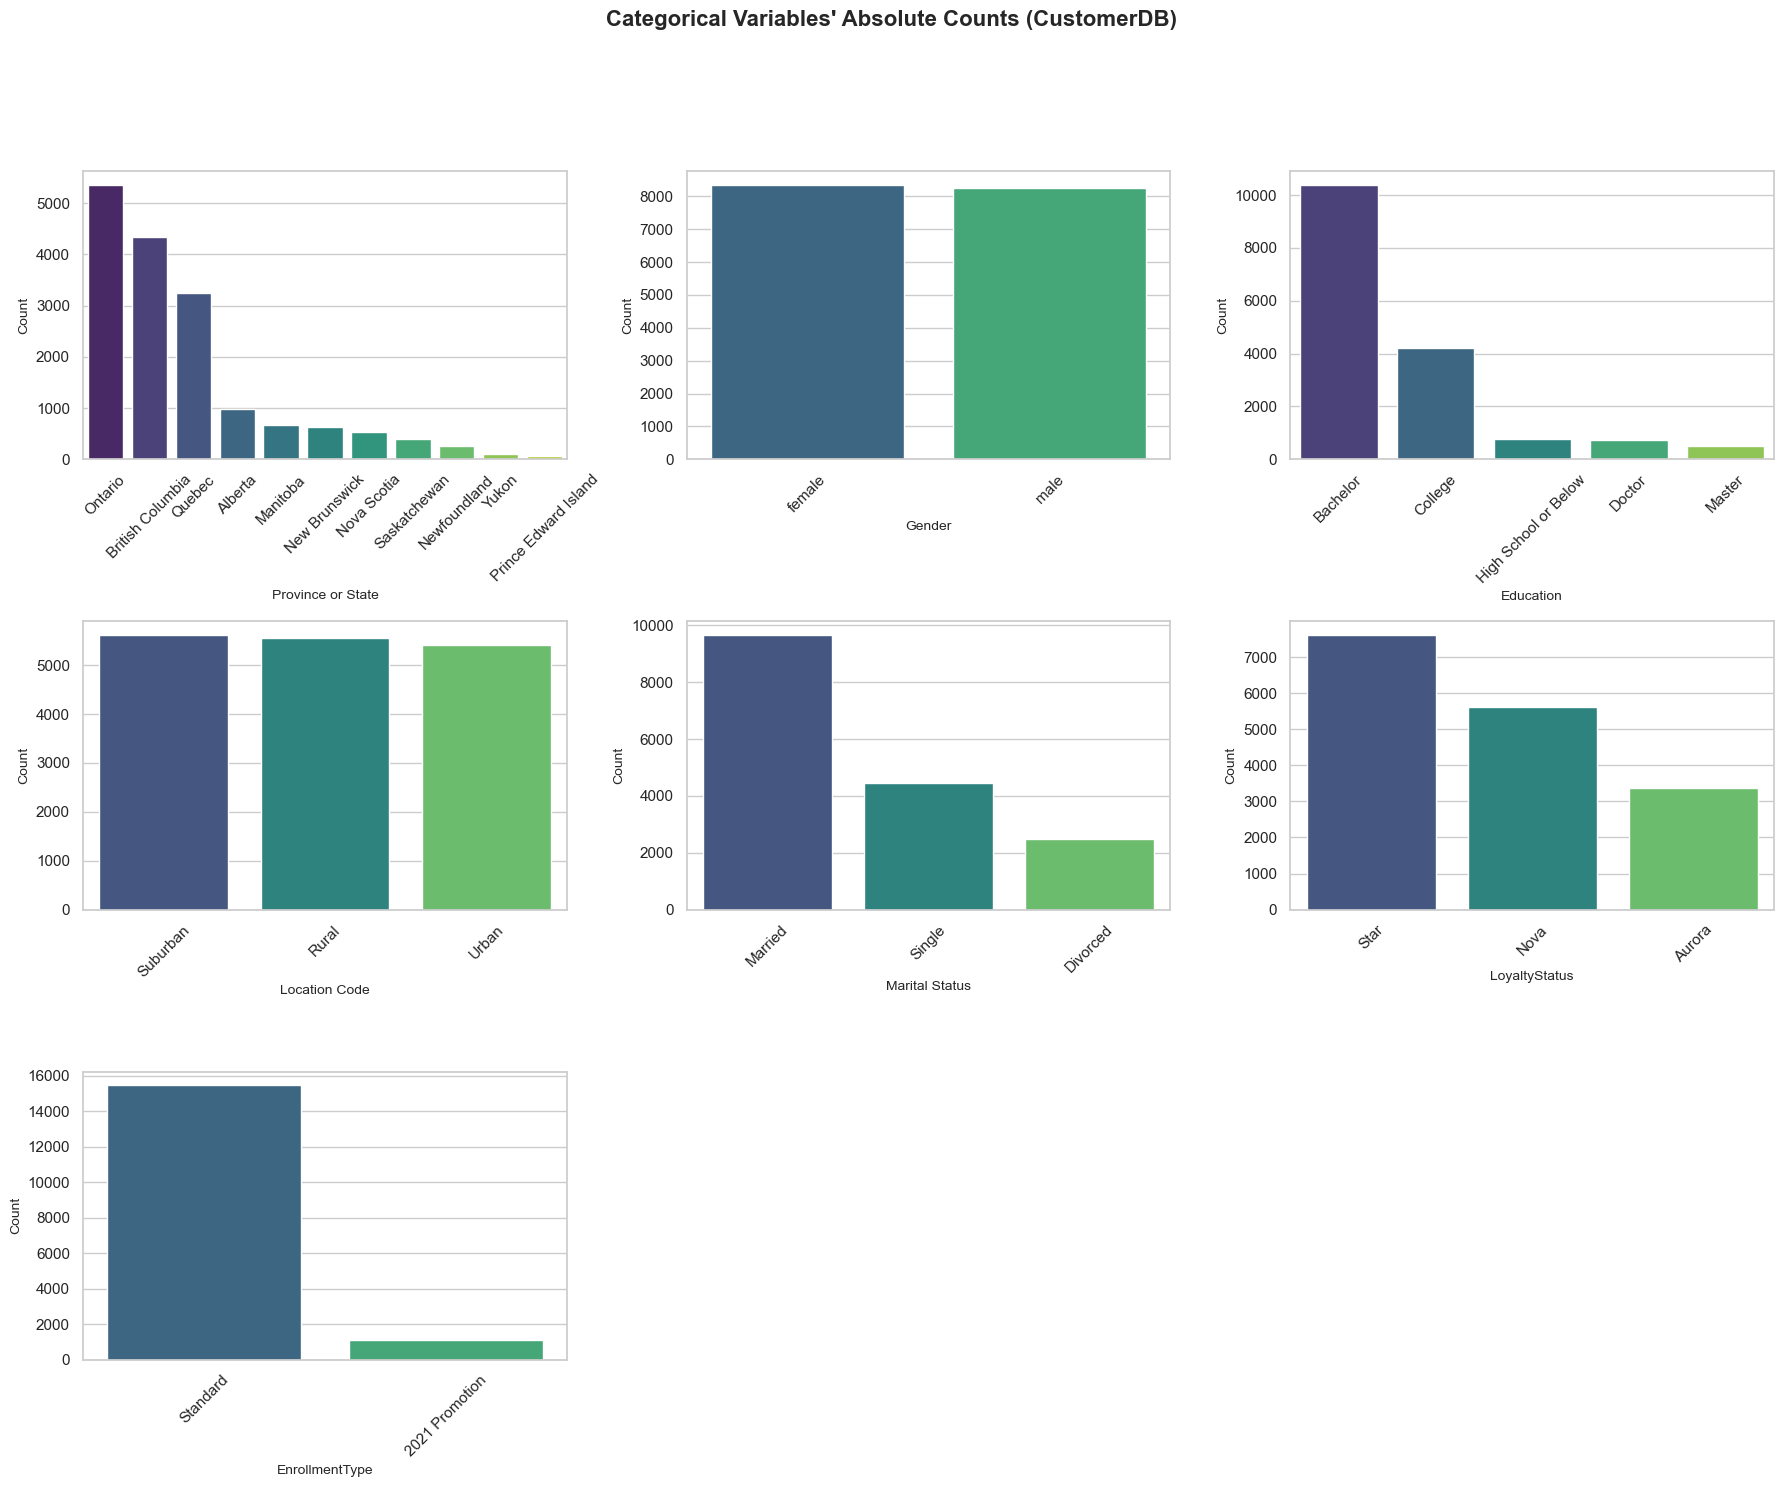

In [54]:
# Key categorical variables from the CustomersDB for segmentation
# The Flights' database don't have relevant categorical variables to be studied
categorical_features = [
    'Province or State', 
    'Gender', 
    'Education', 
    'Location Code', 
    'Marital Status', 
    'LoyaltyStatus',
    'EnrollmentType'
    # 'City' and 'Postal Code' are too granular, 'Country' is constant
]

sns.set_theme(style="whitegrid") 

n_features = len(categorical_features)
sp_cols = 3
sp_rows = ceil(n_features / sp_cols)

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(18, 5 * sp_rows))
axes_flat = axes.flatten()


for ax, feat in zip(axes_flat, categorical_features):
    sns.countplot(
        x=df_customer[feat], 
        ax=ax, 
        palette='viridis', 
        order=df_customer[feat].value_counts().index
    )
    
    ax.set_xlabel(feat, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', rotation=45)

for j in range(n_features, sp_rows * sp_cols):
    fig.delaxes(axes_flat[j])
    
   
plt.suptitle("Categorical Variables' Absolute Counts (CustomerDB)", fontsize=16, weight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('customer_categorical_barplots.png', dpi=200)
plt.show()

- `LoyaltyStatus`: Most customers belong to the Star tier, confirming it as the mass-market segment, while Nova and Aurora tiers represent smaller, high-value groups requiring premium retention strategies.
- `Province or State`: Geographically, customers are mainly concentrated in key Canadian provinces (notably Ontario and Quebec), suggesting that marketing resources should be allocated proportionally to these high-density areas.
- `Gender` and `Marital Status`: Demographic distributions are stable and balanced: gender shows no major dominance, and the marital status highlights a strong presence of married customers, reinforcing the relevance of family-oriented offers. 
- `Education`: Education levels are diverse and not strongly discriminative on their own but may gain importance when combined with Income or CLV. 
- `Enrollment`: Enrollment preferences indicate dominant acquisition of the 'Standard' enrollment.

**Bivariate Categorical Distribution**

`GENDER ANALYSIS`

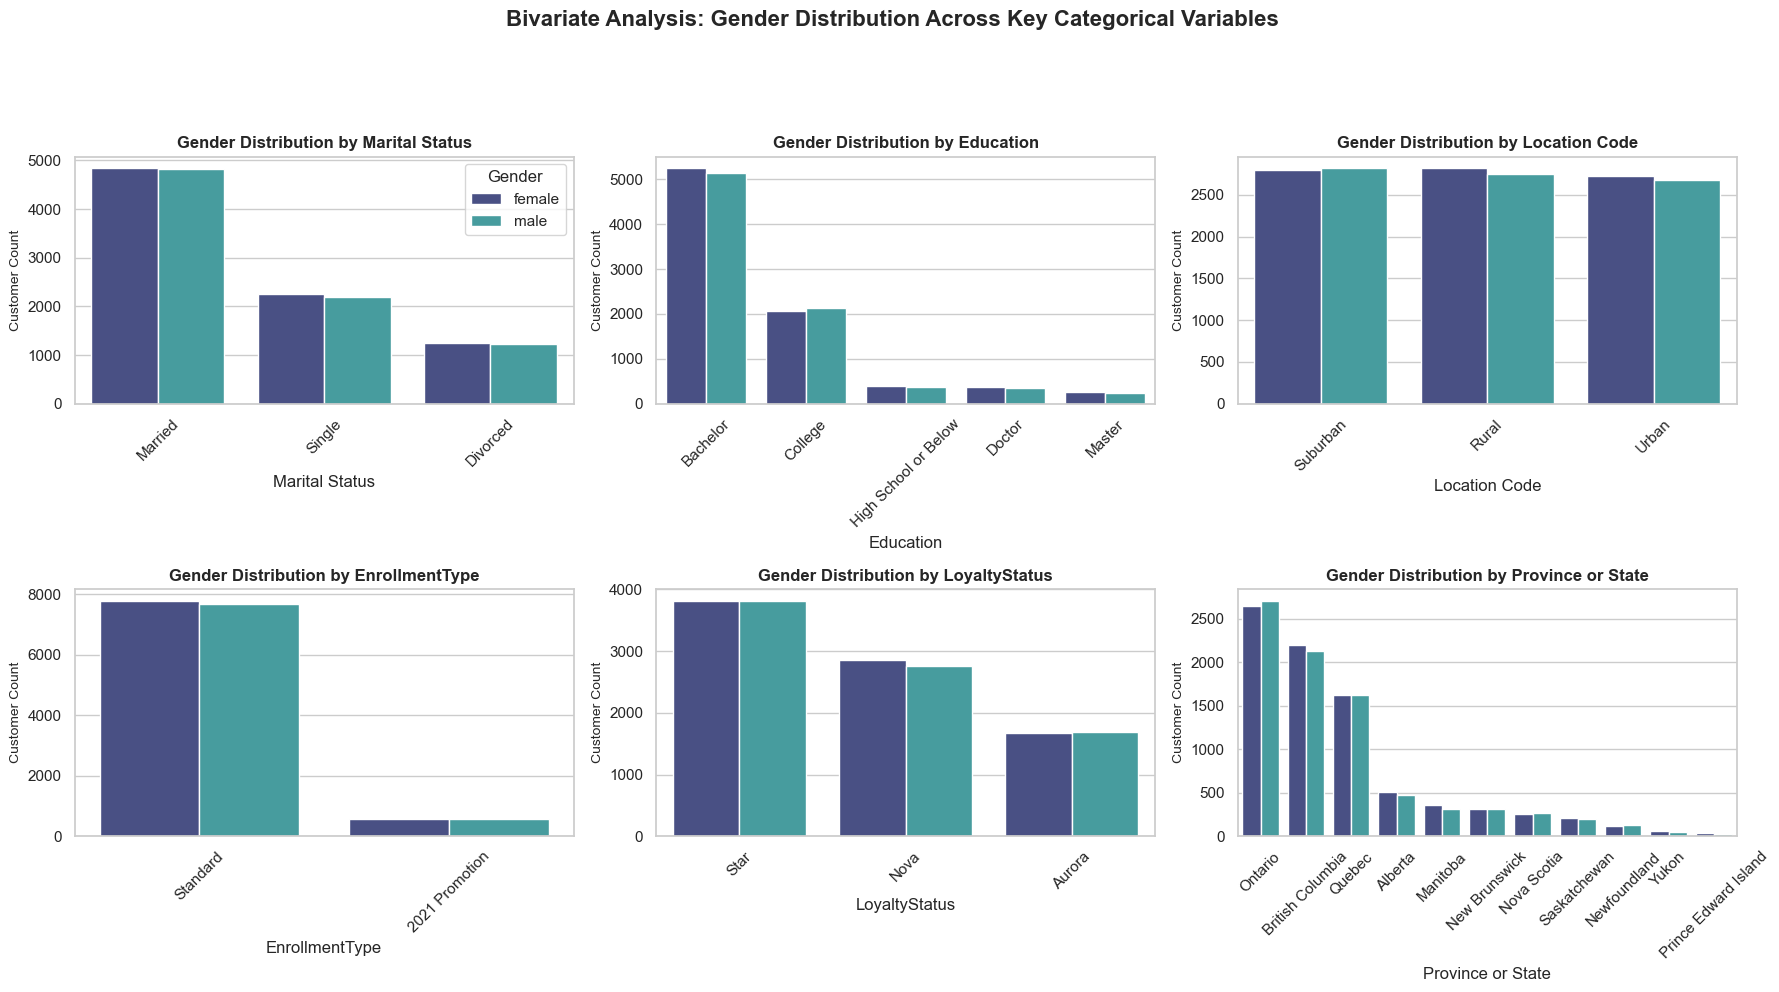

In [55]:
categorical_features = [
    'Marital Status', 
    'Education', 
    'Location Code', 
    'EnrollmentType', 
    'LoyaltyStatus',
    'Province or State'
]

sns.set_theme(style="whitegrid")
n_features = len(categorical_features)
sp_cols = 3
sp_rows = ceil(n_features / sp_cols)

custom_palette = sns.color_palette("mako", n_colors=2) # Apenas 2 cores (Male/Female)

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(18, 5 * sp_rows))
axes_flat = axes.flatten()

for i, feat in enumerate(categorical_features):
    ax = axes_flat[i]
    
    sns.countplot(
        data=df_customer, 
        x=feat, 
        hue='Gender', 
        ax=ax, 
        palette=custom_palette,
        order=df_customer[feat].value_counts().index
    )
    
    ax.set_title(f'Gender Distribution by {feat}', fontsize=12, weight='bold')
    ax.set_ylabel("Customer Count", fontsize=10)
    
    ax.tick_params(axis='x', rotation=45)

    if i == 0:
        ax.legend(title='Gender', loc='upper right')
    else:
        ax.legend([],[], frameon=False) 

for j in range(n_features, sp_rows * sp_cols):
    fig.delaxes(axes_flat[j])

plt.suptitle("Bivariate Analysis: Gender Distribution Across Key Categorical Variables", 
             fontsize=16, weight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('gender_bivariate_analysis.png', dpi=200)
plt.show()

This analysis examines `Gender` balance across key demographic, loyalty, and geographic segments.

- `Loyalty Status`, `Education`, `Location` and `Marital Status`: Nearly equal male/female split in most segments. So, `Gender` is not a primary driver of economic value. In this way, strategies can remain gender-neutral.
- `Province or State`: While generally balanced, some provinces may show a slight skew towards one gender, potentially reflecting regional employment or population patterns.
- `Enrollment Type`: Slight differences, but generally balanced.

`EDUCATION ANALYSIS`

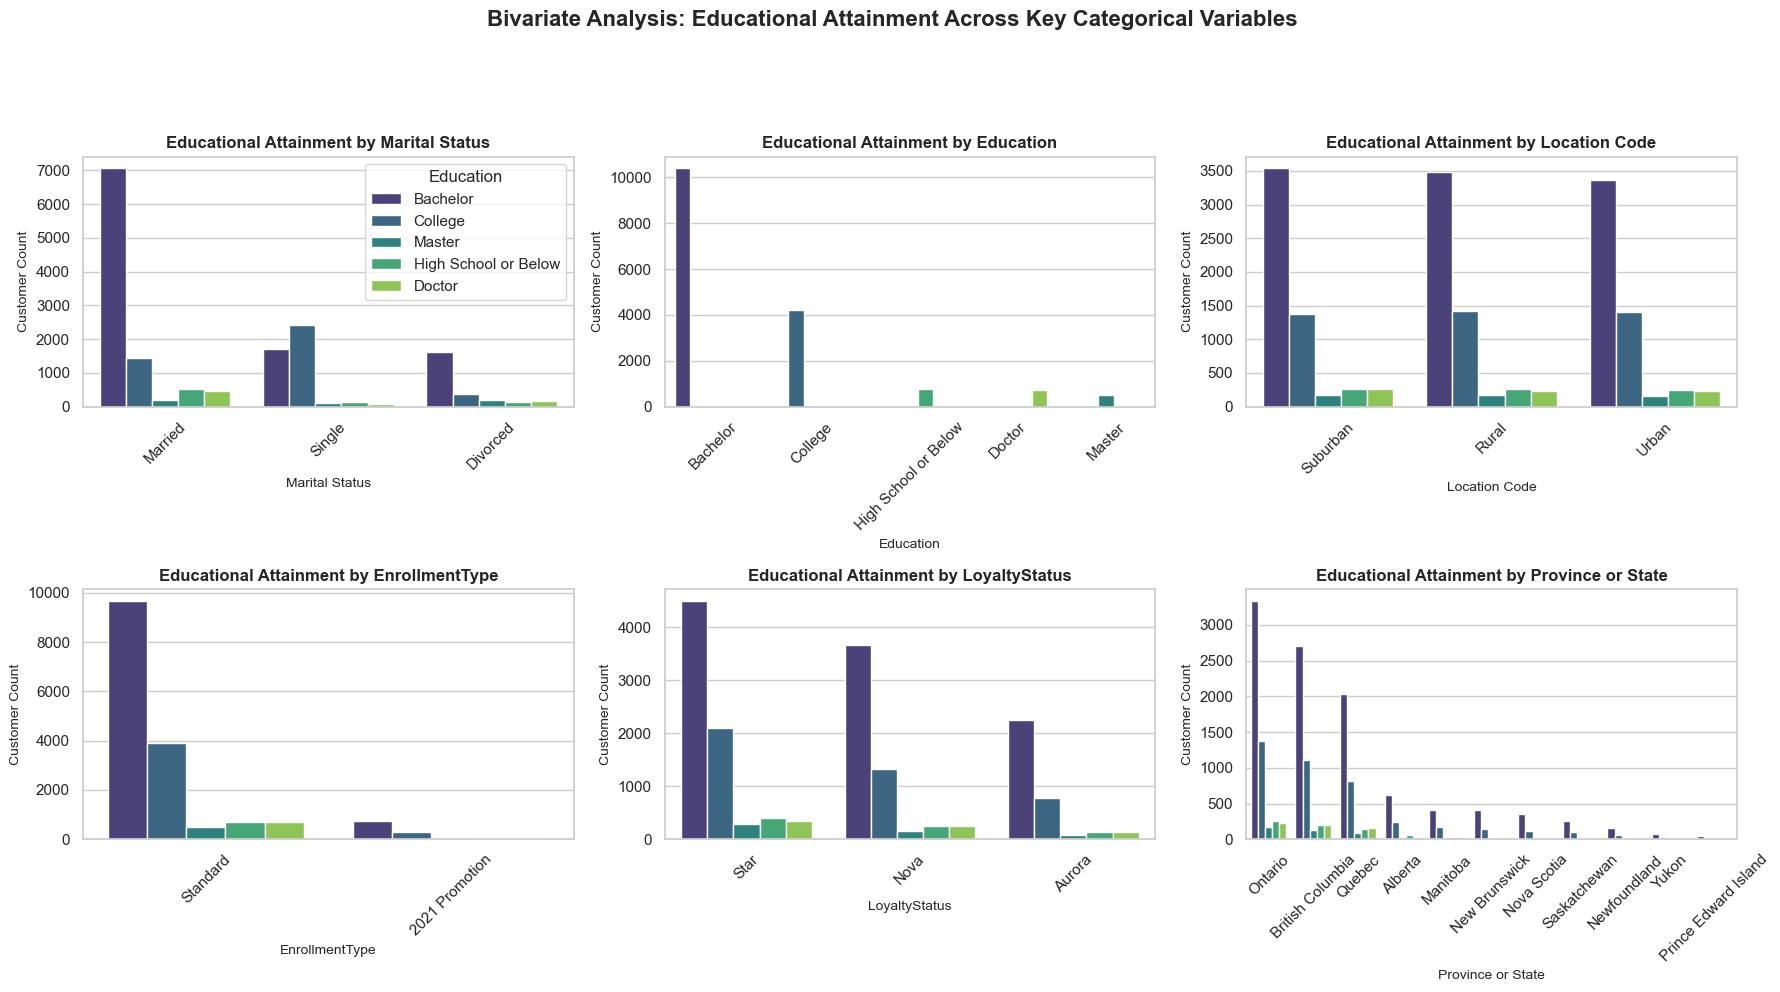

In [56]:
# Configure o Ambiente de Plotagem
sns.set_theme(style="whitegrid")
n_features = len(categorical_features)
sp_cols = 3
sp_rows = ceil(n_features / sp_cols)

custom_palette = sns.color_palette("viridis", n_colors=len(df_customer['Education'].unique()))

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(18, 5 * sp_rows))
axes_flat = axes.flatten()

for i, feat in enumerate(categorical_features):
    ax = axes_flat[i]

    sns.countplot(
        data=df_customer, 
        x=feat, 
        hue='Education', 
        ax=ax, 
        palette=custom_palette,
        order=df_customer[feat].value_counts().index
    )
    
    ax.set_title(f'Educational Attainment by {feat}', fontsize=12, weight='bold')
    ax.set_xlabel(feat, fontsize=10)
    ax.set_ylabel("Customer Count", fontsize=10)
    
    ax.tick_params(axis='x', rotation=45)
    
    if i == 0:
        ax.legend(title='Education', loc='upper right')
    else:
        ax.legend([],[], frameon=False)

for j in range(n_features, sp_rows * sp_cols):
    fig.delaxes(axes_flat[j])

plt.suptitle("Bivariate Analysis: Educational Attainment Across Key Categorical Variables", 
             fontsize=16, weight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('education_bivariate_analysis.png', dpi=200)
plt.show()

This analysis examines educational attainment across key demographic and loyalty variables, confirming its strong influence on customer segmentation.

- `Marital Status`: Single customers predominantly hold College degrees, reflecting lower-income/student profiles, whereas Married customers show higher representation of Bachelor's and Master's degrees, indicating higher income and life-stage stability.
- `Loyalty Status`: Higher tiers (Aurora) correlate with advanced degrees (Master’s, PhD), highlighting education as a reliable predictor of high-value customers.
- `Province or State`: Certain regions show higher concentrations of advanced degrees, suggesting potential geographic differences in professional and high-income populations.
- `Gender`: Educational attainment is balanced across male and female customers, supporting gender-neutral targeting.
- `Location Code`: Distribution of higher education is consistent across Rural, Suburban, and Urban areas, indicating geographic diversity in educational profiles.

`MARITAL STATUS ANALYSIS`

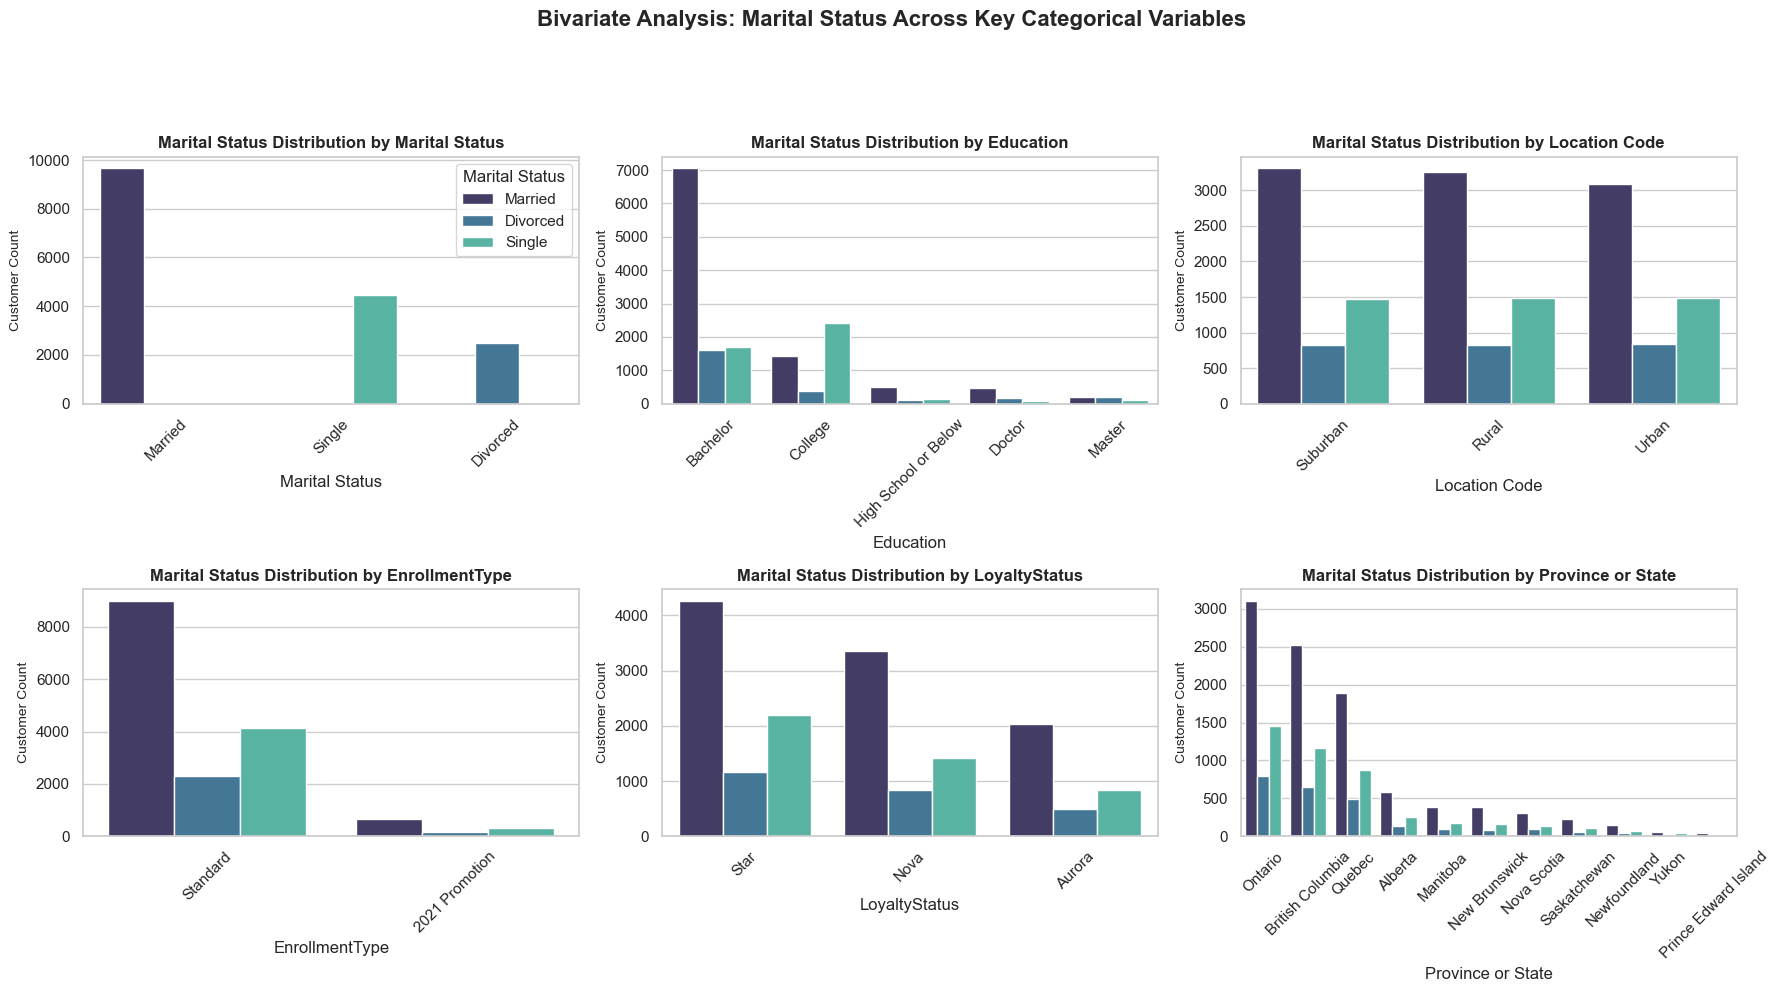

In [57]:
sns.set_theme(style="whitegrid")
n_features = len(categorical_features)
sp_cols = 3
sp_rows = ceil(n_features / sp_cols)

custom_palette = sns.color_palette("mako", n_colors=3)

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(18, 5 * sp_rows))
axes_flat = axes.flatten()

for i, feat in enumerate(categorical_features):
    ax = axes_flat[i]
    
    sns.countplot(
        data=df_customer, 
        x=feat, 
        hue='Marital Status', 
        ax=ax, 
        palette=custom_palette,
        order=df_customer[feat].value_counts().index
    )
    
    ax.set_title(f'Marital Status Distribution by {feat}', fontsize=12, weight='bold')
    ax.set_ylabel("Customer Count", fontsize=10)
    
    ax.tick_params(axis='x', rotation=45)
    
    if i == 0:
        ax.legend(title='Marital Status', loc='upper right')
    else:
        ax.legend([],[], frameon=False) 

for j in range(n_features, sp_rows * sp_cols):
    fig.delaxes(axes_flat[j])

plt.suptitle("Bivariate Analysis: Marital Status Across Key Categorical Variables", 
             fontsize=16, weight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('maritalstatus_bivariate_analysis.png', dpi=200)
plt.show()

This analysis examines the distribution of `Marital Status` (Married, Single, Divorced), confirming its relevance for value-based segmentation:

- `Education`: Single customers are concentrated in the College segment (zero-income/student profile), while Married customers dominate higher educational tiers (Bachelor’s, Master’s, PhD), indicating higher income and CLV.
- `Loyalty Status`: Married customers are prevalent in high-tier loyalty segments (Nova, Aurora), whereas Singles are more concentrated in the Star tier.
- `Gender`: Distribution of marital status is consistent across male and female customers, allowing gender-neutral targeting.
- `Location Code`: Marital status distribution is similar across Rural, Suburban, and Urban areas.
- `Enrollment Type`: Minimal variation across enrollment methods.

`LOYALTY STATUS ANALYSIS`

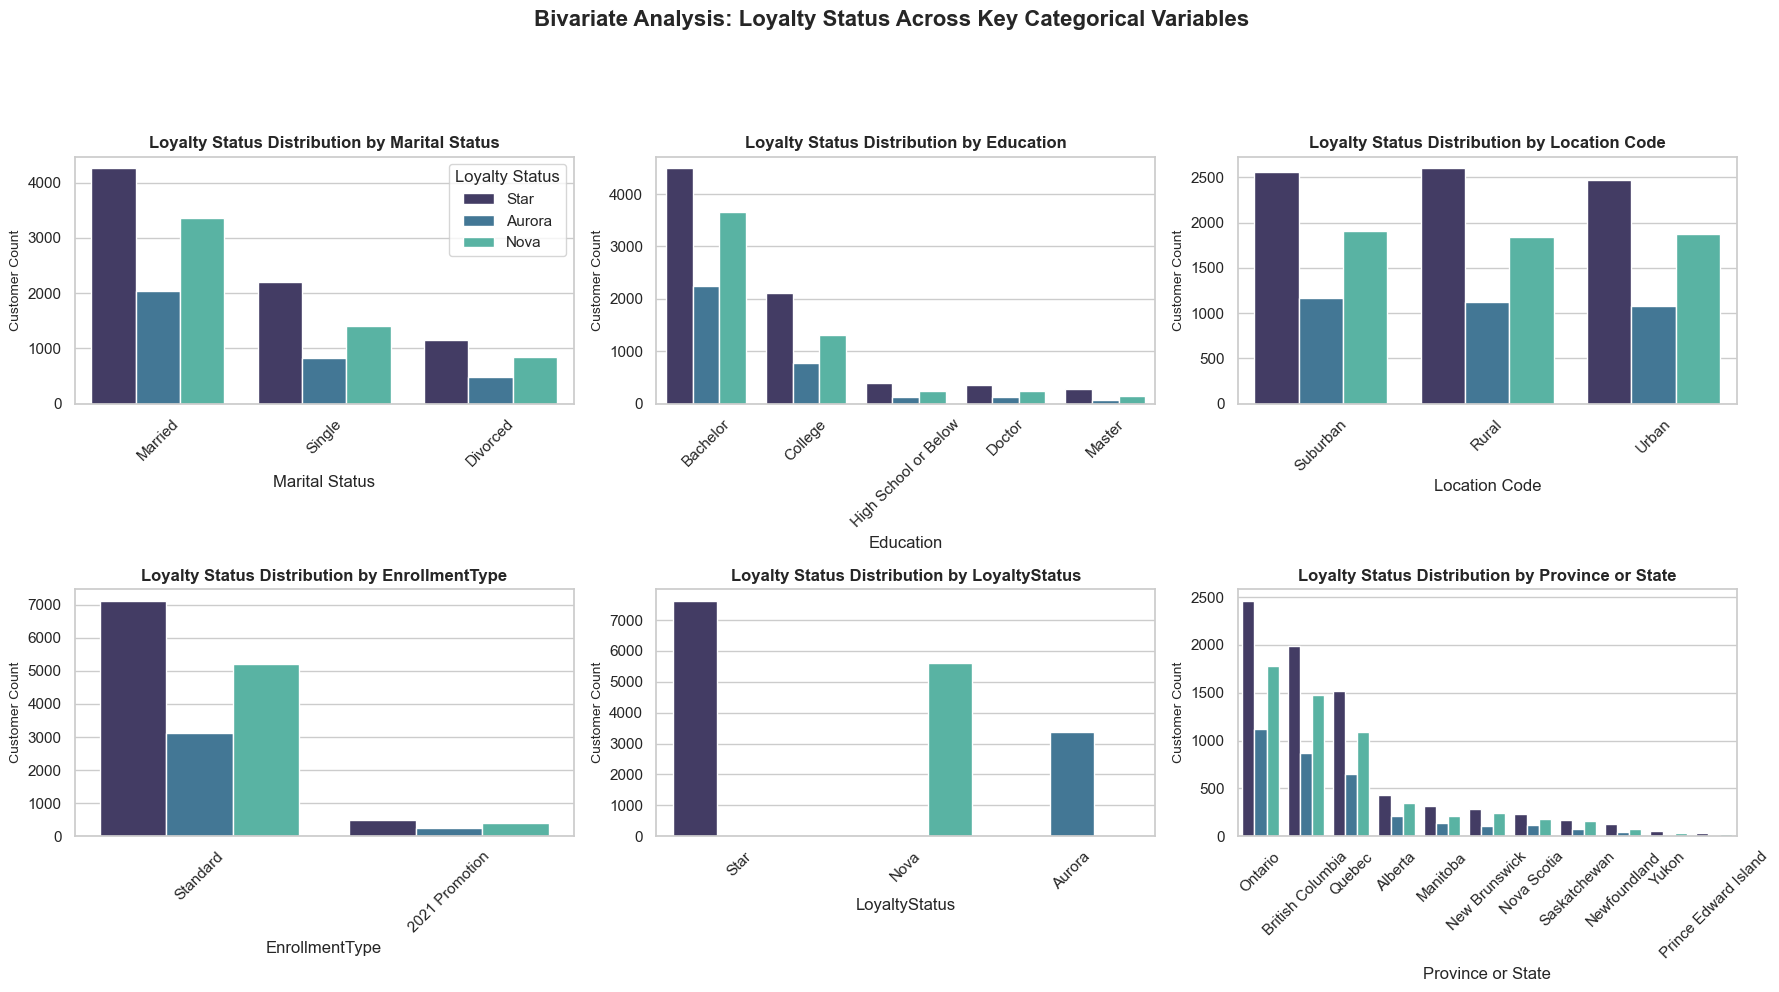

In [58]:
sns.set_theme(style="whitegrid")
n_features = len(categorical_features)
sp_cols = 3
sp_rows = ceil(n_features / sp_cols)

custom_palette = sns.color_palette("mako", n_colors=3)

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(18, 5 * sp_rows))
axes_flat = axes.flatten()

for i, feat in enumerate(categorical_features):
    ax = axes_flat[i]
    
    sns.countplot(
        data=df_customer, 
        x=feat, 
        hue='LoyaltyStatus', 
        ax=ax, 
        palette=custom_palette,
        order=df_customer[feat].value_counts().index
    )
    
    ax.set_title(f'Loyalty Status Distribution by {feat}', fontsize=12, weight='bold')
    ax.set_ylabel("Customer Count", fontsize=10)
    
    ax.tick_params(axis='x', rotation=45)
    
    if i == 0:
        ax.legend(title='Loyalty Status', loc='upper right')
    else:
        ax.legend([],[], frameon=False) 

for j in range(n_features, sp_rows * sp_cols):
    fig.delaxes(axes_flat[j])

plt.suptitle("Bivariate Analysis: Loyalty Status Across Key Categorical Variables", 
             fontsize=16, weight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('loyaltystatus_bivariate_analysis.png', dpi=200)
plt.show()

This analysis examines how `Loyalty Status` (Star, Nova, Aurora) varies across key demographic and lifestyle variables, providing critical insights for value-based customer segmentation.

- `Education`: Higher educational attainment (Bachelor’s, Master’s, PhD) correlates with a greater proportion of Nova and Aurora members.
- `Marital Status`: Married customers are overrepresented in higher tiers, while Single customers concentrate in the Star tier.
- `Location Code`: High-tier membership is distributed across Rural, Suburban, and Urban areas, indicating geographic diversity.
- `Gender`: Balanced across all tiers, suggesting gender-neutral strategies.

`LOCATION CODE`

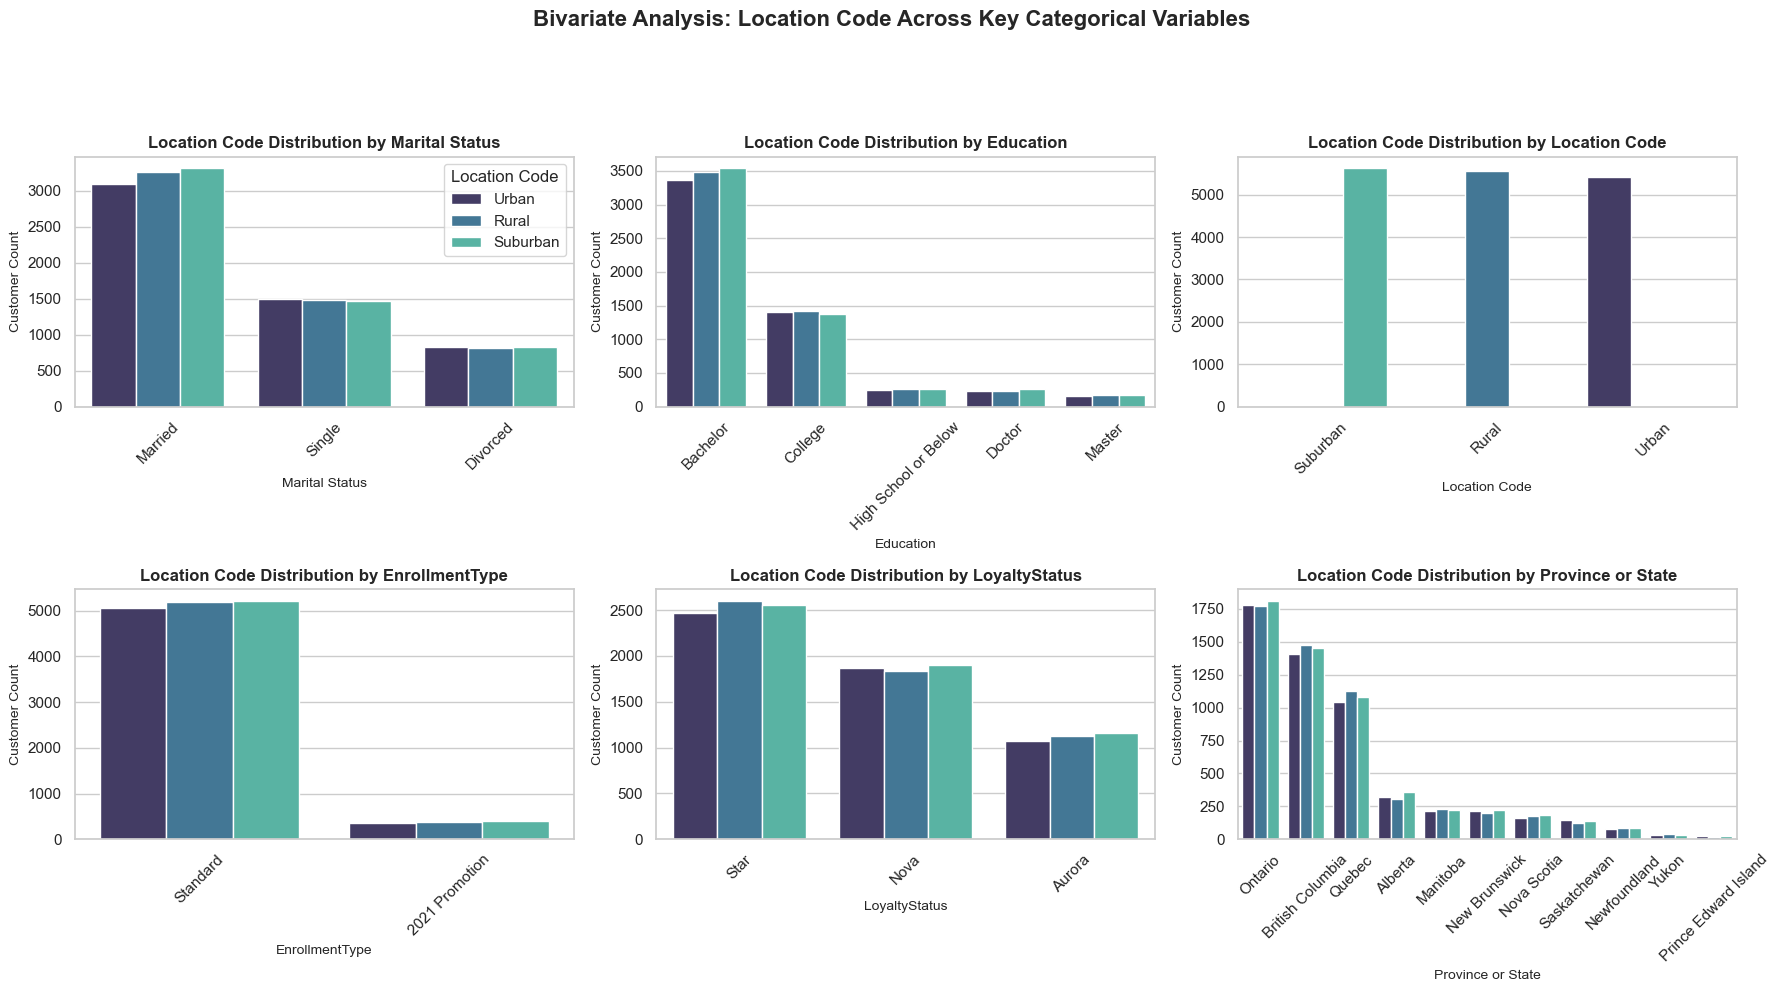

In [59]:
sns.set_theme(style="whitegrid")
n_features = len(categorical_features)
sp_cols = 3
sp_rows = ceil(n_features / sp_cols)

custom_palette = sns.color_palette("mako", n_colors=3)

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(18, 5 * sp_rows))
axes_flat = axes.flatten()

for i, feat in enumerate(categorical_features):
    ax = axes_flat[i]
    
    sns.countplot(
        data=df_customer, 
        x=feat, 
        hue='Location Code', 
        ax=ax, 
        palette=custom_palette,
        order=df_customer[feat].value_counts().index
    )
    
    ax.set_title(f'Location Code Distribution by {feat}', fontsize=12, weight='bold')
    ax.set_xlabel(feat, fontsize=10)
    ax.set_ylabel("Customer Count", fontsize=10)
    
    ax.tick_params(axis='x', rotation=45)
    
    if i == 0:
        ax.legend(title='Location Code', loc='upper right')
    else:
        ax.legend([],[], frameon=False)

for j in range(n_features, sp_rows * sp_cols):
    fig.delaxes(axes_flat[j])

plt.suptitle("Bivariate Analysis: Location Code Across Key Categorical Variables", 
             fontsize=16, weight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('locationcode_bivariate_analysis.png', dpi=200)
plt.show()

This analysis examines whether `Location Code` (Rural, Suburban, Urban) significantly differentiates customers by demographic, loyalty, or life-stage profiles.

- `Marital Status`, `Gender` and `Loyalty Status`: Distribution is highly consistent across all location types, indicating that life stage, gender, and economic value are largely independent of residential environment.
- `Education`: Proportional mix of educational attainment is similar across location codes.
- `Province or State`: Location Code can complement higher-level geographic variables to refine regional clusters, particularly in larger provinces.

`ENROLLMENT TYPE`

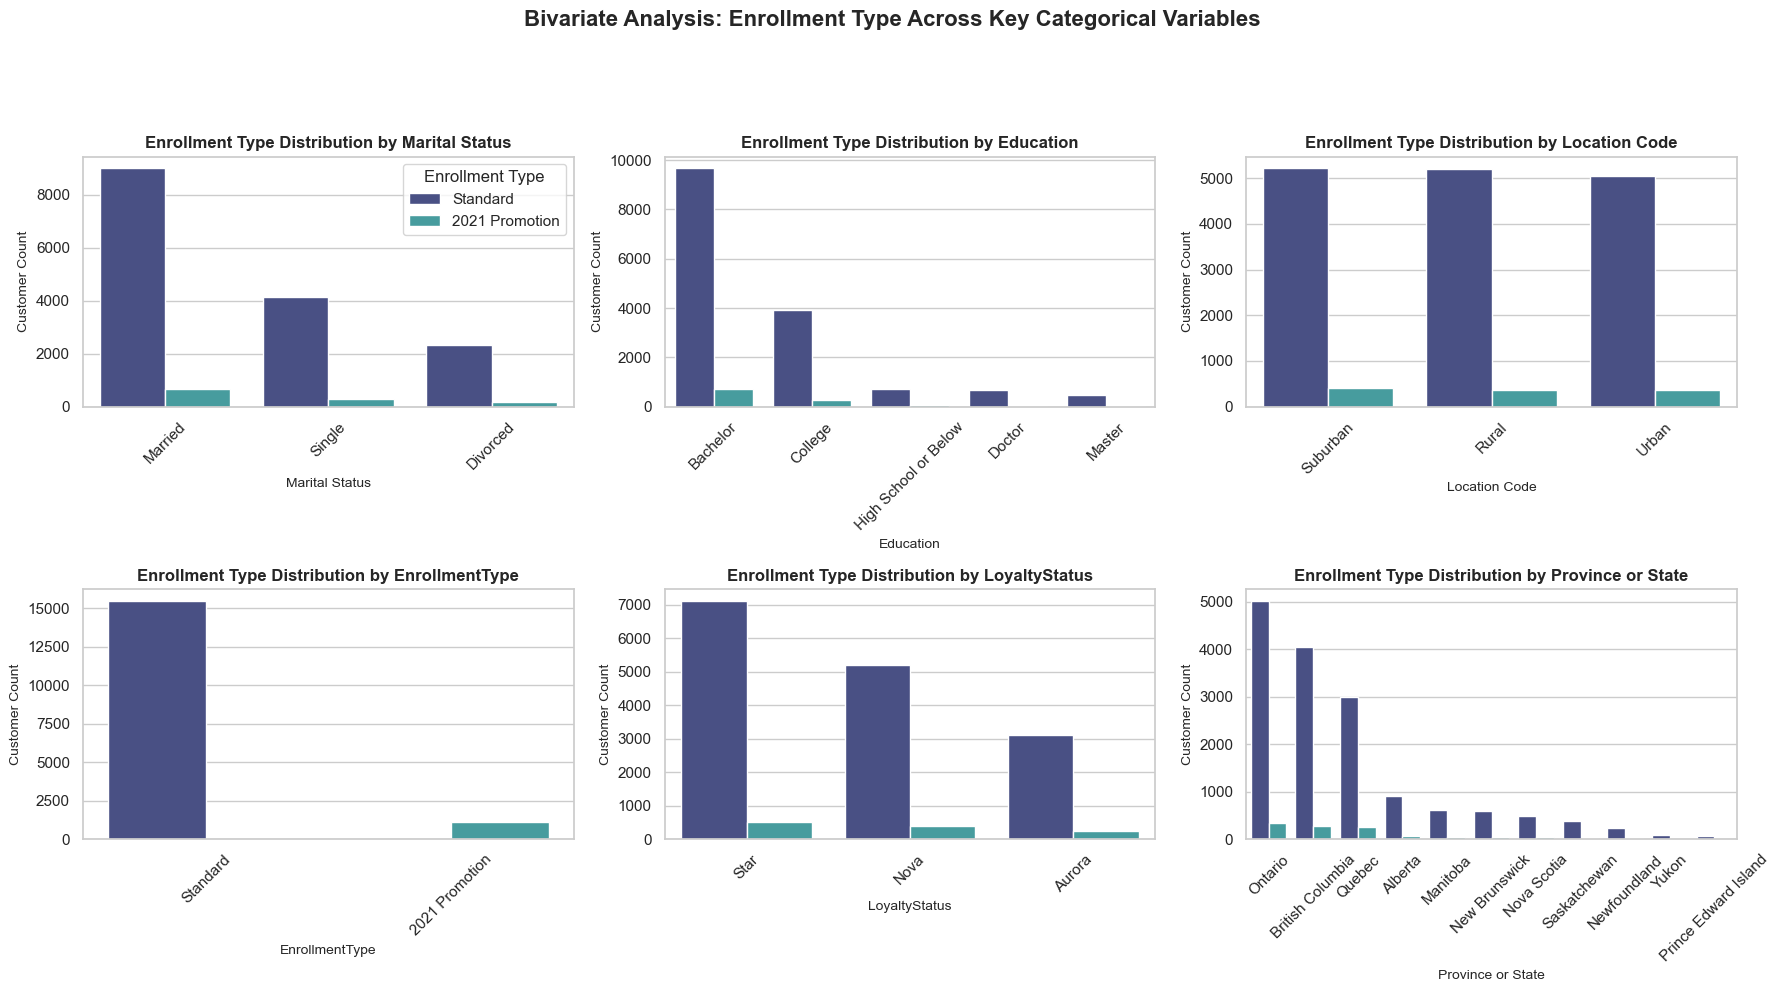

In [60]:
sns.set_theme(style="whitegrid")
n_features = len(categorical_features)
sp_cols = 3
sp_rows = ceil(n_features / sp_cols)

custom_palette = sns.color_palette("mako", n_colors=2)

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(18, 5 * sp_rows))
axes_flat = axes.flatten()

for i, feat in enumerate(categorical_features):
    ax = axes_flat[i]
    
    sns.countplot(
        data=df_customer, 
        x=feat, 
        hue='EnrollmentType', 
        ax=ax, 
        palette=custom_palette,
        order=df_customer[feat].value_counts().index
    )
    
    ax.set_title(f'Enrollment Type Distribution by {feat}', fontsize=12, weight='bold')
    ax.set_xlabel(feat, fontsize=10)
    ax.set_ylabel("Customer Count", fontsize=10)
    
    ax.tick_params(axis='x', rotation=45)
    
    if i == 0:
        ax.legend(title='Enrollment Type', loc='upper right')
    else:
        ax.legend([],[], frameon=False) 

for j in range(n_features, sp_rows * sp_cols):
    fig.delaxes(axes_flat[j])

plt.suptitle("Bivariate Analysis: Enrollment Type Across Key Categorical Variables", 
             fontsize=16, weight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('enrollmenttype_bivariate_analysis.png', dpi=200)
plt.show()

This analysis examines whether `Enrollment Type` (‘Standard’ vs. ‘2021 Promotion’) differentiates customer segments by demographic, educational, or value profiles:

- The 'Standard' enrollment type vastly outnumbers the '2021 Promotion' across all categories
- `Marital Status` and `Gender`: Both enrollment channels capture similar distributions of Married, Single, Divorced, Male, and Female customers.
- `Loyalty Status`: Distribution across Star, Nova, and Aurora tiers is stable for both channels.
- `Education`: Educational attainment profiles are largely consistent across enrollment types.

**Comparing categorical variables vs continuous variables**

`FLIGHTS ALONG TIME`

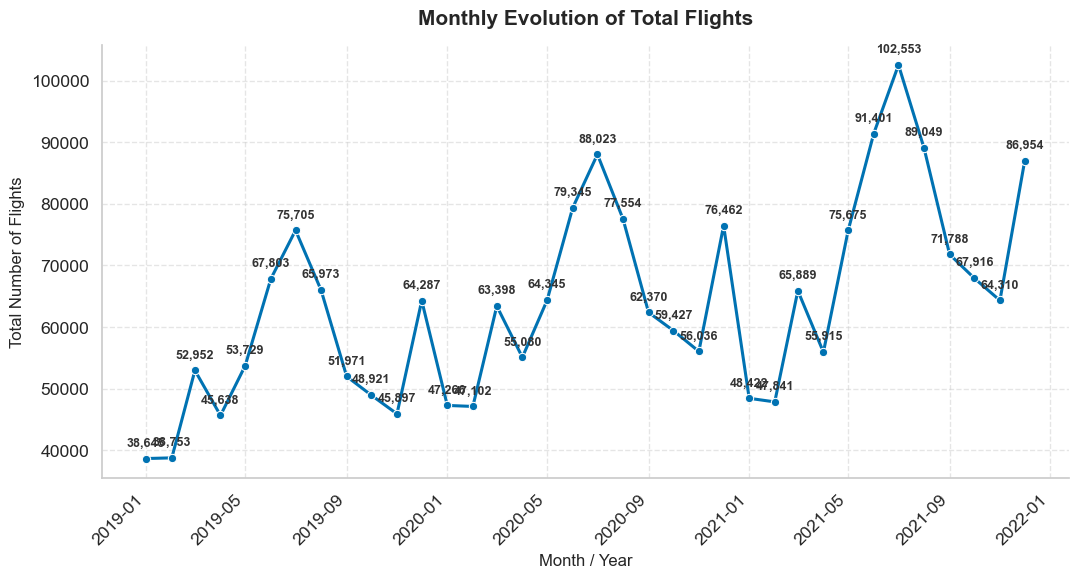

In [61]:
# Ensure datetime type and monthly aggregation
df_flights['YearMonthDate'] = pd.to_datetime(df_flights['YearMonthDate'])
monthly_flights = (
    df_flights.groupby('YearMonthDate')['NumFlights']
    .sum()
    .reset_index()
    .sort_values('YearMonthDate')
)

sns.set_theme(style="whitegrid", font_scale=1.15)

# Create figure
plt.figure(figsize=(11, 6))
ax = sns.lineplot(
    data=monthly_flights,
    x='YearMonthDate',
    y='NumFlights',
    marker='o',
    linewidth=2.2,
    color='#0072B2'
)

# Add labels above each point (adjusted for visibility)
for x, y in zip(monthly_flights['YearMonthDate'], monthly_flights['NumFlights']):
    ax.text(
        x, y + (monthly_flights['NumFlights'].max() * 0.015),
        f"{int(y):,}",  # formatted with thousands separator
        ha='center', va='bottom', fontsize=9, weight='bold', color='#333333'
    )
    
plt.title("Monthly Evolution of Total Flights", fontsize=15, weight='bold', pad=15)
plt.xlabel("Month / Year", fontsize=12)
plt.ylabel("Total Number of Flights", fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()

plt.tight_layout()
plt.show()

This time-series analysis is critical for Behavioral Segmentation and strategic planning:

- It confirms that the aggregated customer base exhibits a **strong sazonal travel behavior** (more travel in Summer/Holidays).
- Marketing efforts should focus on stimulating demand during the "trough" months (January/February) while maximizing high-yield revenue during the "peak" months (August/December) when demand is highest.

`CATEGORICAL DRIVERS OF VALUE AND WEALTH`

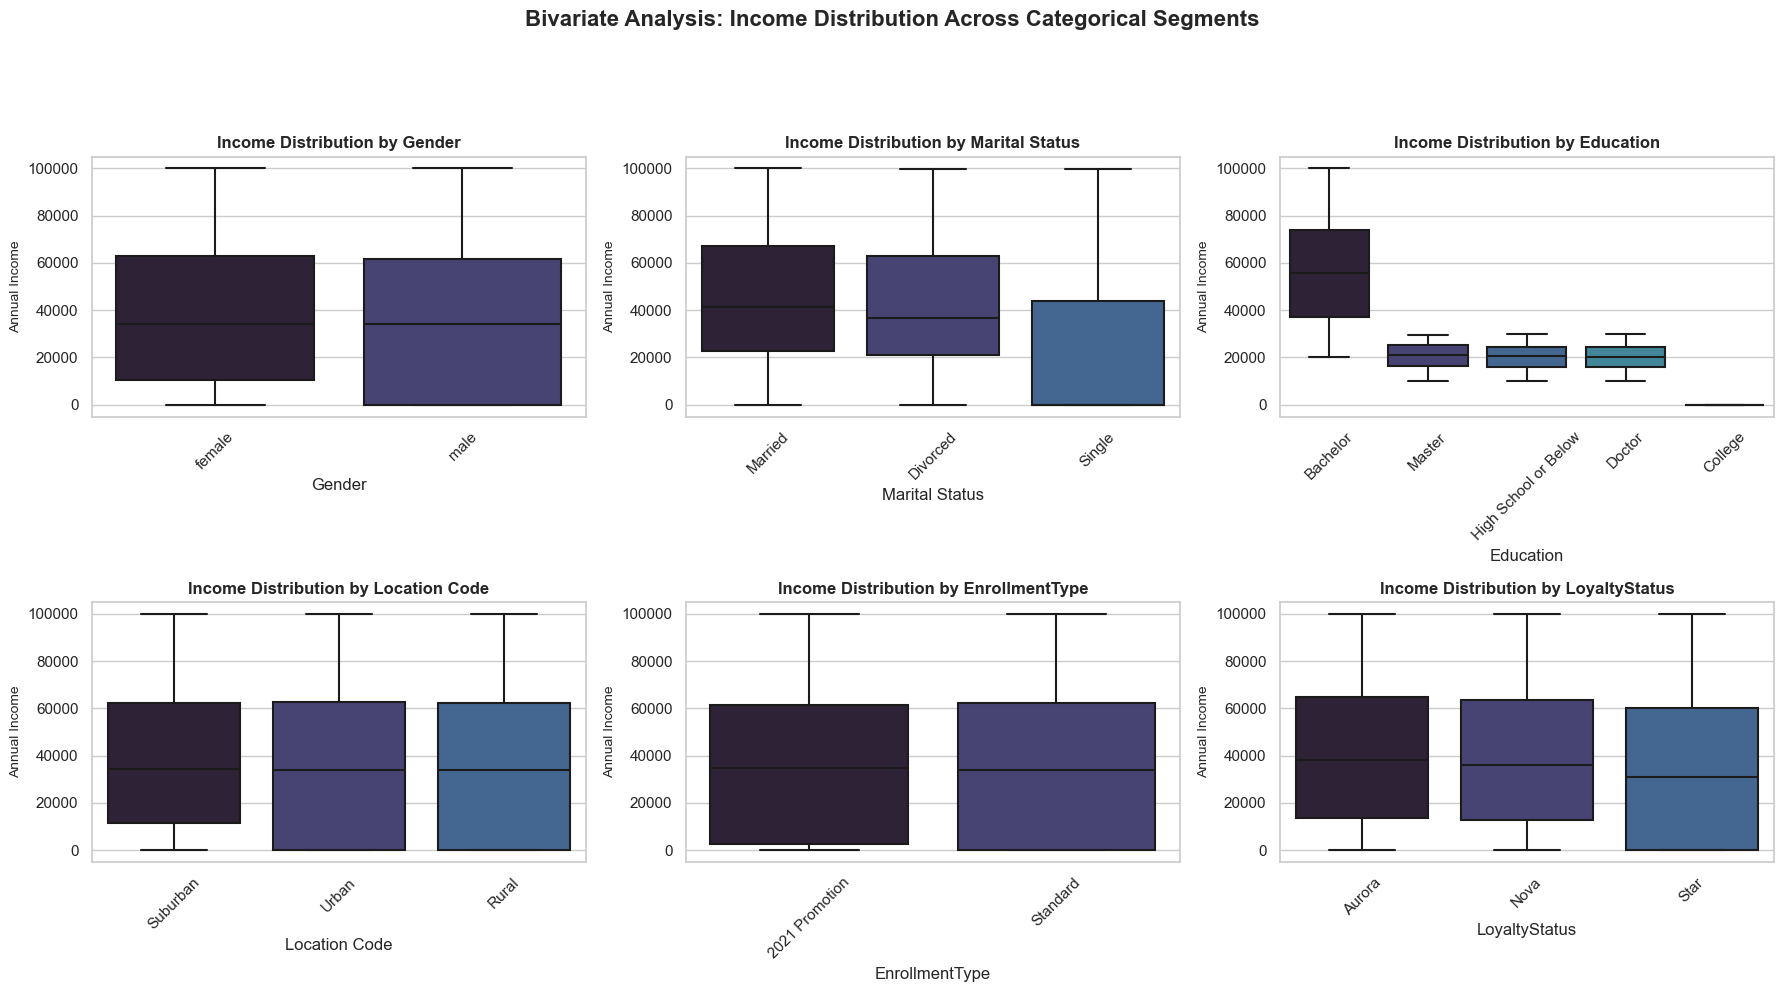

In [62]:
categorical_features = [
    "Gender", 
    "Marital Status", 
    "Education", 
    "Location Code", 
    "EnrollmentType", 
    "LoyaltyStatus"
]

sns.set_theme(style="whitegrid")
n_features = len(categorical_features)
sp_cols = 3
sp_rows = ceil(n_features / sp_cols)

custom_palette = sns.color_palette("mako", as_cmap=False) 

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(18, 5 * sp_rows))
axes_flat = axes.flatten()

for i, feat in enumerate(categorical_features):
    ax = axes_flat[i]
    
    median_order = df_customer.groupby(feat)['Income'].median().sort_values(ascending=False).index
    
    sns.boxplot(
        data=df_customer, 
        x=feat, 
        y='Income', 
        ax=ax, 
        palette=custom_palette,
        order=median_order
    )
    
    ax.set_title(f'Income Distribution by {feat}', fontsize=12, weight='bold')
    ax.set_ylabel("Annual Income", fontsize=10)
    
    ax.tick_params(axis='x', rotation=45)

for j in range(n_features, sp_rows * sp_cols):
    fig.delaxes(axes_flat[j])

plt.suptitle("Bivariate Analysis: Income Distribution Across Categorical Segments", 
             fontsize=16, weight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('bivariate_income_categorical_boxplots.png', dpi=200)
plt.show()

This analysis explores how annual income varies across key demographic and loyalty attributes:

- `Education`: Higher education levels (Master’s, PhD) correlate with higher and more dispersed incomes.
- `Loyalty Status`: Customers in higher tiers (Nova, Aurora) show higher median incomes than those in the Star tier.
- `Gender`, `Location`, `Enrollment Type`: Show little to no variation in income distribution.
- `Marital Status`: Married and Divorced customers have similar income levels, while Singles tend to earn less, possibly due to a younger or early-career demographic.

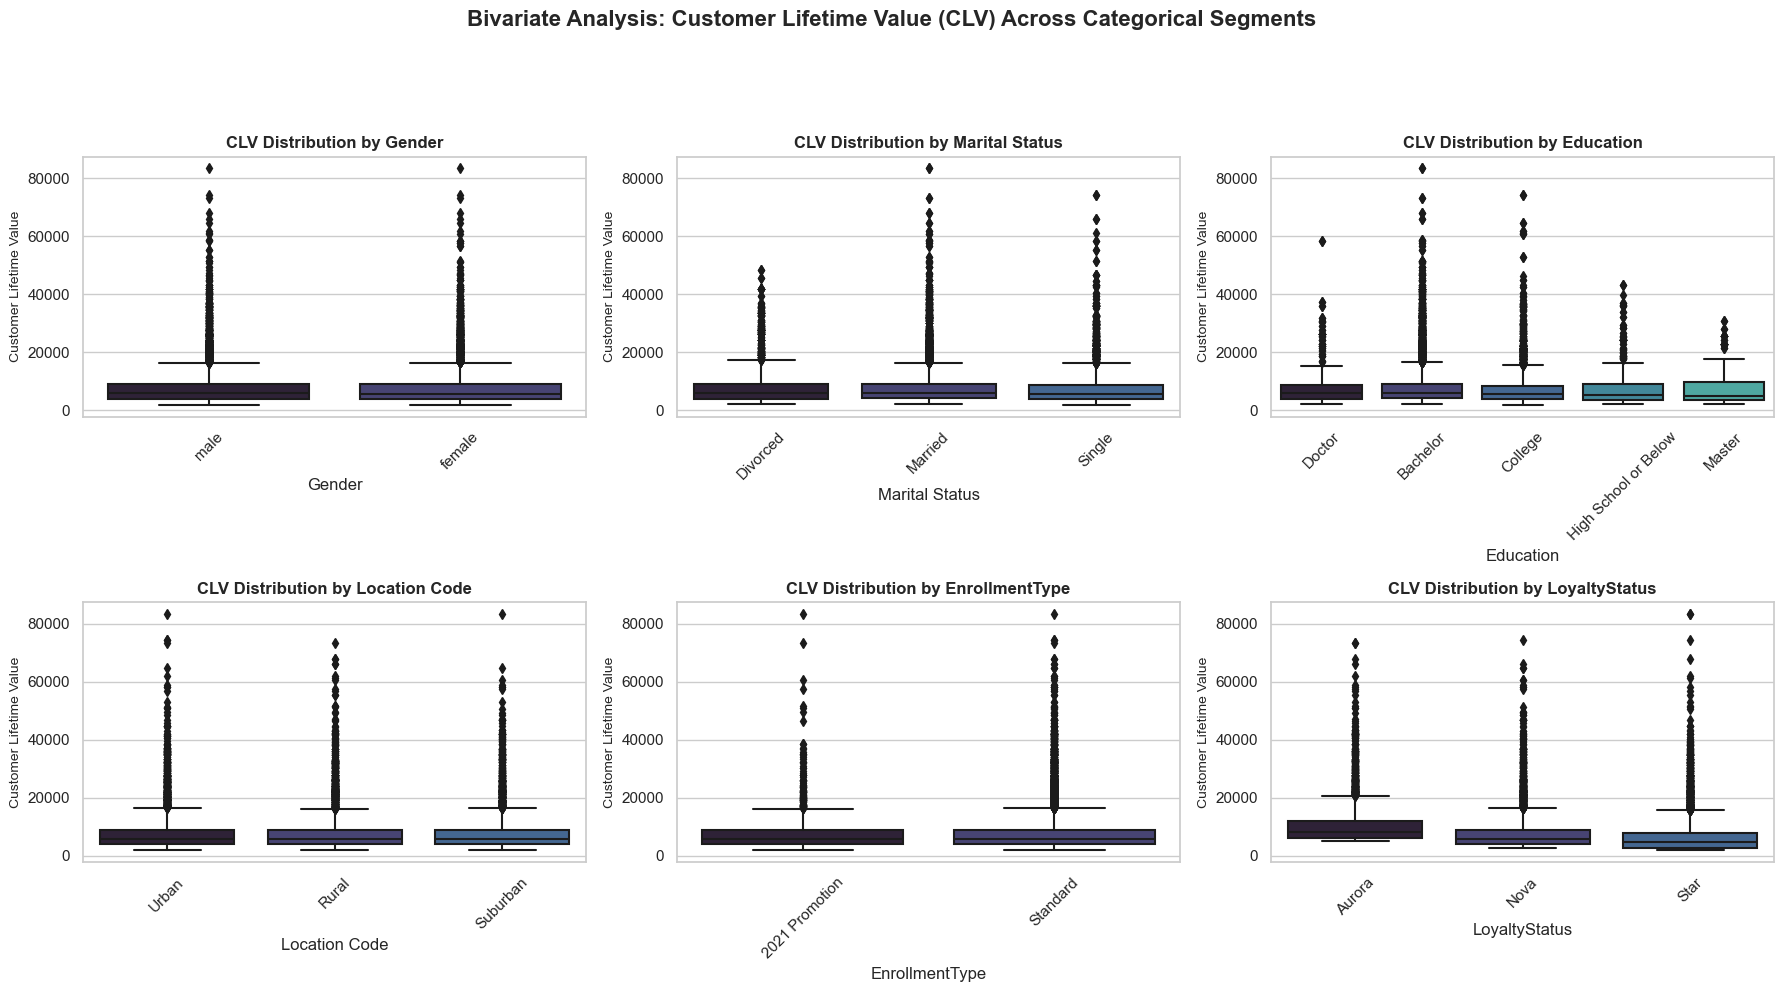

In [63]:
# Configure o Ambiente de Plotagem
sns.set_theme(style="whitegrid")
n_features = len(categorical_features)
sp_cols = 3
sp_rows = ceil(n_features / sp_cols)

custom_palette = sns.color_palette("mako", as_cmap=False) 

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(18, 5 * sp_rows))
axes_flat = axes.flatten()

for i, feat in enumerate(categorical_features):
    ax = axes_flat[i]
    
    median_order = df_customer.groupby(feat)['Customer Lifetime Value'].median().sort_values(ascending=False).index
    
    sns.boxplot(
        data=df_customer, 
        x=feat, 
        y='Customer Lifetime Value', 
        ax=ax, 
        palette=custom_palette,
        order=median_order
    )
    
    ax.set_title(f'CLV Distribution by {feat}', fontsize=12, weight='bold')
    ax.set_ylabel("Customer Lifetime Value", fontsize=10)
    ax.tick_params(axis='x', rotation=45)

for j in range(n_features, sp_rows * sp_cols):
    fig.delaxes(axes_flat[j])

plt.suptitle("Bivariate Analysis: Customer Lifetime Value (CLV) Across Categorical Segments", 
             fontsize=16, weight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('bivariate_clv_categorical_boxplots.png', dpi=200)
plt.show()

This analysis explores how Customer Lifetime Value (CLV) varies across key demographic and loyalty categories:

- `Loyalty Status` according to CLV, Aurora > Nova > Star. It confirms that existing loyalty tiers already reflect customer value.
- `Education`: Higher education levels (Master’s, PhD) correspond to higher CLVs, indicating greater spending potential.
- `Marital Status`: Married and Divorced customers show higher CLVs than Singles, who likely include younger or lower-income individuals.
- `Enrollment Type`: Has minimal effect on long-term value.
- `Gender` and `Location`: Show almost identical CLV distributions across categories.

`ZERO INCOME ANALYSIS`

In [64]:
zero_income = df_customer[df_customer["Income"] == 0]

In [65]:
print(zero_income["Gender"].value_counts())
print("\n")
print(zero_income["Marital Status"].value_counts())
print("\n")
print(zero_income["Education"].value_counts())
print("\n")
print(zero_income["Location Code"].value_counts())
print("\n")
print(zero_income["EnrollmentType"].value_counts())
print("\n")
print(zero_income["LoyaltyStatus"].value_counts())
print("\nZero Income Segment Counts (City's Top 5)")
print(zero_income["City"].value_counts().head(5))

Gender
male      2137
female    2061
Name: count, dtype: int64


Marital Status
Single      2403
Married     1425
Divorced     370
Name: count, dtype: int64


Education
College    4198
Name: count, dtype: int64


Location Code
Rural       1422
Urban       1406
Suburban    1370
Name: count, dtype: int64


EnrollmentType
Standard          3913
2021 Promotion     285
Name: count, dtype: int64


LoyaltyStatus
Star      2096
Nova      1319
Aurora     783
Name: count, dtype: int64

Zero Income Segment Counts (City's Top 5)
City
Toronto      831
Vancouver    652
Montreal     538
Winnipeg     172
Whistler     160
Name: count, dtype: int64


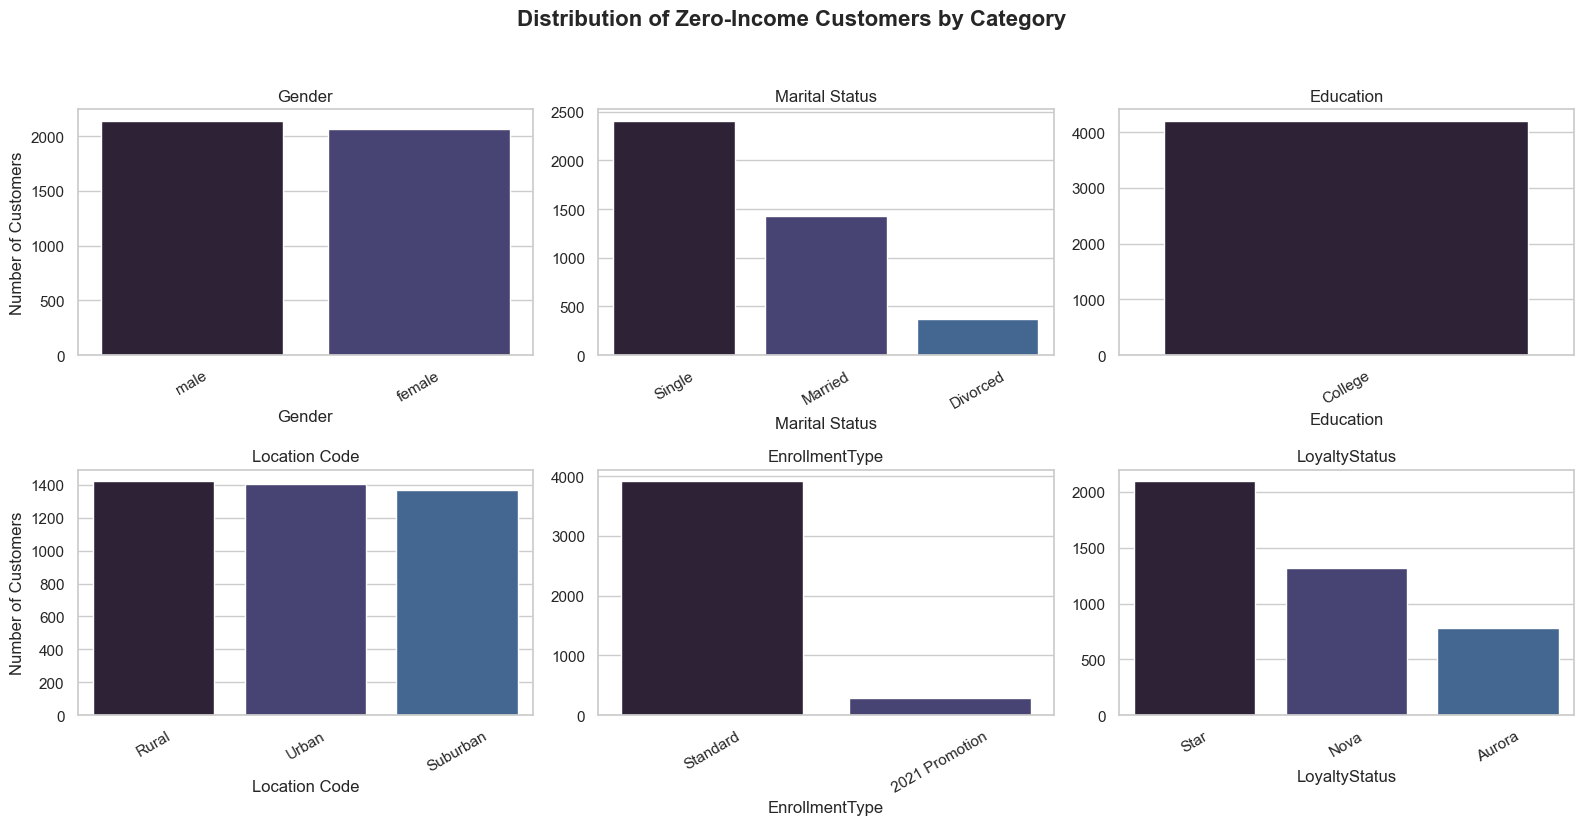

In [66]:
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette("mako", 6) 

# Create figure with 6 subplots (2 rows x 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes_flat = axes.flatten()

features_to_plot = [
    "Gender", 
    "Marital Status", 
    "Education", 
    "Location Code", 
    "EnrollmentType", 
    "LoyaltyStatus"
]

for i, feat in enumerate(features_to_plot):
    ax = axes_flat[i]
    sns.countplot(data=zero_income, x=feat, palette=custom_palette, ax=ax,
                  order=zero_income[feat].value_counts().index)
    
    ax.set_title(feat, fontsize=12)
    ax.set_xlabel(feat)
    ax.set_ylabel("Number of Customers" if i in [0, 3] else "") 
    ax.tick_params(axis='x', rotation=30)

fig.suptitle("Distribution of Zero-Income Customers by Category", fontsize=16, fontweight='bold', y=1.03)

plt.tight_layout()
# plt.savefig('zero_income_analysis_refined_colors.png', dpi=200)
plt.show()

The 4,198 customers reporting **zero income** form a distinct, homogeneous group that aligns with an early-career or student demographic rather than a low-value one: 

- All hold a College degree and are mostly Single, reinforcing a young, early-life-stage profile.
- Despite no income, many belong to Nova and Aurora tiers, indicating strong historical engagement, sponsorship, or accumulated loyalty activity.
- Most joined via Standard enrollment, confirming traditional acquisition channels as the most effective for this group.

`NON-ZERO INCOME ANALYSIS`

In [67]:
non_zero_income = df_customer[df_customer["Income"] != 0]

In [68]:
print(non_zero_income["Gender"].value_counts())
print("\n")
print(non_zero_income["Marital Status"].value_counts())
print("\n")
print(non_zero_income["Education"].value_counts())
print("\n")
print(non_zero_income["Location Code"].value_counts())
print("\n")
print(non_zero_income["EnrollmentType"].value_counts())
print("\n")
print(non_zero_income["LoyaltyStatus"].value_counts())
print("\nZero Income Segment Counts (City's Top 5)")
print(non_zero_income["City"].value_counts().head(5))

Gender
female    6285
male      6111
Name: count, dtype: int64


Marital Status
Married     8233
Divorced    2117
Single      2046
Name: count, dtype: int64


Education
Bachelor                10386
High School or Below      772
Doctor                    724
Master                    504
College                    10
Name: count, dtype: int64


Location Code
Suburban    4246
Rural       4142
Urban       4008
Name: count, dtype: int64


EnrollmentType
Standard          11543
2021 Promotion      853
Name: count, dtype: int64


LoyaltyStatus
Star      5522
Nova      4292
Aurora    2582
Name: count, dtype: int64

Zero Income Segment Counts (City's Top 5)
City
Toronto      2495
Vancouver    1899
Montreal     1491
Winnipeg      494
Whistler      419
Name: count, dtype: int64


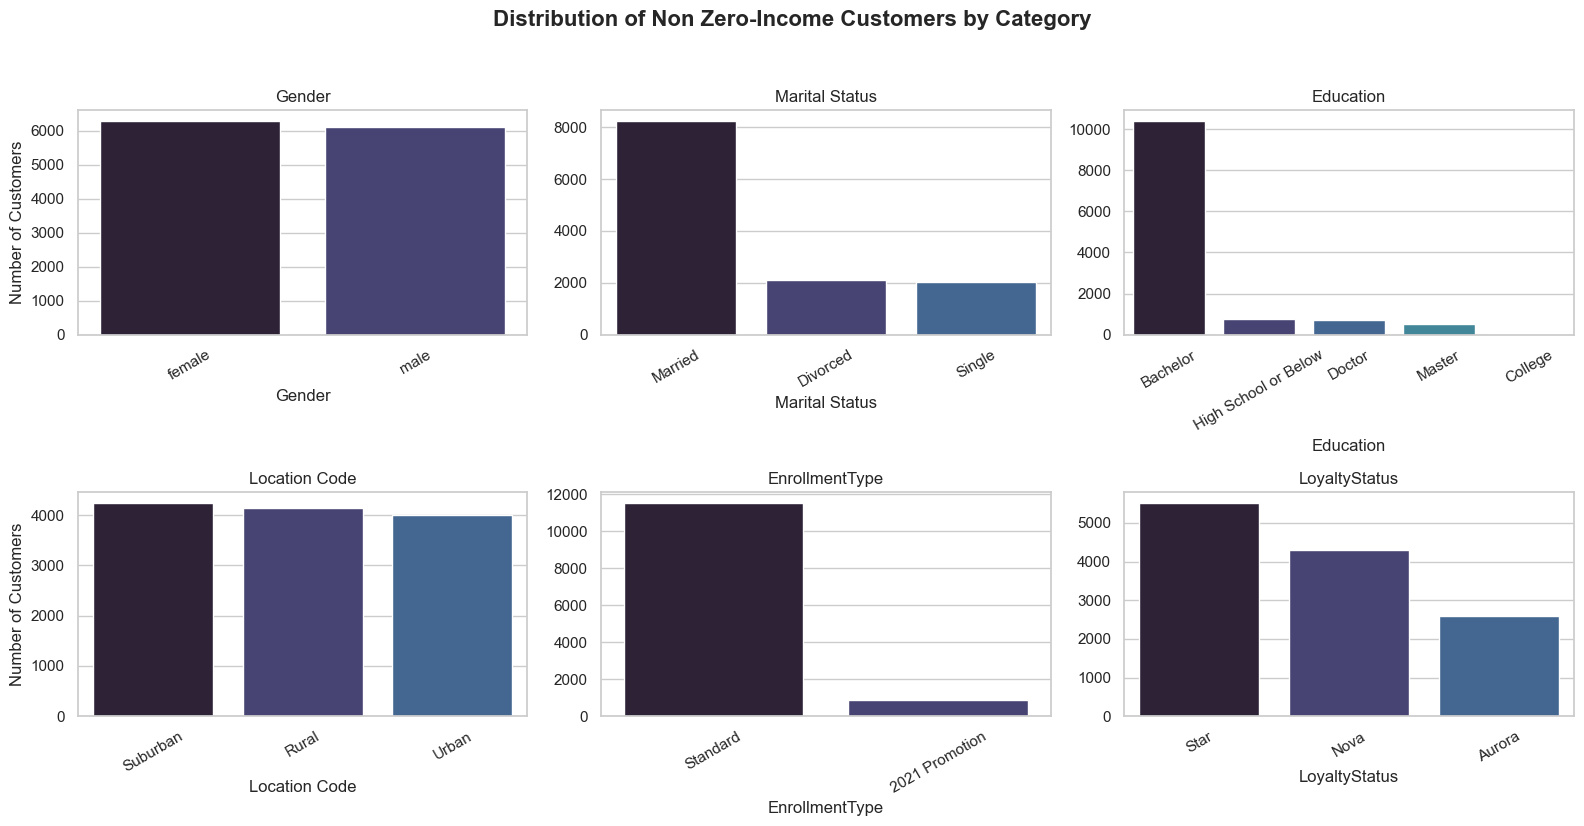

In [69]:
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette("mako", 6) 

# Create figure with 6 subplots (2 rows x 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes_flat = axes.flatten()

features_to_plot = [
    "Gender", 
    "Marital Status", 
    "Education", 
    "Location Code", 
    "EnrollmentType", 
    "LoyaltyStatus"
]

for i, feat in enumerate(features_to_plot):
    ax = axes_flat[i]
    sns.countplot(data=non_zero_income, x=feat, palette=custom_palette, ax=ax,
                  order=non_zero_income[feat].value_counts().index)
    
    ax.set_title(feat, fontsize=12)
    ax.set_xlabel(feat)
    ax.set_ylabel("Number of Customers" if i in [0, 3] else "") 
    ax.tick_params(axis='x', rotation=30)

fig.suptitle("Distribution of Non Zero-Income Customers by Category", fontsize=16, fontweight='bold', y=1.03)

plt.tight_layout()
# plt.savefig('nonzero_income_analysis_refined_colors.png', dpi=200)
plt.show()

This segment represents AIAI’s core and **economically stable customer base** (non-zero income):

- Most customers hold Bachelor’s or higher degrees and are predominantly Married, indicating an older, financially secure group of professionals. Marketing stratagies should target family and premium travel options, leveraging their higher disposable income.
- While Star remains the largest tier, the strong presence of Nova and Aurora members reflects genuine value driven by spending and engagement.
- Most joined through Standard enrollment, confirming traditional channels’ effectiveness.

---

 <font size="4"><span style="color:green">
 **Feature Engineering**
 </span></font>

In this section, we aim to create and explore new features that can enhance our analysis. We will derive new columns from existing data, such as determining the duration of customer relationships based on enrollment dates and categorizing customers based on their income levels.

`REDEMPTION_BEHAVIOUR (monthly)` 

In [70]:
df_flights["Fraction_redeemed_points"] = (
    df_flights["PointsRedeemed"] / df_flights["PointsAccumulated"]).fillna(0) # If PointsAccumulated is 0, the proportion must be 0

# Handle Infinities and Cap at 1.0
df_flights["Fraction_redeemed_points"].replace([np.inf, -np.inf], 0, inplace=True)
df_flights["Fraction_redeemed_points"] = df_flights["Fraction_redeemed_points"].clip(upper=1.0) # Maximum proportion of 100%

In [71]:
def categorize_redemption(row):
    # Non-Redeemer: If the customer has not redeemed any points
    if row['PointsRedeemed'] == 0:
        return 'Non-Redeemer'

    # Heavy Redeemer: Check the most restrictive condition first
    elif row['Fraction_redeemed_points'] >= 0.50:
        return 'Heavy Redeemer'
    
    # Regular Redeemer: Any proportion > 0 that is less than 0.50
    elif row['Fraction_redeemed_points'] > 0:
        return 'Regular Redeemer'
    
    # Fallback (if the proportion is NaN or error)
    else:
        return 'Non-Redeemer' 

df_flights['Redemption_Behavior'] = df_flights.apply(categorize_redemption, axis=1)

print("\nCounts for the New Feature 'Redemption_Behavior' (monthly):")
print(df_flights['Redemption_Behavior'].value_counts().to_markdown())


Counts for the New Feature 'Redemption_Behavior' (monthly):
| Redemption_Behavior   |   count |
|:----------------------|--------:|
| Non-Redeemer          |  561780 |
| Heavy Redeemer        |   34884 |


In [72]:
# The mapping reflects the ascending order of value for each redeemer type
# It helps to, in the deliverable 2, work better with the clusters
# redemption_mapping = {
#    'Non-Redeemer': 0,
#    'Regular Redeemer': 1,
#   'Heavy Redeemer': 2
#}

# Apply the Mapping 
# Create the new numerical feature in df_flights (at the monthly level)
# df_flights['Redemption_Score'] = df_flights['Redemption_Behavior'].map(redemption_mapping)

# Verify the distribution of the new score
# print("\nVerification of Ordinal Encoding (Redemption Score):")
# print(df_flights[['Redemption_Behavior', 'Redemption_Score']].drop_duplicates().sort_values('Redemption_Score').to_markdown(index=False))

In [73]:
df_flights = df_flights.drop(columns=["Fraction_redeemed_points"])
df_flights.columns

Index(['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights',
       'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated',
       'PointsRedeemed', 'DollarCostPointsRedeemed', 'Redemption_Behavior'],
      dtype='object')

`IS_ACTIVE`

NaN values in `CancellationDate` indicate active customers and are therefore kept. Customers with a `CancellationDate` are inactive. A new binary feature `IsActive` is created in CustomerDB based on this distinction. 

In [74]:
df_customer["Is_Active"] = df_customer["CancellationDate"].isna().astype(int)

In [75]:
# percentage distribution
df_customer["Is_Active"].value_counts(normalize=True).round(3) * 100

Is_Active
1    86.4
0    13.6
Name: proportion, dtype: float64

Bar chart 'is_active_distribution.png' has been saved.

Data Summary:
     Status  Count  Percentage
0    Active  14329   86.350488
1  Inactive   2265   13.649512


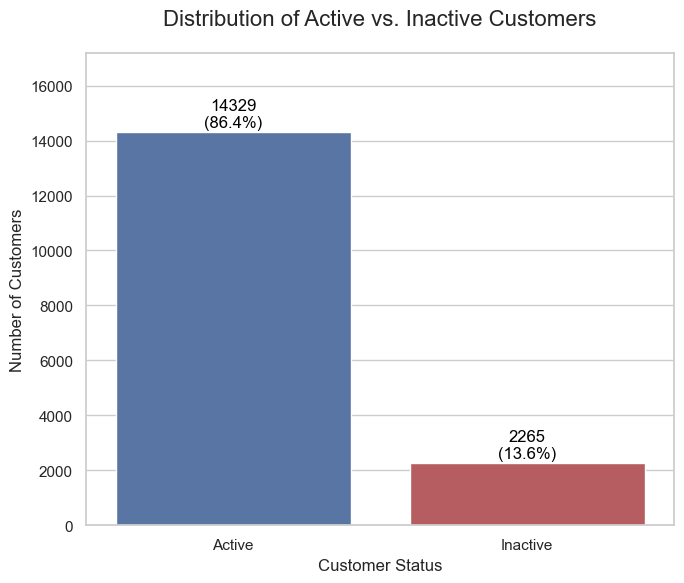

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Load the customer database
try:

    df_customer['Is_Active'] = df_customer['CancellationDate'].notnull().astype(int)

    #  Get the counts and map to more readable names
    counts = df_customer['Is_Active'].value_counts()
    
    # Get counts for 'Active' (0) and 'Inactive' (1)
    # .get(key, 0) ensures that if a category doesn't exist, it returns 0
    active_count = counts.get(0, 0)
    inactive_count = counts.get(1, 0)
    
    # Create a DataFrame for the plot
    plot_data = pd.DataFrame({
        'Status': ['Active', 'Inactive'],
        'Count': [active_count, inactive_count]
    })
    
    # Calculate percentages
    total_customers = plot_data['Count'].sum()
    plot_data['Percentage'] = (plot_data['Count'] / total_customers) * 100

    # Create the bar chart
    plt.figure(figsize=(7, 6))
    ax = sns.barplot(
        x='Status',
        y='Count',
        data=plot_data,
        palette=['#4C72B0', '#C44E52']  # Blue for Active, Red for Inactive
    )

    # Add annotations (Count and Percentage) above the bars
    for index, row in plot_data.iterrows():
        # Place the text slightly above the bar
        ax.text(
            index, 
            row['Count'] + (total_customers * 0.01),  # Offset by 1% of total height
            f"{row['Count']}\n({row['Percentage']:.1f}%)", 
            color='black', 
            ha="center",
            fontsize=12
        )

    # Set title and labels
    ax.set_title('Distribution of Active vs. Inactive Customers', fontsize=16, pad=20)
    ax.set_xlabel('Customer Status', fontsize=12)
    ax.set_ylabel('Number of Customers', fontsize=12)
    
    # Adjust the Y-axis limit to make space for the text
    ax.set_ylim(0, plot_data['Count'].max() * 1.2) 

    # Save the figure
    plt.tight_layout()
    plt.savefig('is_active_distribution.png')

    print("Bar chart 'is_active_distribution.png' has been saved.")
    print("\nData Summary:")
    print(plot_data)

except FileNotFoundError:
    print("Error: The file 'DM_AIAI_CustomerDB.csv' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

`FIDELITY_AGE_YEARS`

In [77]:
# Convert date columns to datetime format
df_customer['EnrollmentDateOpening'] = pd.to_datetime(
    df_customer['EnrollmentDateOpening'], format='%d/%m/%Y', errors='coerce'
)
df_customer['CancellationDate'] = pd.to_datetime(
    df_customer['CancellationDate'], format='%d/%m/%Y', errors='coerce'
)

# Define today's date
today = pd.Timestamp(datetime.today())

# Calculate fidelity age in years
df_customer['Fidelity_Age_Years'] = (
    (df_customer['CancellationDate'].fillna(today) - df_customer['EnrollmentDateOpening'])
    .dt.days / 365
)

print(df_customer[['EnrollmentDateOpening', 'CancellationDate', 'Fidelity_Age_Years']].head())

   EnrollmentDateOpening CancellationDate  Fidelity_Age_Years
ID                                                           
0             2019-02-15              NaT            6.723288
1             2019-03-09              NaT            6.663014
2             2017-07-14       2021-01-08            3.490411
3             2016-02-17              NaT            9.720548
4             2017-10-25              NaT            8.032877


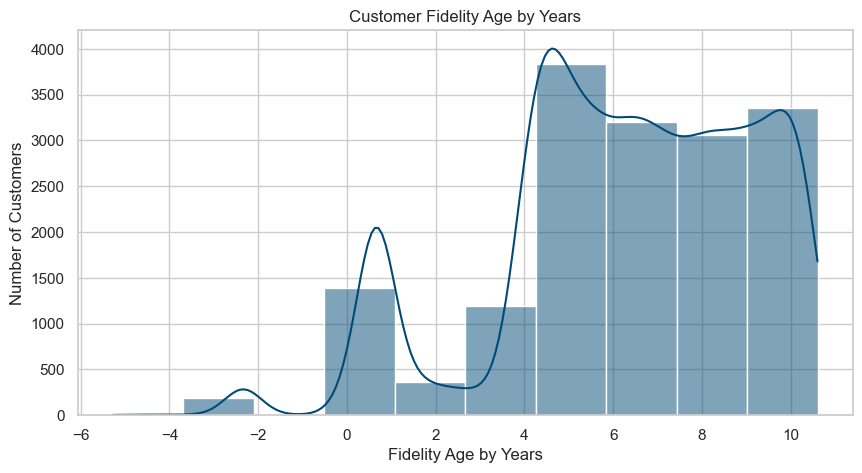

In [78]:
plt.figure(figsize=(10,5))
sns.histplot(df_customer['Fidelity_Age_Years'], bins=10, kde=True, color='#004A77')
plt.title("Customer Fidelity Age by Years")
plt.xlabel("Fidelity Age by Years")
plt.ylabel("Number of Customers")
plt.show()

In [79]:
negatives = df_customer[df_customer['Fidelity_Age_Years'] < 0]
print(f"Records with Fidelity_Age_Years < 0: {len(negatives)}")

if len(negatives) > 0:
    display(negatives[['EnrollmentDateOpening', 'CancellationDate', 'Fidelity_Age_Years']].head(10))

Records with Fidelity_Age_Years < 0: 199


EnrollmentDateOpening CancellationDate  Fidelity_Age_Years
ID                                                            
72             2021-09-21       2019-05-21           -2.339726
77             2021-07-17       2019-03-17           -2.336986
176            2021-10-13       2019-06-13           -2.336986
210            2021-05-11       2019-01-11           -2.331507
304            2021-07-20       2019-03-20           -2.336986
556            2021-09-14       2019-05-14           -2.339726
645            2021-07-18       2019-03-18           -2.336986
678            2021-06-13       2019-02-13           -2.331507
802            2021-07-18       2019-03-18           -2.336986
881            2021-09-16       2019-05-16           -2.339726

A total of 199 customers show negative values in `Fidelity_Age_Years`, caused by `CancellationDate` occurring before `EnrollmentDateOpening`.
This indicates a data entry or integration error, not real behavior.

These anomalies will be addressed in Deliverable 2, either by removing or correcting the affected records to ensure data integrity.

`TOTAL FLIGHTS`

In [80]:
# Calculate total flights per customer
total_flights = df_flights.groupby("Loyalty#")["NumFlights"].sum()

# Map total flights to df_customer
df_customer["Total_flights"] = df_customer["Loyalty#"].map(total_flights).fillna(0).astype(int)

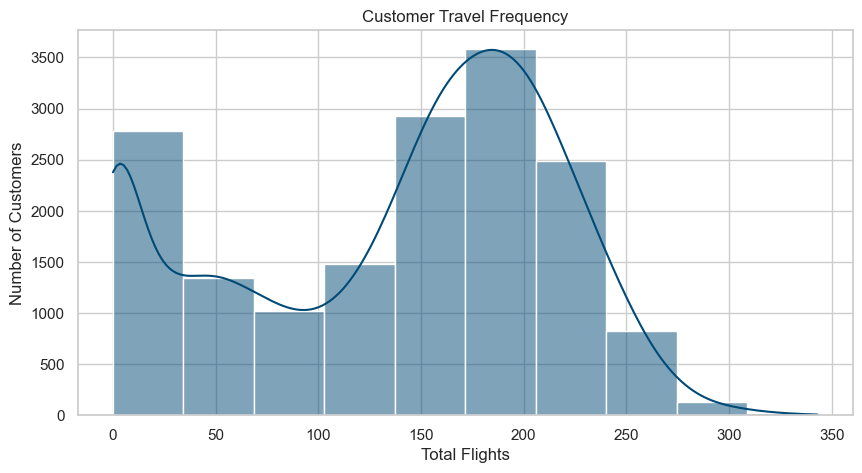

In [81]:
plt.figure(figsize=(10,5))
sns.histplot(df_customer['Total_flights'], bins=10, kde=True, color='#004A77')
plt.title("Customer Travel Frequency")
plt.xlabel("Total Flights")
plt.ylabel("Number of Customers")
plt.show()

`LIFE VALUE LEVEL`

In [82]:
# Verify range
print(min(df_customer["Customer Lifetime Value"]))
print(max(df_customer["Customer Lifetime Value"]))

1898.01
83325.38


This new variable categorizes customers based on their Customer Lifetime Value (CLV) using the mean and std. This helps segment customers into value tiers (Low to Very High) for easier analysis and targeted marketing strategies.

In [83]:
clv_mean = df_customer["Customer Lifetime Value"].mean()
clv_std = df_customer["Customer Lifetime Value"].std()

conditions = [
    (df_customer["Customer Lifetime Value"] < clv_mean - clv_std),
    (df_customer["Customer Lifetime Value"] >= clv_mean - clv_std) & (df_customer["Customer Lifetime Value"] < clv_mean),
    (df_customer["Customer Lifetime Value"] >= clv_mean) & (df_customer["Customer Lifetime Value"] < clv_mean + clv_std),
    (df_customer["Customer Lifetime Value"] >= clv_mean + clv_std)
]
choices = ["Low", "Medium", "High", "Very High"]

df_customer["Life_value_level"] = np.select(conditions, choices, default='Unkown')

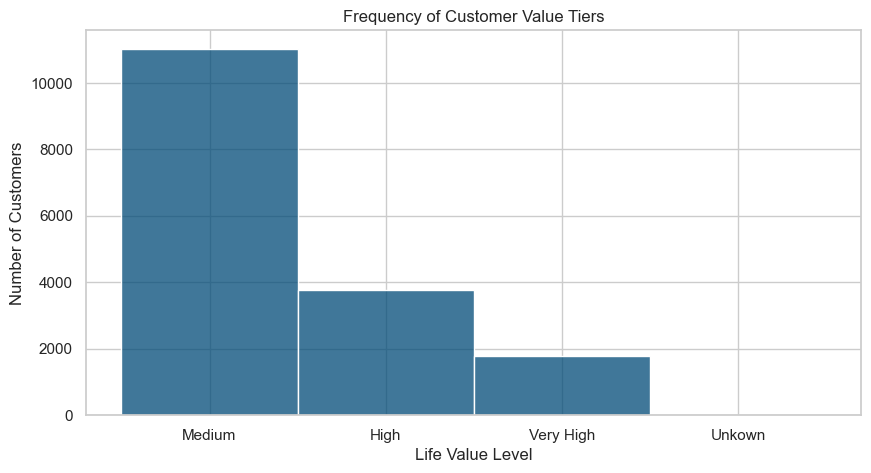

In [84]:
plt.figure(figsize=(10,5))
sns.histplot(df_customer['Life_value_level'], bins=10, kde=False, color='#004A77')
plt.title("Frequency of Customer Value Tiers")
plt.xlabel("Life Value Level")
plt.ylabel("Number of Customers")
plt.show()

---

 <font size="4"><span style="color:green">
 **Behavioral segmentation features:**
 </span></font>

`TOP SEASON`

Function to map month to season - The new features `FlightFrequency` and `Top_Season` capture customer travel behavior. They show how often each customer flies and which season they travel most, helping identify travel patterns and preference

In [85]:
def map_month_to_season(m):
    if pd.isna(m):
        return np.nan
    m = int(m)
    if m in (12, 1, 2):
        return "Winter"
    elif m in (3, 4, 5):
        return "Spring"
    elif m in (6, 7, 8):
        return "Summer"
    else:
        return "Autumn"

df_flights['Month'] = pd.to_numeric(df_flights['Month'], errors='coerce').fillna(0).astype(int)
df_flights['Season'] = df_flights['Month'].apply(map_month_to_season)

df_season_month = df_flights.groupby(['Season', 'Month'])['NumFlights'].sum().reset_index()

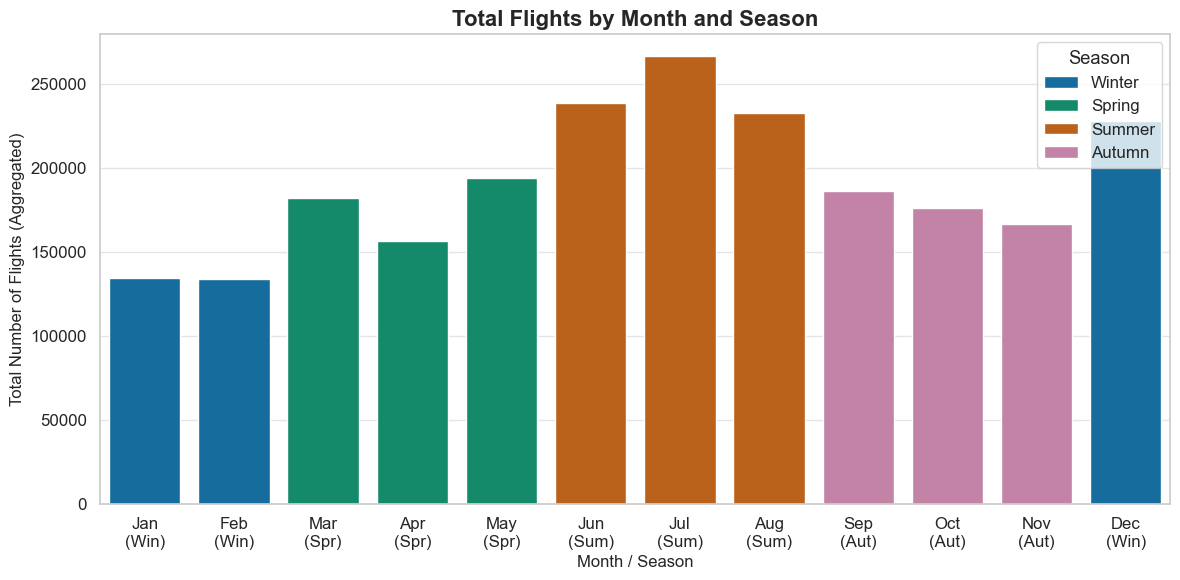

In [86]:
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
month_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

df_season_month['Season'] = pd.Categorical(df_season_month['Season'], categories=season_order, ordered=True)
df_season_month['Month'] = pd.Categorical(df_season_month['Month'], categories=month_order, ordered=True)
df_season_month = df_season_month.sort_values('Month') 

season_palette = {
    'Winter': '#0072B2',  
    'Spring': '#009E73',  
    'Summer': '#D55E00',  
    'Autumn': '#CC79A7'   
}

sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(12, 6))

sns.barplot(
    data=df_season_month,
    x='Month',
    y='NumFlights',
    hue='Season',
    palette=season_palette,
    dodge=False 
)

month_abbr = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

def get_season_abbr(m):
    season_name = map_month_to_season(m)
    return season_name[:3] if season_name else ''

plt.xticks(ticks=range(12), 
           labels=[f"{month_abbr[m]}\n({get_season_abbr(m)})" for m in month_order], 
           rotation=0)

plt.title('Total Flights by Month and Season', fontsize=16, weight='bold')
plt.xlabel('Month / Season', fontsize=12)
plt.ylabel('Total Number of Flights (Aggregated)', fontsize=12)
plt.legend(title='Season', loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
# plt.savefig("total_flights_season.png")
plt.show()

- The data confirms a strong seasonal structure, with Summer (June - August) and Autumn (September - November) representing clear peaks in total flight volume. **August** consistently records the highest demand, indicating concentrated travel activity during late summer. Capacity planning and revenue management should prioritize these months to optimize pricing, resource allocation, and operational efficiency.

- Winter (December - February) and Spring (March - May) exhibit substantially lower and more stable demand. **January and February** are the weakest months, reflecting the post-holiday travel decline. These periods present ideal opportunities for off-peak promotions, loyalty incentives, and targeted marketing to sustain engagement and revenue.

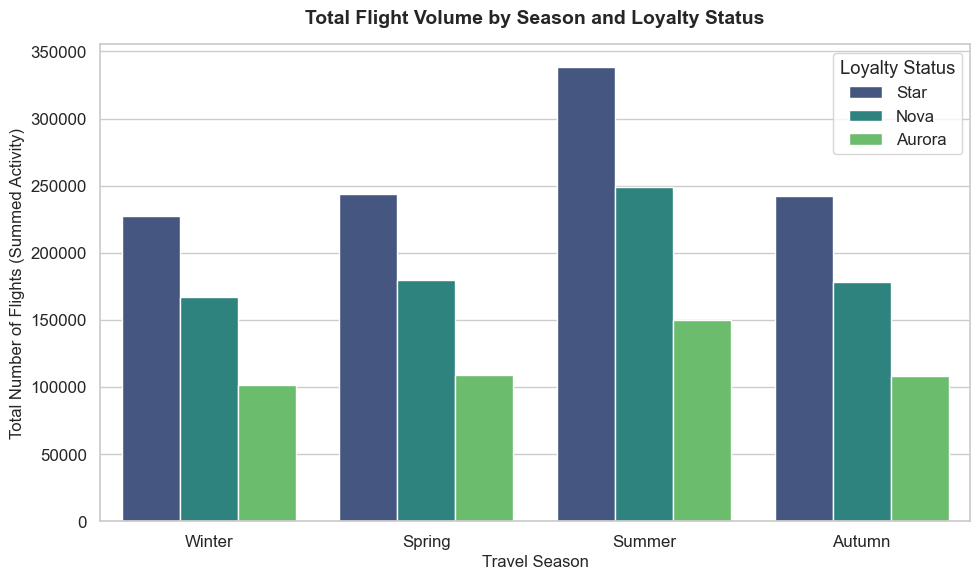

In [87]:
# Merge the Season and NumFlights with the Customer's Loyalty Status
# Join LoyaltyStatus (from df_customer) with df_flights (which has Season and NumFlights)
df_flights_merged = df_flights.merge(
    df_customer[['Loyalty#', 'LoyaltyStatus']],
    on='Loyalty#',
    how='left'
).dropna(subset=['LoyaltyStatus']) # Removes flights lacking a valid Loyalty Status

# Calculate Total Flight Volume by Status and Season
df_agg_season_status = df_flights_merged.groupby(['Season', 'LoyaltyStatus'])['NumFlights'].sum().reset_index()

season_order = ["Winter", "Spring", "Summer", "Autumn"]
loyalty_order = ['Star', 'Nova', 'Aurora'] # Order by value tier (low to high)

sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_agg_season_status, 
    x='Season', 
    y='NumFlights', 
    hue='LoyaltyStatus', 
    order=season_order,
    hue_order=loyalty_order,
    palette='viridis' 
)

plt.title('Total Flight Volume by Season and Loyalty Status', fontsize=14, weight='bold', pad=15)
plt.xlabel('Travel Season', fontsize=12)
plt.ylabel('Total Number of Flights (Summed Activity)', fontsize=12)
plt.legend(title='Loyalty Status', loc='upper right')
plt.tight_layout()
# plt.savefig('total_flights_by_season_and_status.png', dpi=200)
plt.show()

- The results confirm strong seasonality, with Summer and Autumn showing the *highest* flight volumes across all tiers. AIAI should prioritize these two peak seasons to optimize performance.

- The **Aurora** tier maintains consistently high flight volumes across all seasons, including the Winter trough nearly matching Nova’s activity during the Summer peak. This highlights Aurora members as stable, high-value, and non-seasonal travelers. Retention and loyalty reinforcement efforts for Aurora customers should be continuous throughout the year.

- In contrast, the **Star** tier dominates Summer travel, indicating a highly seasonal, mass-market profile, while the Nova tier sustains a balanced, mid-frequency pattern across all seasons. So, Star members are ideal targets for peak-season yield optimization.

`COMPANION RATE`

Calculate total flights and flights with companions per customer. It helps analyze customers' travel habits and social travel behavior, offering insights into group or family travel tendencies

In [88]:
df_companion = df_flights.groupby("Loyalty#").agg({
    "NumFlights": "sum",
    "NumFlightsWithCompanions": "sum"
})

# Calculate Companion_Rate
df_companion["Companion_Rate"] = (
    df_companion["NumFlightsWithCompanions"] / df_companion["NumFlights"]
)

# Fill NaN values with 0 (for customers with no flights)
df_companion["Companion_Rate"] = df_companion["Companion_Rate"].fillna(0)

# Merge Companion_Rate into df_customer
df_customer = df_customer.merge(
    df_companion[["Companion_Rate"]],
    on="Loyalty#",
    how="left"
)

# Fill NaN values with 0 (for customers with no flights)
df_customer["Companion_Rate"] = df_customer["Companion_Rate"].fillna(0)

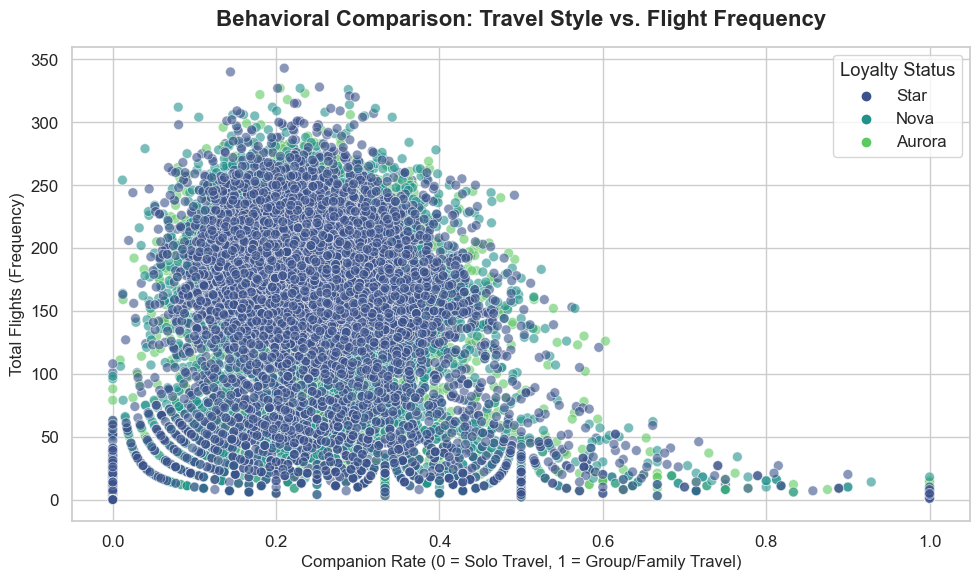

In [89]:
loyalty_order = ['Star', 'Nova', 'Aurora']

sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_customer, 
    x='Companion_Rate', 
    y='Total_flights', 
    hue='LoyaltyStatus', 
    hue_order=loyalty_order,
    palette='viridis', 
    alpha=0.6,
    s=50 
)

plt.title('Behavioral Comparison: Travel Style vs. Flight Frequency', fontsize=16, weight='bold', pad=15)
plt.xlabel('Companion Rate (0 = Solo Travel, 1 = Group/Family Travel)', fontsize=12)
plt.ylabel('Total Flights (Frequency)', fontsize=12)
plt.legend(title='Loyalty Status', loc='upper right')

plt.tight_layout()
plt.savefig("travel_style_flights.png")
plt.show()

This scatter plot explores the relationship between flight frequency and travel style, segmented by Loyalty Status:

- **Solo/Business Travelers** (low Companion Rate): High-frequency, high-value customers, mostly from Aurora and Nova tiers. They prioritize efficiency and generate the greatest revenue.
- **Group/Family Travelers** (high Companion Rate): Lower-frequency, price-sensitive customers, mostly in the Star tier, responding best to bundled or seasonal offers.

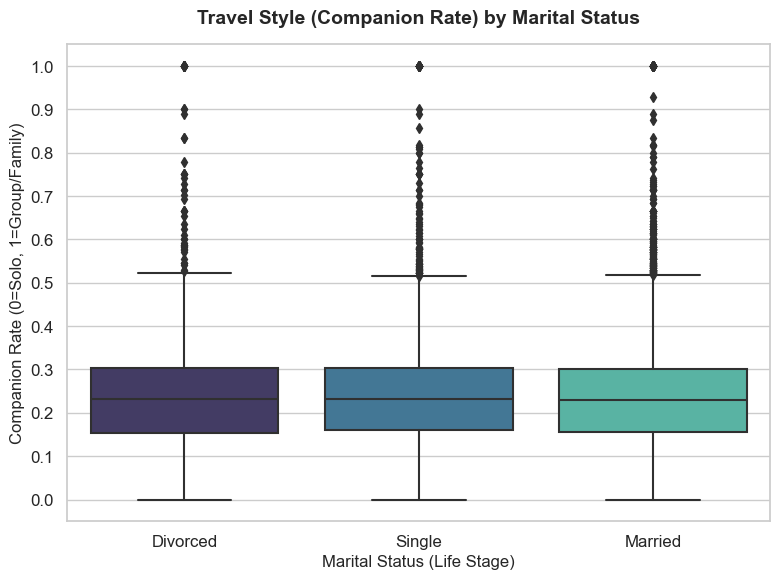

In [90]:
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=df_customer, 
    x='Marital Status', 
    y='Companion_Rate', 
    palette='mako',
    # Sort by median (to identify who travels more in groups)
    order=df_customer.groupby('Marital Status')['Companion_Rate'].median().sort_values(ascending=False).index
)

plt.title('Travel Style (Companion Rate) by Marital Status', fontsize=14, weight='bold', pad=15)
plt.xlabel('Marital Status (Life Stage)', fontsize=12)
plt.ylabel('Companion Rate (0=Solo, 1=Group/Family)', fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()
plt.savefig("companionrate_marital_status.png")
plt.show()

`FIDELITY_AGE_YEARS`

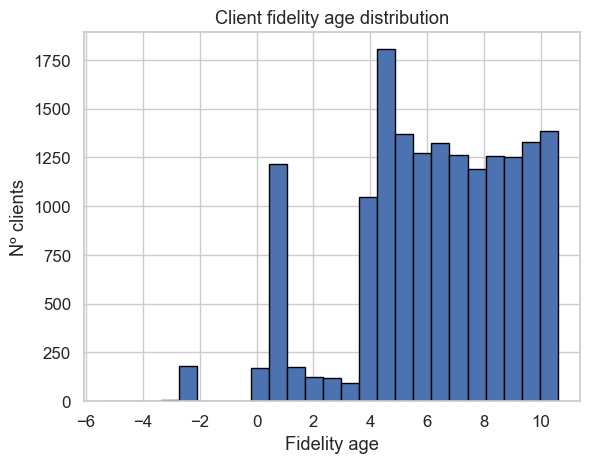

In [91]:
plt.hist(df_customer['Fidelity_Age_Years'], bins=25, edgecolor='black')
plt.title('Client fidelity age distribution')
plt.xlabel('Fidelity age')
plt.ylabel('Nº clients')
plt.show()

This histogram reveals a bimodal distribution of customer tenure, identifying two distinct populations: 
- a large, established base of *mature clients* (fidelity age 4-10)
- a much smaller group of *new clients* (age 0-2).

The critical insight is the "valley" between ages 2 and 4, which indicates a significant drop-off point. This suggests that the 2-4 year mark is a high-churn window, making it a prime target for focused retention strategies aimed at successfully transitioning newer customers into the long-term, loyal segment.

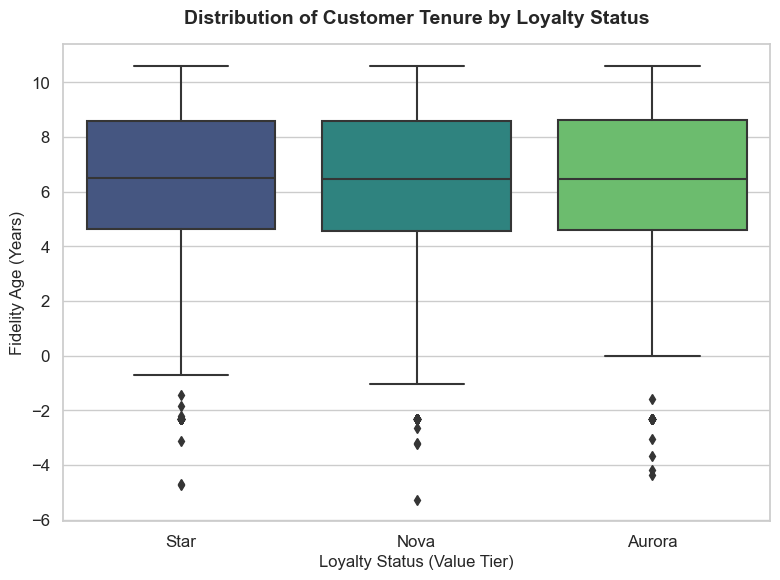

In [92]:
# Convert date columns to datetime format
df_customer['EnrollmentDateOpening'] = pd.to_datetime(
    df_customer['EnrollmentDateOpening'], format='%d/%m/%Y', errors='coerce'
)
df_customer['CancellationDate'] = pd.to_datetime(
    df_customer['CancellationDate'], format='%d/%m/%Y', errors='coerce'
)

today = pd.Timestamp(datetime.now()).normalize()

df_customer['Fidelity_Age_Years'] = (
    (df_customer['CancellationDate'].fillna(today) - df_customer['EnrollmentDateOpening'])
    .dt.days / 365.25 
)

loyalty_order = ['Star', 'Nova', 'Aurora'] 

sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=df_customer, 
    x='LoyaltyStatus', 
    y='Fidelity_Age_Years', 
    order=loyalty_order, 
    palette='viridis' 
)

plt.title('Distribution of Customer Tenure by Loyalty Status', fontsize=14, weight='bold', pad=15)
plt.xlabel('Loyalty Status (Value Tier)', fontsize=12)
plt.ylabel('Fidelity Age (Years)', fontsize=12)

plt.tight_layout()
# plt.savefig('boxplot_tenure_vs_loyalty.png', dpi=200)
plt.show()

- The boxplot reveals minimal variation in median `Fidelity_Age_Years` across loyalty tiers, indicating a weak correlation between tenure and current `LoyaltyStatus`. This suggests that advancement to higher tiers (Nova, Aurora) is primarily driven by behavioral factors, such as flight activity and spending, rather than program longevity.

- Despite similar medians, the dispersion patterns are informative: **Aurora** members tend to have a higher minimum tenure, while **Star** customers display the widest spread, encompassing both new and long-standing participants.

`Fidelity_Age_Years` should not be interpreted as a direct value predictor but rather as a stability indicator. It is best applied in segmentation models to differentiate new, high-potential entrants from long-term, low-activity customers, supporting retention and reactivation strategies.

`CANCELLATIONDATE`

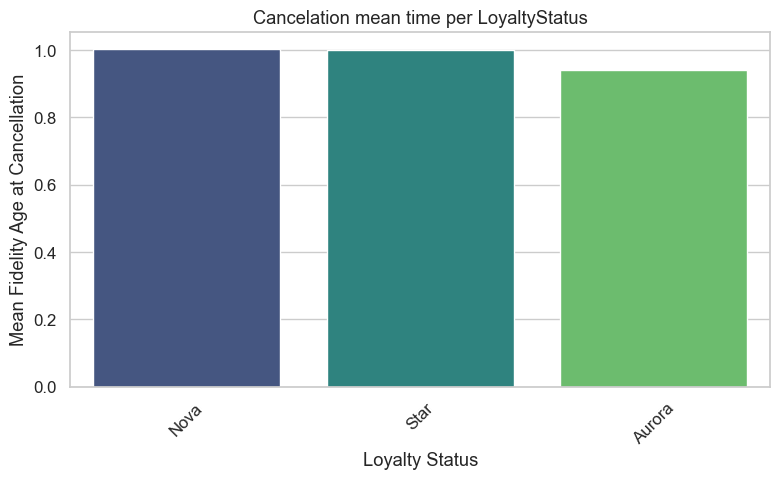

In [93]:
# Filter only customers who have cancelled
df_cancelled = df_customer[df_customer['CancellationDate'].notna()].copy()

# Calculate average fidelity age at cancellation per LoyaltyStatus
avg_fidelity = (
    df_cancelled.groupby('LoyaltyStatus')['Fidelity_Age_Years']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(data=avg_fidelity, x='LoyaltyStatus', y='Fidelity_Age_Years', palette='viridis')
plt.title('Cancelation mean time per LoyaltyStatus')
plt.xlabel('Loyalty Status')
plt.ylabel('Mean Fidelity Age at Cancellation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

 <font size="4"><span style="color:green">
 **Demographic segmentation features**
 </span></font>

This section compares pairs of demographic variables to explore relationships between them. 

`NUMBER OF CUSTOMERS PER CITY`

In [94]:
# Count customers per city
city_customers = df_customer.groupby('City').size().reset_index(name='num_customers')
df_customer_geo = pd.read_csv("data/DM_AIAI_CustomerDB.csv", delimiter=",", index_col=0)

# Merge coordinates with customer counts
city_coords = df_customer_geo.groupby('City').agg({
    'Latitude': 'first',
    'Longitude': 'first'
}).reset_index()

city_data = city_coords.merge(city_customers, on='City')

print(f"Total cities: {len(city_data)}")
city_data.head()

Total cities: 29


City   Latitude   Longitude  num_customers
0          Banff  51.178398 -115.570800            186
1        Calgary  51.048615 -114.070850            192
2  Charlottetown  46.238239  -63.131069             66
3   Dawson Creek  55.759628 -120.237660            437
4       Edmonton  53.544388 -113.490930            498

In [95]:
# Create base map centered on Canada
canada_map = folium.Map(
    location=[56.1304, -106.3468],
    zoom_start=4,
    tiles='CartoDB positron'  # Clean and modern map style
)

# Create a continuous color scale (light yellow → dark red)
colormap = LinearColormap(
    colors=['#ffffcc', '#ffeda0', '#feb24c', '#f03b20', '#bd0026'],
    vmin=city_data['num_customers'].min(),
    vmax=city_data['num_customers'].max(),
    caption='Number of Customers per City'
)

# Add color scale as legend
colormap.add_to(canada_map)

# Add marker clustering for better navigation
marker_cluster = MarkerCluster().add_to(canada_map)

# Add circle markers for each city
for _, row in city_data.iterrows():
    popup_html = f"""
    <div style="font-size:14px;">
        <b>{row['City']}</b><br>
        Customers: {row['num_customers']:,}
    </div>
    """
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5 + (row['num_customers'] / city_data['num_customers'].max()) * 15,
        color=colormap(row['num_customers']),
        fill=True,
        fillColor=colormap(row['num_customers']),
        fillOpacity=0.8,
        popup=popup_html,
        tooltip=f"{row['City']}: {row['num_customers']:,} customers"
    ).add_to(marker_cluster)

# Add useful map controls
Fullscreen().add_to(canada_map)
MeasureControl().add_to(canada_map)
folium.LayerControl().add_to(canada_map)

# Display top 10 cities by customer count
print("\nTop 10 cities by number of customers:")
print(city_data.sort_values('num_customers', ascending=False).head(10)[['City', 'num_customers']])

# Save interactive map to HTML
output_path = 'canada_customers_map_enhanced.html'
canada_map.save(output_path)


Top 10 cities by number of customers:
           City  num_customers
20      Toronto           3326
23    Vancouver           2551
12     Montreal           2029
28     Winnipeg            666
26     Whistler            579
6       Halifax            529
13       Ottawa            507
4      Edmonton            498
22      Trenton            483
15  Quebec City            475


- Most customers are concentrated in **major urban centers**, especially *Toronto*, *Vancouver*, and *Montreal*.
- These 10 cities represent a large portion of the customer base, highlighting key markets. Marketing and loyalty campaigns could prioritize major cities to maximize reach and engagement.
- **Smaller cities** like Whistler and Trenton still have concentrated clusters and could be targeted with *local promotions or travel packages*.

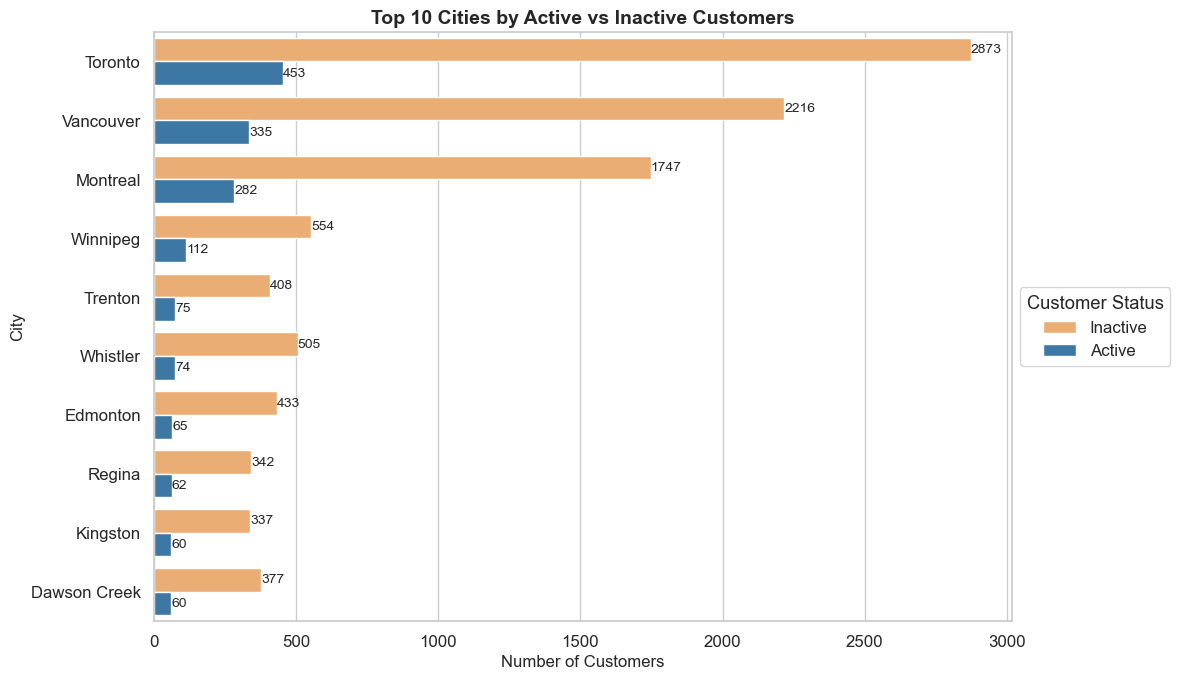

In [96]:
# CALCULATE ACTIVE/INACTIVE COUNTS BY CITY 
active_counts = (
    df_customer[df_customer['Is_Active'] == 1]
    .groupby('City')
    .size()
    .sort_values(ascending=False)  # descending order
    .head(10)  # top 10 cities by active customers
)

# Filtrar dados das 10 cidades com mais clientes ativos
top_city_data = df_customer[df_customer['City'].isin(active_counts.index)]

# Agrupar por cidade e estado de atividade
top_city_data = (
    top_city_data.groupby(['City', 'Is_Active'])
    .size()
    .reset_index(name='CustomerCount')
)

# Adicionar rótulos mais legíveis
top_city_data['Status'] = top_city_data['Is_Active'].map({1: 'Active', 0: 'Inactive'})

# Ordem das cidades
city_order = active_counts.index.tolist()

# Plot
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=top_city_data,
    x='CustomerCount',
    y='City',
    hue='Status',
    palette={'Active': '#2c7bb6', 'Inactive': '#fdae61'},
    order=city_order
)

# Adicionar contagens no final das barras
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(width + 1, y, f"{int(width)}", va='center', ha='left', fontsize=10)

# Estética
plt.title('Top 10 Cities by Active vs Inactive Customers', fontsize=14, weight='bold')
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.legend(title='Customer Status', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()


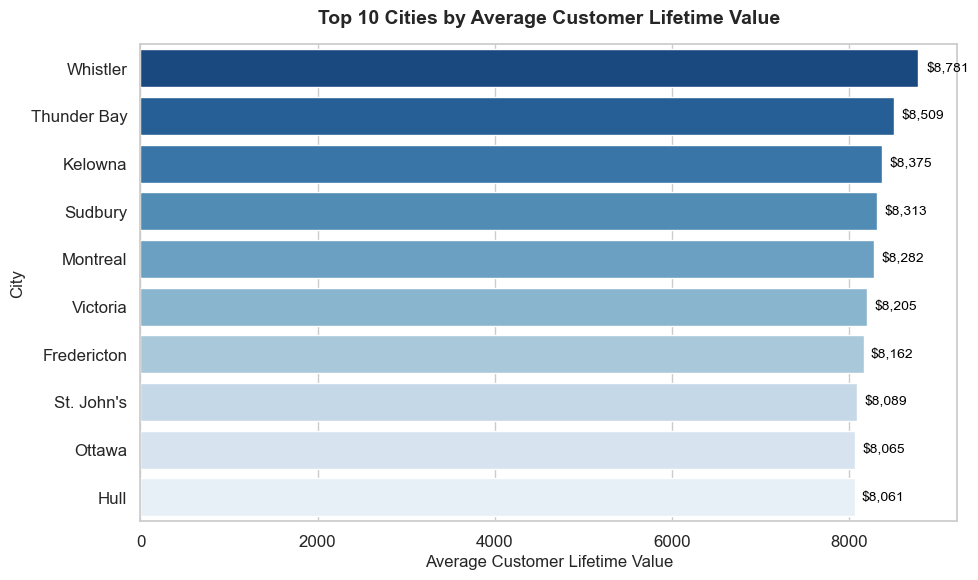

In [97]:
# Compute mean CLV per city
clv_city = (
    df_customer.groupby('City', as_index=False)['Customer Lifetime Value']
    .mean()
    .sort_values('Customer Lifetime Value', ascending=False)
    .head(10)  # top 10 cities
)

sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=clv_city,
    x='Customer Lifetime Value',  
    y='City',                    
    palette='Blues_r',            
    order=clv_city['City']       
)

# Add exact CLV values on bars
for p in ax.patches:
    width = p.get_width()
    y_pos = p.get_y() + p.get_height() / 2
    
    text = f"${width:,.0f}"

    ax.text(
        width * 1.01, 
        y_pos,        
        text, 
        color='black',
        ha='left',    
        va='center', 
        fontsize=10,
    )

plt.title('Top 10 Cities by Average Customer Lifetime Value', fontsize=14, weight='bold', pad=15)
plt.xlabel('Average Customer Lifetime Value', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

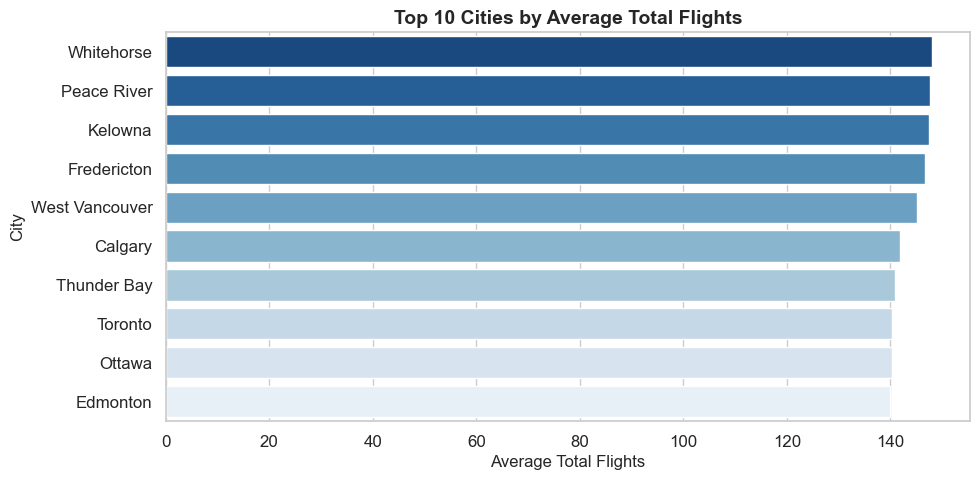

In [98]:
df = df_customer.copy()
df["Total_flights"] = pd.to_numeric(df["Total_flights"], errors="coerce")

# Drop rows with missing values in 'City' or 'Total_flights'
df = df.dropna(subset=["City", "Total_flights"])

# Calculate mean Total_flights per city and select top 10
flights_city = (
    df.groupby("City", as_index=False)["Total_flights"]
      .mean()  # Compute average
      .sort_values("Total_flights", ascending=False)  # Sort descending
      .head(10)  # Top 10 cities
)

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=flights_city,
    x="Total_flights",  
    y="City",      
    palette="Blues_r"   
)

plt.title("Top 10 Cities by Average Total Flights", fontsize=14, weight='bold')
plt.xlabel("Average Total Flights", fontsize=12)
plt.ylabel("City", fontsize=12)

plt.tight_layout()
plt.show()

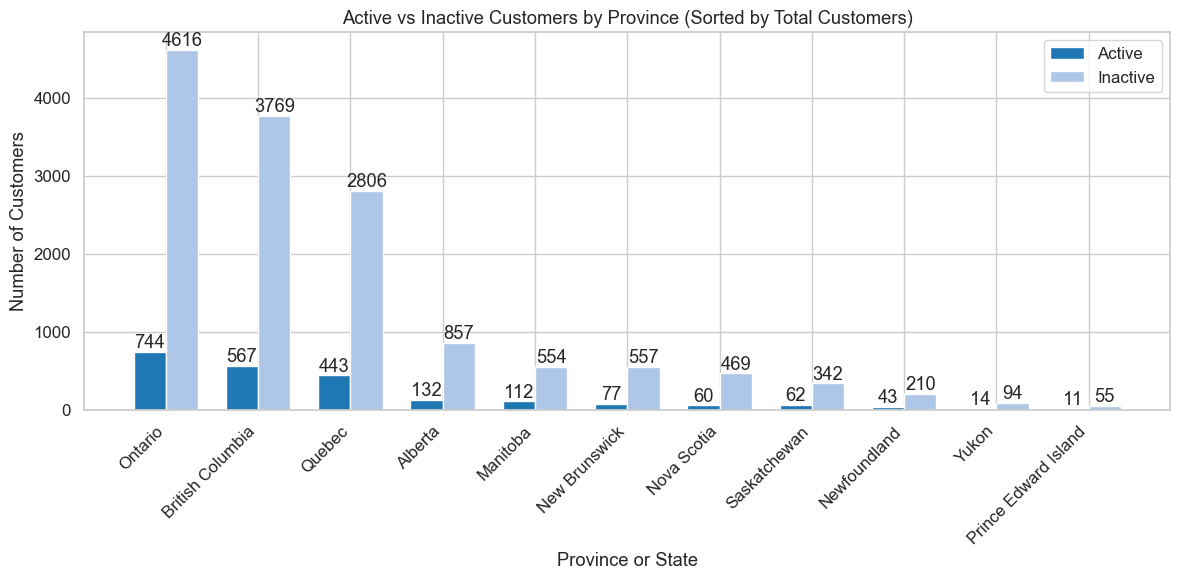

In [99]:
active_counts = (
    df_customer.groupby(['Province or State', 'Is_Active'])
    .size()
    .reset_index(name='CustomerCount')
)

active_pivot = active_counts.pivot(index='Province or State', columns='Is_Active', values='CustomerCount').fillna(0)

active_pivot['Total'] = active_pivot[1] + active_pivot[0]
active_pivot = active_pivot.sort_values('Total', ascending=False)
active_pivot = active_pivot.drop(columns='Total')

plt.figure(figsize=(12, 6))

bar_width = 0.35
x = np.arange(len(active_pivot.index))

plt.bar(x - bar_width/2, active_pivot[1], width=bar_width, label='Active', color='#1f77b4')   # Dark blue
plt.bar(x + bar_width/2, active_pivot[0], width=bar_width, label='Inactive', color='#aec7e8') # Light blue

for i in range(len(x)):
    plt.text(x[i] - bar_width/2, active_pivot[1].iloc[i] + 2, int(active_pivot[1].iloc[i]), ha='center', va='bottom')
    plt.text(x[i] + bar_width/2, active_pivot[0].iloc[i] + 2, int(active_pivot[0].iloc[i]), ha='center', va='bottom')

plt.xticks(x, active_pivot.index, rotation=45, ha='right')
plt.xlabel('Province or State')
plt.ylabel('Number of Customers')
plt.title('Active vs Inactive Customers by Province (Sorted by Total Customers)')
plt.legend()
plt.tight_layout()
plt.show()

---

 <font size="4"><span style="color:green">
 **Value base segmentation features**
 </span></font>

`INCOME`

By consulting this website (https://www.statista.com/statistics/484838/income-distribution-in-canada-by-income-level/?srsltid=AfmBOorRJdHYxhrVf5QKvj-PwX4A0HE7t2NLZDYNgZ8c4B-Bjgtndohk), it was decided to divide people income level as its represented in the next code blocks.

In [100]:
# Verify income range
print(min(df_customer["Income"]))
print(max(df_customer["Income"]))

0.0
99981.0


In [101]:
# Set income levels for better understanding
conditions = [
    df_customer["Income"] < 5000,
    (df_customer["Income"] >= 5000) & (df_customer["Income"] < 15000),
    (df_customer["Income"] >= 15000) & (df_customer["Income"] < 25000),
    (df_customer["Income"] >= 25000) & (df_customer["Income"] < 50000),
    (df_customer["Income"] >= 50000) & (df_customer["Income"] < 75000),
    df_customer["Income"] >= 75000
]

choices = ["Very Low", "Low", "Medium", "High", "Very High", "Ultra High"]

df_customer["IncomeLevel"] = np.select(conditions, choices, default = 'Unknown')

The function below generates percentage-based cross-tabulations and stacked bar plots, helping to visualize distributions and potential patterns across `IncomeLevel`, `Location Code`, `Gender`, and `Marital Status`.


Comparison: IncomeLevel x Location Code (percentages)
Location Code  Rural  Suburban  Urban
IncomeLevel                          
High            33.2      34.1   32.7
Low             33.7      35.6   30.7
Medium          33.1      34.9   32.0
Ultra High      34.0      33.4   32.6
Unknown         35.0      40.0   25.0
Very High       33.4      34.5   32.1
Very Low        33.9      32.6   33.5


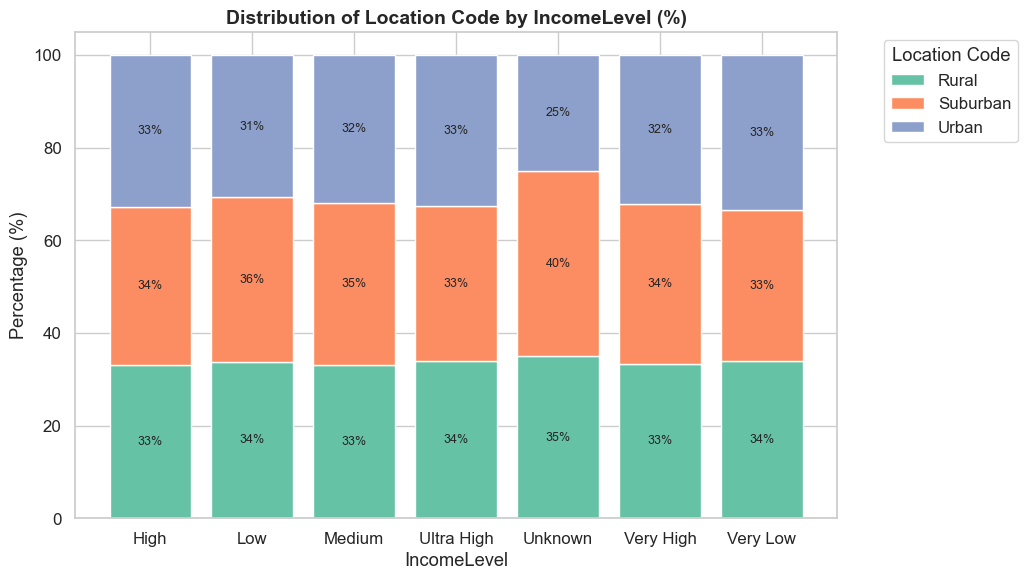


Comparison: IncomeLevel x Gender (percentages)
Gender       female  male
IncomeLevel              
High           50.7  49.3
Low            51.8  48.2
Medium         51.5  48.5
Ultra High     51.3  48.7
Unknown        55.0  45.0
Very High      49.7  50.3
Very Low       49.1  50.9


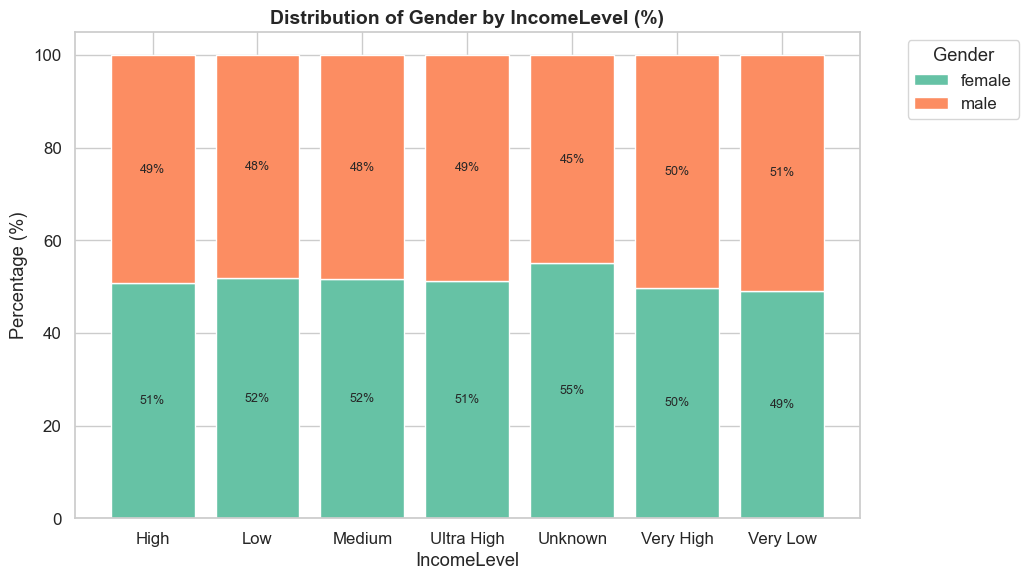


Comparison: IncomeLevel x Marital Status (percentages)
Marital Status  Divorced  Married  Single
IncomeLevel                              
High                16.9     65.9    17.3
Low                 23.0     51.5    25.5
Medium              21.7     64.7    13.5
Ultra High          16.2     68.8    15.0
Unknown              0.0     60.0    40.0
Very High           15.0     68.1    16.9
Very Low             8.8     33.9    57.2


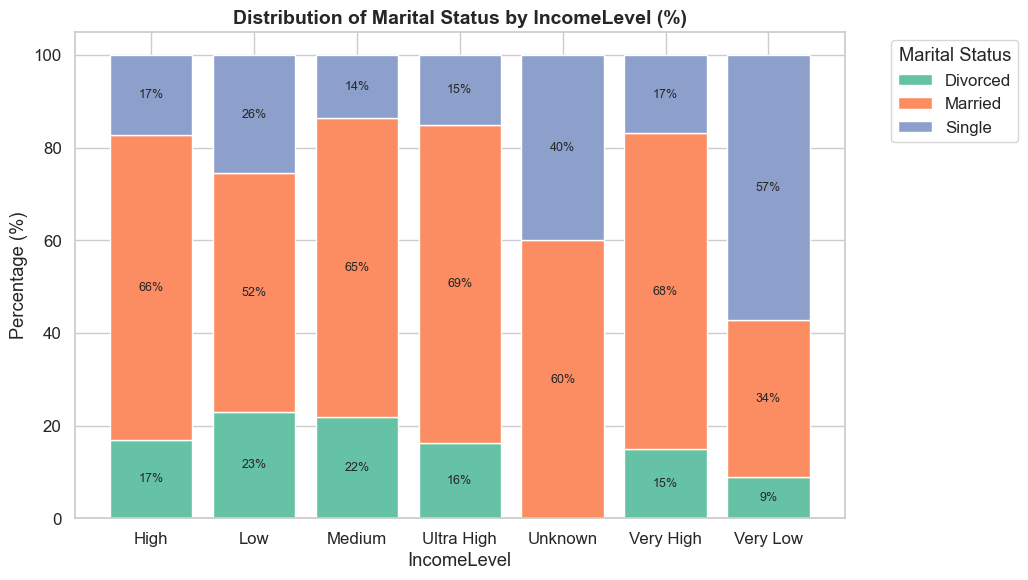


Comparison: Location Code x Gender (percentages)
Gender         female  male
Location Code              
Rural            50.6  49.4
Suburban         49.8  50.2
Urban            50.4  49.6


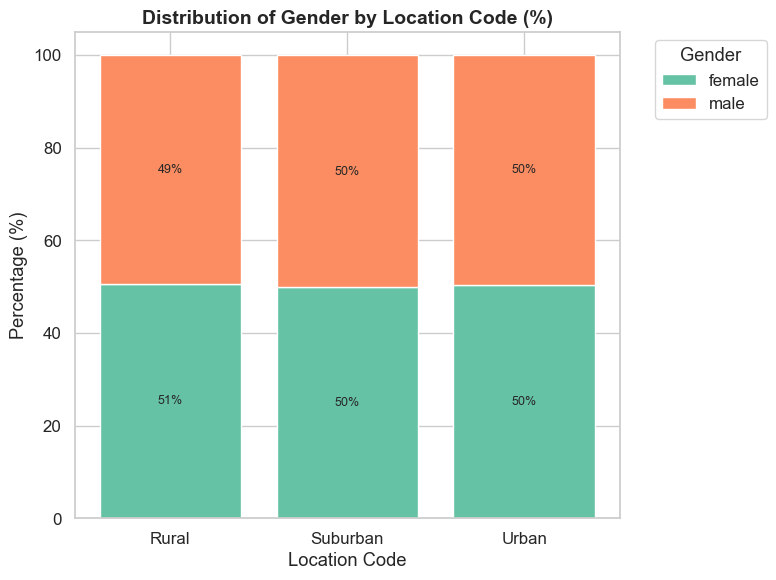


Comparison: Location Code x Marital Status (percentages)
Marital Status  Divorced  Married  Single
Location Code                            
Rural               14.8     58.6    26.7
Suburban            14.8     58.9    26.3
Urban               15.4     57.1    27.5


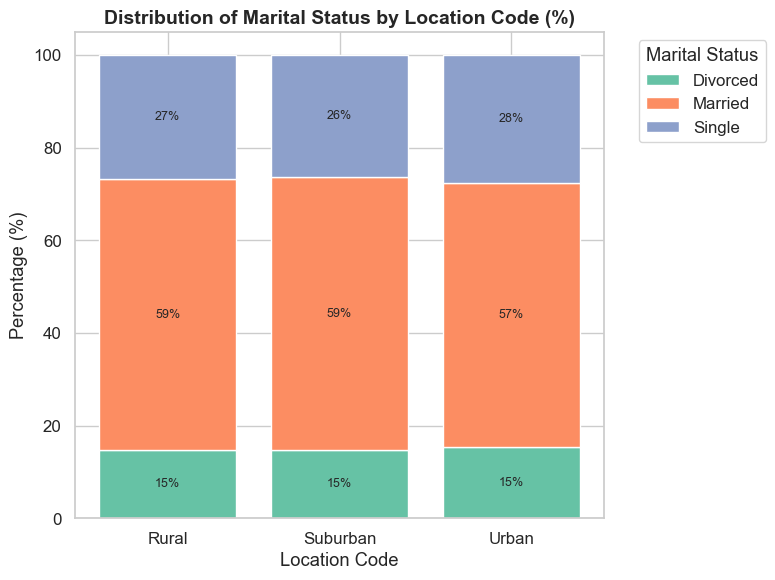


Comparison: Gender x Marital Status (percentages)
Marital Status  Divorced  Married  Single
Gender                                   
female              15.0     58.0    27.1
male                15.0     58.5    26.6


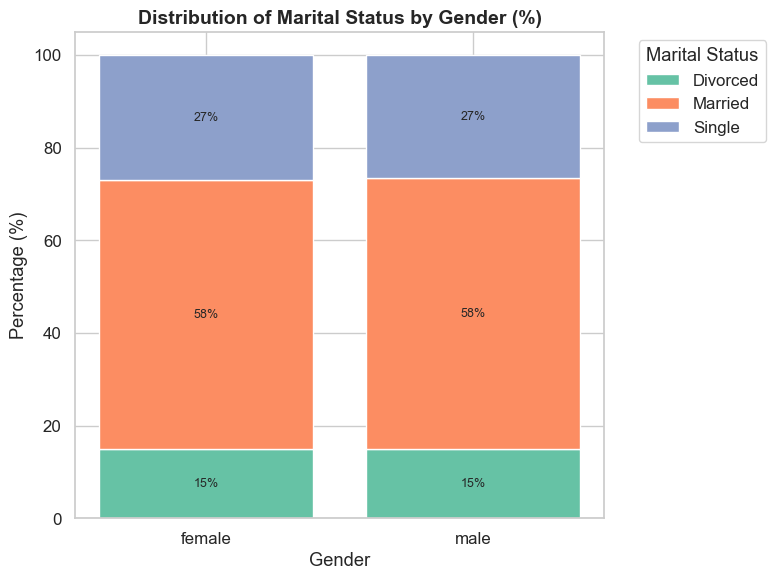

In [102]:
# List of demographic variables
demo_vars = ["IncomeLevel", "Location Code", "Gender", "Marital Status"]

# Improved function to compare categorical variables
def compare_categorical_vars_pct(df, var1, var2):
    print(f"\nComparison: {var1} x {var2} (percentages)")
    
    # Cross-tabulation normalized by row
    ct = pd.crosstab(df[var1], df[var2], normalize='index') * 100
    print(ct.round(1))
    
    ct_plot = ct.reset_index().melt(id_vars=var1, var_name=var2, value_name="Percentage")
    
    plt.figure(figsize=(max(8, len(ct)*1.5), 6))
    sns.set(style="whitegrid", font_scale=1.1)
    
    # Stacked bar plot (percentages)
    bottom_vals = None
    categories = ct_plot[var2].unique()
    palette = sns.color_palette("Set2", len(categories))
    
    for i, cat in enumerate(categories):
        vals = ct[cat] if cat in ct.columns else 0
        plt.bar(ct.index, vals, bottom=bottom_vals, color=palette[i], label=cat)
        bottom_vals = vals if bottom_vals is None else bottom_vals + vals

    # Add percentage labels
    for idx, total in enumerate(ct.sum(axis=1)):
        cumulative = 0
        for col in ct.columns:
            pct = ct.iloc[idx][col]
            if pct > 5:  # show only if > 5%
                plt.text(idx, cumulative + pct / 2, f"{pct:.0f}%", ha="center", va="center", fontsize=9)
            cumulative += pct
    
    plt.title(f"Distribution of {var2} by {var1} (%)", fontsize=14, weight='bold')
    plt.ylabel("Percentage (%)")
    plt.xlabel(var1)
    plt.legend(title=var2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Compare all combinations of demographic variables
for var1, var2 in combinations(demo_vars, 2):
    compare_categorical_vars_pct(df_customer, var1, var2)

**1. Income and Where the Customers Live** - This chart helps us understand if the customers' `income` is linked to whether they live in a rural, suburban, or urban area. 

- For nearly all income levels ("High," "Low," "Medium," etc.), the customer distribution is almost perfectly split across the three location types.
- About one-third of our customers live in Rural areas, one-third in Suburban areas, and one-third in Urban areas, regardless of how much money they make.
- The "0 Income" anomaly is more Suburban. This group has a noticeable tilt toward the Suburban area (40% of this segment) and the lowest share in Urban areas (25%).


**2. Income and Gender Balance** - This chart shows the breakdown of male and female customers within each of our defined `income` groups. 

- Across most of our mid-to-high income segments ("High," "Low," "Medium," "Ultra High," "Very High"), the split between female (green) and male (orange) customers is very close to equal. This suggests that travel demand within the core segments of our loyalty program is not strongly gender-specific based on income.
- Marketing messages targeting our core customer base do not need to be heavily differentiated by gender. We should focus on shared travel motivations (e.g., convenience, rewards) that appeal to everyone in that income bracket.
- The largest difference is seen in the "Zero Income" group. Here, 55% of customers are female compared to 45% male. If we target this highly price-sensitive group (which may include a significant portion of students or highly budget-conscious travelers), our messaging and product offers should be slightly tailored to appeal more strongly to the female demographic.

**3. Income and Family/Life Status** - This chart combines customer income level with their `marital status` (Single, Married, Divorced) to reveal how financial resources are tied to life stage.

- As income rises, the proportion of Married customers increases significantly.
- Our most financially valuable customers are in the "Married" life stage. Marketing campaigns for premium services, luxury travel, and loyalty program enhancements should be heavily targeted at couples and families.
- The "Very Low" income group (excluding $0 income) shows a dramatic shift, with the Single segment representing the majority. This group requires personalized, cost-effective travel packages, possibly aimed at young professionals or solo adventurers, rather than family offers.
- The "Divorced" Segment may represent individuals traveling alone or with children. They need mid-range, flexible product offerings that balance convenience and value.

**4. Geographic Location and Gender Balance** - This chart explores whether there is a difference in the `gender` breakdown of our loyalty members based on `where they live` (Rural, Suburban, or Urban areas).

- The chart clearly shows that the gender distribution is extremely even, regardless of the customer's location.
- In Rural, Suburban, and Urban areas, the split between female and male customers hovers exactly 50%/50%. Geographic location does not influence the gender of the loyalty member. 
- The marketing campaigns targeting specific areas (e.g., a campaign focused on a major Urban hub or a specific Rural region) do not need to be adjusted to prioritize one gender over the other. The core message should remain gender-neutral and focus on the lifestyle needs of the location.

**5. Life Stage and Geographic Location** - This chart combines `where our customers live` and their `marital status`, to see if travel habits are related to their environment.

- The most important finding is that the breakdown of marital status is essentially the same, regardless of the customer's location type.
- Location (Rural vs. Urban) does not tell us anything about a customer's life stage. A campaign designed to target "Married" couples, for instance, should use the same core message and value proposition whether it is delivered in an Urban or Rural market.
- Urban Areas have a slightly higher concentration of singles and divorced customers. If we are trying to target "solo travelers" (Singles/Divorced), marketing efforts in Urban areas may yield a slightly higher response rate, as these customers form a marginally larger part of the population there.

**6. Gender and Marital Status** - This chart compares the distribution of `marital status` between our `female and male` customers.

- The clearest finding is that a customer's marital status is practically the same regardless of whether the customer is male or female.
- It won't be needed to create distinct marketing messages based on marital status and gender combined. For example, a campaign focused on "couple's trips" or "solo travel vacations" will have an equally strong appeal to men and women within those groups.

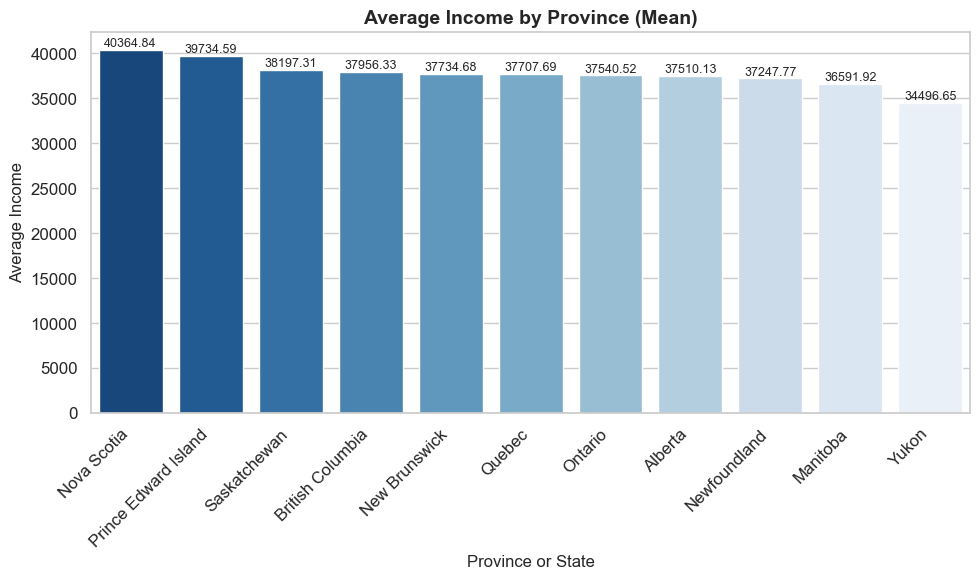

In [103]:
average_income_by_province = (
    df_customer.groupby('Province or State')['Income']  
    .mean()  # Compute the mean income for each province
    .reset_index(name='AverageIncome')  
    .sort_values('AverageIncome', ascending=False)  # Sort provinces by descending average income
)

plt.figure(figsize=(10, 6))  
sns.barplot(
    data=average_income_by_province,  
    x='Province or State', 
    y='AverageIncome',  
    palette='Blues_r'  
)

for i, v in enumerate(average_income_by_province['AverageIncome']):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=9)
    
plt.title('Average Income by Province (Mean)', fontsize=14, weight='bold')
plt.xlabel('Province or State', fontsize=12)
plt.ylabel('Average Income', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.savefig('average_income_by_province.png', dpi=200)

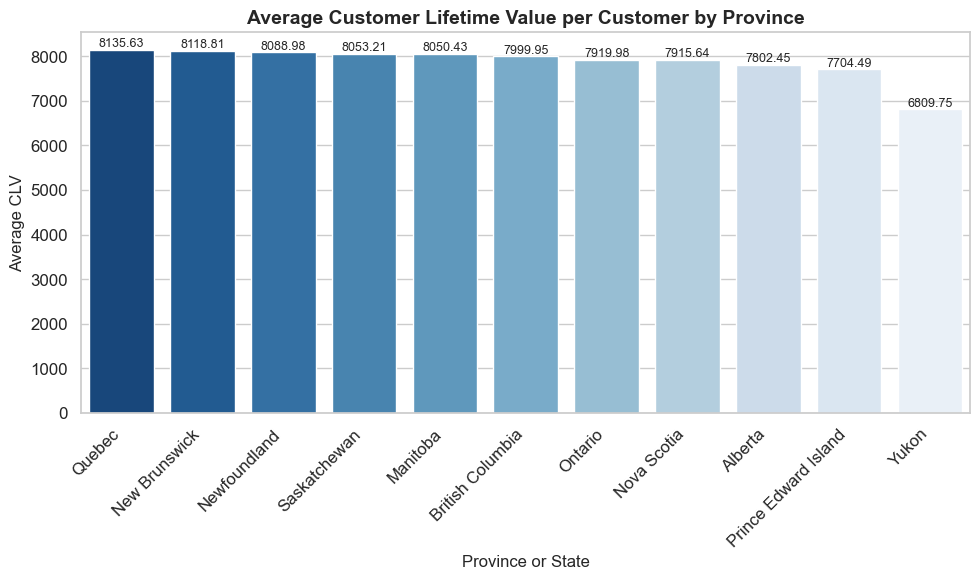

In [104]:
clv_mean = (
    df_customer.groupby('Province or State')['Customer Lifetime Value']
    .mean()
    .reset_index(name='AverageCLV')
    .sort_values('AverageCLV', ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=clv_mean,
    x='Province or State',
    y='AverageCLV',
    palette='Blues_r'
)

plt.title('Average Customer Lifetime Value per Customer by Province', fontsize=14, weight='bold')
plt.xlabel('Province or State', fontsize=12)
plt.ylabel('Average CLV', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(clv_mean['AverageCLV']):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

`INCOME X MARITAL STATUS`

In [105]:
# Create combined variable Income_x_Marital
df_customer["Income_x_Marital"] = df_customer["IncomeLevel"].astype(str) + "_" + df_customer["Marital Status"].astype(str)
df_customer.head()

Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   
3    608370      Queen        Hagee          Queen Hagee  Canada   
4    530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude Postal code  ...  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  ...   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6  ...   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9  ...   
3           Ontario    Toronto  43.653225  -79.383186     P1W 1K4  ...   
4            Quebec       Hull  45.428730  -75.713364     J8Y 3Z5  ...   

  CancellationDate Customer Lifetime Value  EnrollmentType  Is_Active  \
0              NaT                 3839.14        Standard          0   
1              NaT                 3839.61        Standard          0   
2       2021-01-08                 3839.75        Standard          1   
3              NaT                 3839.75        Standard          0   
4              NaT                 3842.79  2021 Promotion          0   

  Fidelity_Age_Years Total_flights Life_value_level Companion_Rate  \
0           6.718686           184           Medium       0.288043   
1           6.658453           275           Medium       0.109091   
2           3.488022           116           Medium       0.318966   
3           9.713895           191           Medium       0.287958   
4           8.027379           167           Medium       0.353293   

   IncomeLevel    Income_x_Marital  
0    Very High   Very High_Married  
1     Very Low   Very Low_Divorced  
2     Very Low     Very Low_Single  
3     Very Low     Very Low_Single  
4   Ultra High  Ultra High_Married  

[5 rows x 27 columns]

---

 <font size="4"><span style="color:green">
 **Merging the databases**
 </span></font>

This section **aggregates** flight data at the customer level (by Loyalty#). It sums total distance flown, flights with companions, points earned and redeemed, and the dollar value of redeemed points, providing a summarized view of each customer's flight activity.

In [106]:
''' # The function to be used must find the most frequent element (Mode)
def aggregate_redemption_mode(series):
    # Returns the first element of the mode series (the most frequent behavior)
    # If the series is empty (no data), returns 'Non-Redeemer'
    return series.mode()[0] if not series.mode().empty else 'Non-Redeemer'

# The df_flights contain the categorical 'Redemption_Behavior' column beforehand
df_flights_agg = df_flights.groupby('Loyalty#').agg({
    'NumFlightsWithCompanions': 'sum',
    'DistanceKM': 'sum',
    'PointsAccumulated': 'sum',
    'PointsRedeemed': 'sum',
    'DollarCostPointsRedeemed': 'sum',
    # Use the mode for redemption behavior
    'Redemption_Behavior': aggregate_redemption_mode 
})

# Rename columns to simplify the merge (Adjust the name for the new column)
df_flights_agg.columns = [
    'NumFlightsWithCompanions', 'DistanceKM',
    'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed', 'Redemption_Behavior_Agg'
]

df_flights_agg = df_flights_agg.reset_index()
df_flights_agg.head(10) '''

" # The function to be used must find the most frequent element (Mode)\ndef aggregate_redemption_mode(series):\n    # Returns the first element of the mode series (the most frequent behavior)\n    # If the series is empty (no data), returns 'Non-Redeemer'\n    return series.mode()[0] if not series.mode().empty else 'Non-Redeemer'\n\n# The df_flights contain the categorical 'Redemption_Behavior' column beforehand\ndf_flights_agg = df_flights.groupby('Loyalty#').agg({\n    'NumFlightsWithCompanions': 'sum',\n    'DistanceKM': 'sum',\n    'PointsAccumulated': 'sum',\n    'PointsRedeemed': 'sum',\n    'DollarCostPointsRedeemed': 'sum',\n    # Use the mode for redemption behavior\n    'Redemption_Behavior': aggregate_redemption_mode \n})\n\n# Rename columns to simplify the merge (Adjust the name for the new column)\ndf_flights_agg.columns = [\n    'NumFlightsWithCompanions', 'DistanceKM',\n    'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed', 'Redemption_Behavior_Agg'\n]\n\

#### Merge customers and the new flights dataset

In [107]:
df_merged = pd.merge(df_customer, df_flights, on='Loyalty#', how='inner')
df_merged.head()

Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    480934    Cecilia  Householder  Cecilia Householder  Canada   
2    480934    Cecilia  Householder  Cecilia Householder  Canada   
3    480934    Cecilia  Householder  Cecilia Householder  Canada   
4    480934    Cecilia  Householder  Cecilia Householder  Canada   

  Province or State     City   Latitude  Longitude Postal code  ... Month  \
0           Ontario  Toronto  43.653225 -79.383186     M2Z 4K1  ...     5   
1           Ontario  Toronto  43.653225 -79.383186     M2Z 4K1  ...     4   
2           Ontario  Toronto  43.653225 -79.383186     M2Z 4K1  ...     2   
3           Ontario  Toronto  43.653225 -79.383186     M2Z 4K1  ...     3   
4           Ontario  Toronto  43.653225 -79.383186     M2Z 4K1  ...     1   

  YearMonthDate NumFlights  NumFlightsWithCompanions DistanceKM  \
0    2020-05-01         13                         4    25010.0   
1    2020-04-01          0                         0     5095.0   
2    2020-02-01          3                         0    24271.0   
3    2020-03-01          0                         0        0.0   
4    2020-01-01          0                         0        0.0   

  PointsAccumulated PointsRedeemed DollarCostPointsRedeemed  \
0            2501.0            0.0                      0.0   
1             509.0            0.0                      0.0   
2            2427.0            0.0                      0.0   
3               0.0            0.0                      0.0   
4               0.0            0.0                      0.0   

   Redemption_Behavior  Season  
0         Non-Redeemer  Spring  
1         Non-Redeemer  Spring  
2         Non-Redeemer  Winter  
3         Non-Redeemer  Spring  
4         Non-Redeemer  Winter  

[5 rows x 38 columns]

In [108]:
df_merged.columns

Index(['Loyalty#', 'First Name', 'Last Name', 'Customer Name', 'Country',
       'Province or State', 'City', 'Latitude', 'Longitude', 'Postal code',
       'Gender', 'Education', 'Location Code', 'Income', 'Marital Status',
       'LoyaltyStatus', 'EnrollmentDateOpening', 'CancellationDate',
       'Customer Lifetime Value', 'EnrollmentType', 'Is_Active',
       'Fidelity_Age_Years', 'Total_flights', 'Life_value_level',
       'Companion_Rate', 'IncomeLevel', 'Income_x_Marital', 'Year', 'Month',
       'YearMonthDate', 'NumFlights', 'NumFlightsWithCompanions', 'DistanceKM',
       'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed',
       'Redemption_Behavior', 'Season'],
      dtype='object')

In [109]:
# Ckeck duplicates
df_merged.duplicated().sum()

0

In [110]:
# Check shape
df_merged.shape

(596664, 38)

#### Check redundant variables:

In [111]:
# 'First name' and 'Last name' are redundant if there is a variable called 'Customer Name' which is the sum of both.
# 'Latitude', 'longitude' and 'postal code' are also irrelevant if there are variables as 'city' and 'province or state'
# df_merged.drop(columns=['First Name', 'Last Name', 'Latitude', 'Longitude', 'Postal code'], inplace=True)

In [112]:
# Country is the same in every entry and so the variance is zero
print(df_merged['Country'].value_counts()/len(df_merged)*100)
df_merged.drop(columns=['Country'], inplace=True)

Country
Canada    100.0
Name: count, dtype: float64


In [113]:
# Check descriptive statistics
df_merged.describe()

Loyalty#       Latitude      Longitude         Income  \
count  596664.000000  596664.000000  596664.000000  596664.000000   
mean   549435.680825      47.174633     -91.840494   37739.986787   
min    100018.000000      42.984924    -135.056840       0.000000   
25%    326234.000000      44.231171    -120.237660       0.000000   
50%    550020.000000      46.087818     -79.383186   34137.000000   
75%    771901.000000      49.282730     -74.596184   62375.000000   
max    999986.000000      60.721188     -52.712578   99981.000000   
std    258867.195581       3.305526      22.239760   30355.017242   

               EnrollmentDateOpening               CancellationDate  \
count                         596664                          80820   
mean   2018-10-07 03:56:08.891033600  2019-12-20 04:43:30.601336320   
min              2015-04-01 00:00:00            2015-11-30 00:00:00   
25%              2017-01-18 00:00:00            2019-02-02 00:00:00   
50%              2018-11-02 00:00:00            2020-01-14 00:00:00   
75%              2020-07-11 00:00:00            2021-02-15 00:00:00   
max              2021-12-30 00:00:00            2021-12-30 00:00:00   
std                              NaN                            NaN   

       Customer Lifetime Value      Is_Active  Fidelity_Age_Years  \
count            596664.000000  596664.000000       596664.000000   
mean               7986.494716       0.135453            6.281123   
min                1898.010000       0.000000           -5.267625   
25%                3978.670000       0.000000            4.599589   
50%                5780.180000       0.000000            6.488706   
75%                8954.430000       0.000000            8.605065   
max               83325.380000       1.000000           10.595483   
std                6858.298018       0.342207            2.861526   

       Total_flights  Companion_Rate           Year          Month  \
count  596664.000000   596664.000000  596664.000000  596664.000000   
mean      138.433390        0.228568    2020.000000       6.500000   
min         0.000000        0.000000    2019.000000       1.000000   
25%        70.000000        0.156398    2019.000000       3.750000   
50%       159.000000        0.230107    2020.000000       6.500000   
75%       199.000000        0.300654    2021.000000       9.250000   
max       343.000000        1.000000    2021.000000      12.000000   
std        78.843912        0.134692       0.816497       3.452055   

                       YearMonthDate     NumFlights  NumFlightsWithCompanions  \
count                         596664  596664.000000             596664.000000   
mean   2020-06-16 02:39:59.999999744       3.845372                  0.936168   
min              2019-01-01 00:00:00       0.000000                  0.000000   
25%              2019-09-23 12:00:00       0.000000                  0.000000   
50%              2020-06-16 00:00:00       0.000000                  0.000000   
75%              2021-03-08 18:00:00       7.000000                  1.000000   
max              2021-12-01 00:00:00      21.000000                 11.000000   
std                              NaN       5.022941                  1.968412   

          DistanceKM  PointsAccumulated  PointsRedeemed  \
count  596664.000000       596664.00000   596664.000000   
mean     7973.603444          797.20329      236.469767   
min         0.000000            0.00000        0.000000   
25%         0.000000            0.00000        0.000000   
50%       984.500000           98.00000        0.000000   
75%     15400.000000         1540.00000        0.000000   
max     42040.000000         4204.00000     7496.000000   
std     10269.174348         1026.79392      985.680370   

       DollarCostPointsRedeemed  
count             596664.000000  
mean                   2.336869  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    0.000000

 <font size="4"><span style="color:green">
 **Correlation Matrix**
 </span></font>

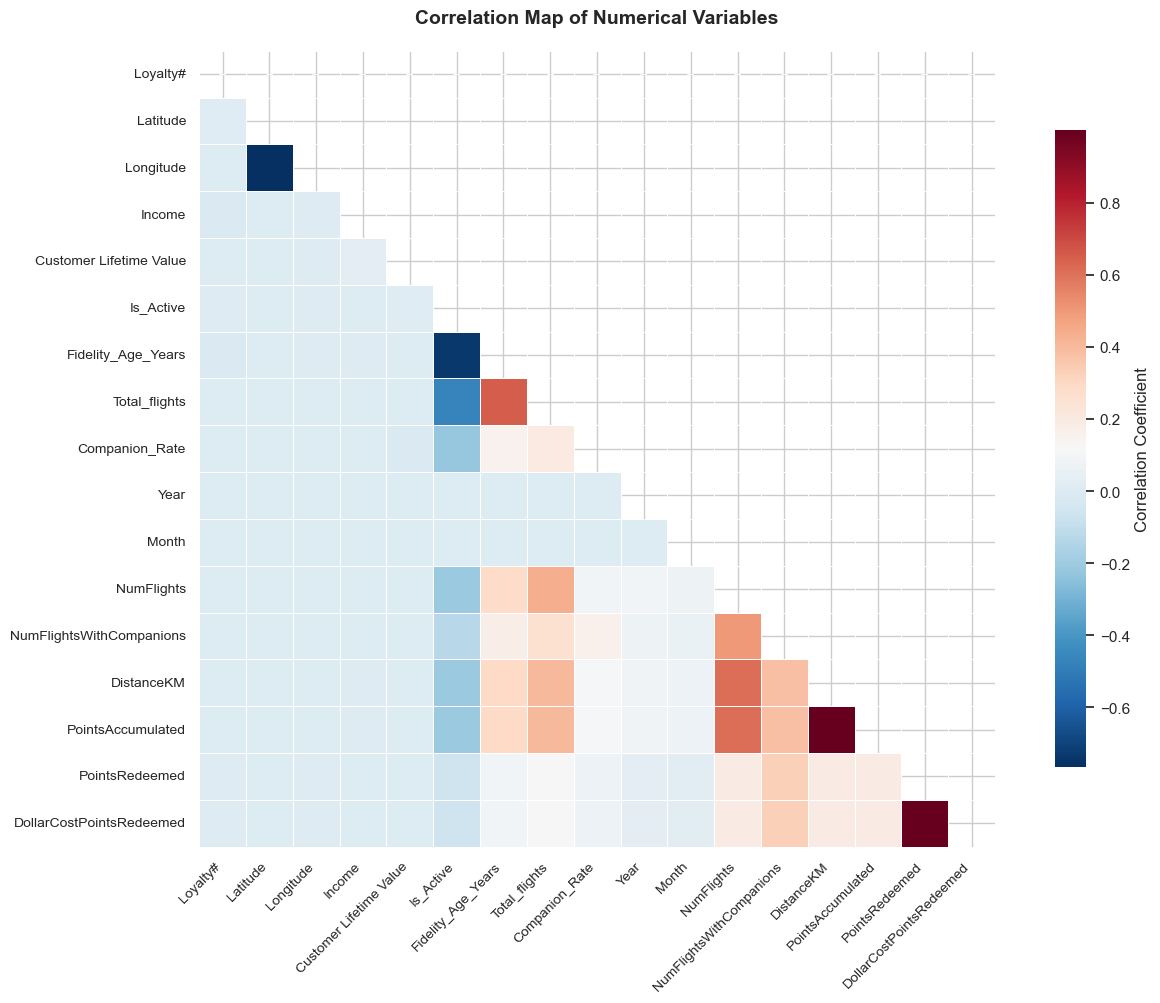

In [114]:
# Correlation Matrix
# Select only numerical variables
num_df = df_merged.select_dtypes(include=[np.number])

# Correlation matrix
corr = num_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Figure size adjusted based on the number of variables
fig, ax = plt.subplots(figsize=(max(10, len(corr)*0.8), max(8, len(corr)*0.6)))

sns.set_theme(style="white")

# Improved heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap="RdBu_r",          
    annot=True,
    fmt=".2f",
    linewidths=.5,
    cbar_kws={"shrink": .8, "label": "Correlation Coefficient"},
    annot_kws={"size": 9},
    square=True
)

plt.title("Correlation Map of Numerical Variables", fontsize=14, weight="bold", pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig("correlation_merged.png")
plt.show()

The correlation heatmap reveals both redundancy and independence among the core numerical features of the merged dataset.

**Feature Redundancy**: `DistanceKM`, `PointsAccumulated` and `Total_flights` are almost perfectly correlated, capturing the same behavioral dimension. We can retain only one (for example, `Total_flights`) to prevent overweighting this factor. `PointsRedeemed` and `DollarCostPointsRedeemed` are fully redundant.

- `Income` and `Value Metrics`: Minimal correlation (ρ ≈ 0.04) confirms that wealth and spending behavior are independent, crucial for distinguishing potential vs. realized value.
- `Companion_Rate`: Very weak correlations (ρ < 0.1) with CLV, Income, and flights indicate strong behavioral independence, valuable for lifestyle-based segmentation.
- `Fidelity_Age_Years`: Moderate link to Total_flights (ρ ≈ 0.35) allows differentiation between high-activity new and veteran customers.

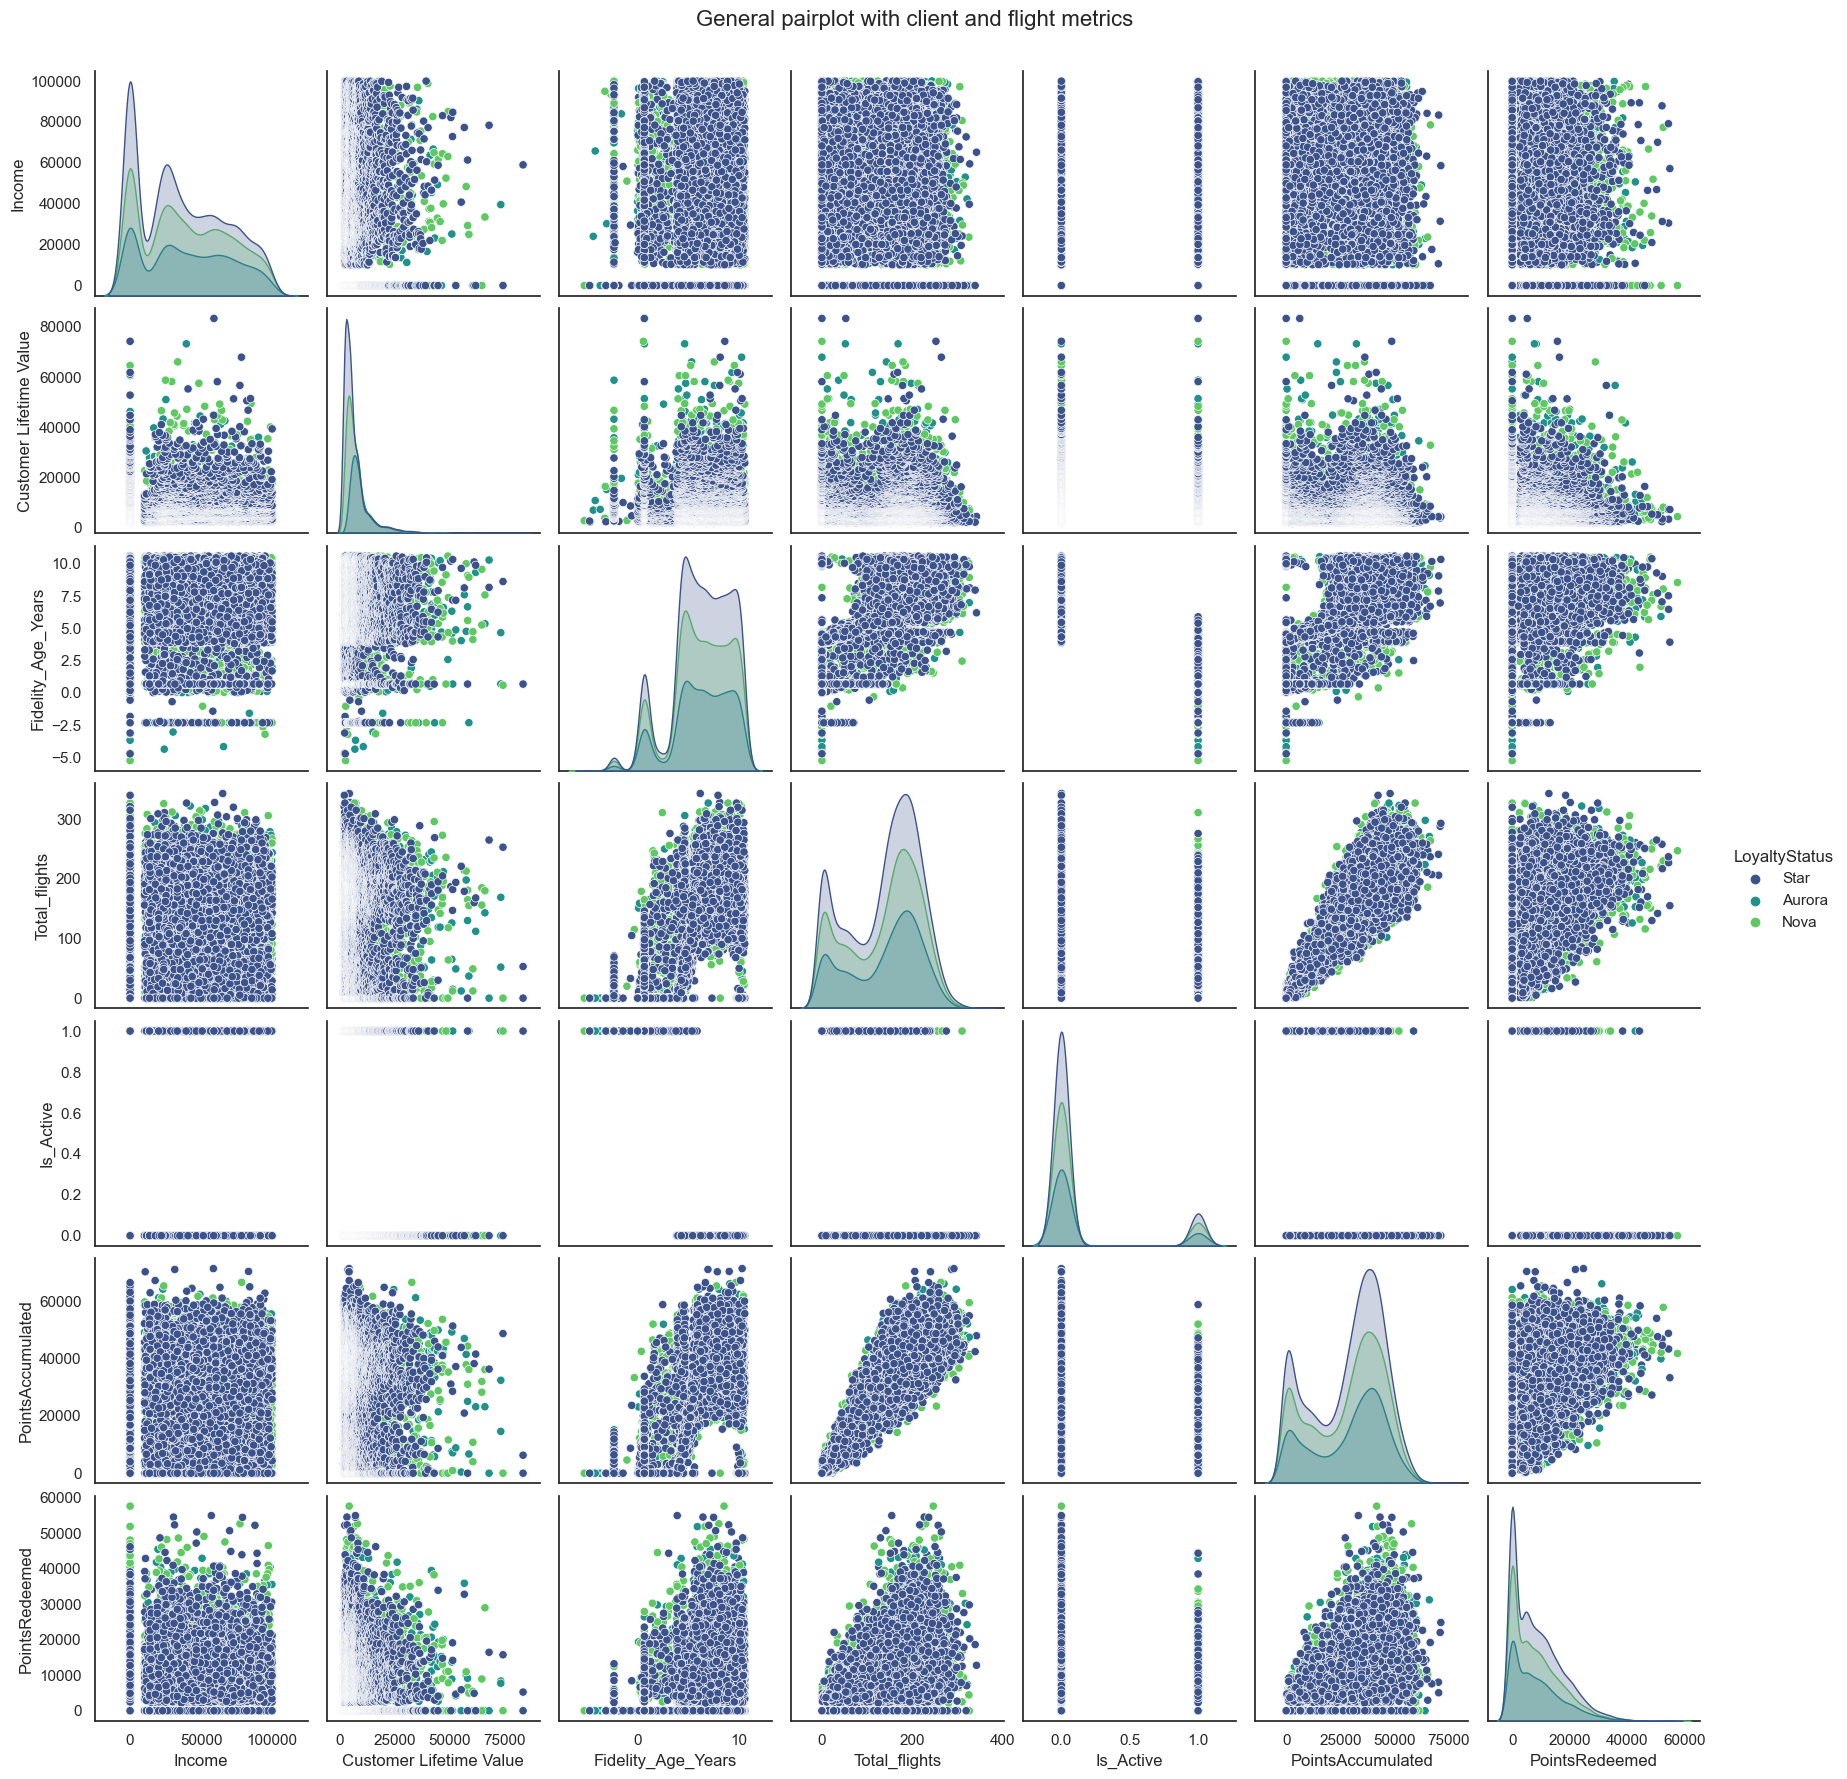

In [115]:
df_flights_summary = df_flights.groupby('Loyalty#').agg({
    'NumFlights': 'sum',
    'NumFlightsWithCompanions': 'sum',
    'DistanceKM': 'sum',
    'PointsAccumulated': 'sum',
    'PointsRedeemed': 'sum',
    'DollarCostPointsRedeemed': 'sum'
}).reset_index()

# Join aggregated metrics to df_customer
df_customer_summary = pd.merge(
    df_customer,
    df_flights_summary,
    on='Loyalty#',
    how='left'  # Keep all customers, even those without flights
)

# Select relevant numerical variables for pairplot
vars_to_plot = [
    'Income',
    'Customer Lifetime Value',
    'Fidelity_Age_Years',
    'Total_flights', 
    'Is_Active',
    'PointsAccumulated',
    'PointsRedeemed'
]

# Create pairplot
sns.pairplot(
    df_customer_summary,
    vars=vars_to_plot,
    hue='LoyaltyStatus',
    diag_kind='kde',
    palette='viridis'
)

plt.suptitle('General pairplot with client and flight metrics', y=1.02, fontsize=16)
# plt.savefig('pairplot_client_flight_metrics.png')
plt.show()